## Importing Libraries

This cell imports common data science libraries: pandas for data manipulation, numpy for numerical operations, matplotlib and seaborn for plotting.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from docx import Document
from datetime import datetime, timedelta
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import shap




c:\Users\ajsal\anaconda3\envs\gcenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Datasets

This cell loads various datasets from Excel and CSV files into pandas DataFrames. These datasets include media spending, customer orders, holiday information, SKU details, and weather data for 2023 and 2024.

In [2]:
xls = pd.ExcelFile("Media data-Sale Calendar-NPS Scores_Data.xlsx") #Money Spent on Media in Cr

Customers_Data = pd.read_csv("Customers_Orders_Data.csv")
Holidays = pd.read_excel("Canada Holiday List.xlsx")
SKU_details = pd.read_csv("SKU_details.csv")
Weather_Data_2023 = pd.read_csv("Weather Data ONTARIO-2023.csv")
Weather_Data_2024 = pd.read_csv("Weather Data ONTARIO-2024.csv")


C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\849277054.py:3: DtypeWarning: Columns (5,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  Customers_Data = pd.read_csv("Customers_Orders_Data.csv")


In [3]:
sheets_dict = pd.read_excel(xls, sheet_name=None)

# Access specific sheets like this:
media_data = sheets_dict[xls.sheet_names[0]]  # First sheet
holidays= sheets_dict[xls.sheet_names[1]]  # Second sheet
NPS = sheets_dict[xls.sheet_names[2]]  # Third sheet

## Data Shape Inspection

This cell outputs the dimensions (rows, columns) of each loaded dataset, giving a summary of their size.

In [ ]:

print("Weather_Data_2024 shape:", Weather_Data_2024.shape)


Customers_Data shape: (1648824, 15)


NameError: name 'Media_spend_data' is not defined

## Cleaning and Inspecting Customer Data

This section performs data cleaning and inspection on the `Customers_Data` DataFrame:

1.  **Replace Empty Values:** Empty strings and spaces are replaced with `NaN` for consistent handling of missing data.
2.  **Data Overview:** `info()` displays data types and non-null counts, and
`isnull().sum()` shows the number of missing values per column. The shape of the DataFrame is also printed.
3.  **Data Type Conversion:** Columns 'deliverybdays' and 'deliverycdays' replace '\N' with '0', fills missing values with 0 and converts to integer type.
4.  **Zero Count:** Counts the number of zero values in the 'deliverybdays' column.
5.  **Order ID Mismatch:** Checks and prints the number of rows where 'order_id' and 'order_item_id' are not equal.
6.  **Duplicate Check:** Identifies and prints the number of duplicate rows.
7.  **Duplicate Removal:** Removes duplicate rows from the DataFrame and confirms the removal.

In [5]:
# Replace empty strings and spaces with NaN
Customers_Data.replace(r'^\s*$', np.nan, regex=True, inplace=True)
Customers_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Unnamed: 0               1648824 non-null  int64  
 1   fsn_id                   1648824 non-null  object 
 2   order_date               1648824 non-null  object 
 3   order_id                 1648824 non-null  float64
 4   order_item_id            1648824 non-null  float64
 5   gmv                      1643920 non-null  object 
 6   units                    1648824 non-null  int64  
 7   deliverybdays            1648824 non-null  object 
 8   deliverycdays            1648824 non-null  object 
 9   order_payment_type       1648824 non-null  object 
 10  sla                      1648824 non-null  int64  
 11  cust_id                  1643920 non-null  object 
 12  pincode                  1643920 non-null  object 
 13  product_mrp              1648824 non-null 

In [6]:
Customers_Data.isnull().sum()
print(Customers_Data.shape)
Customers_Data.dtypes

(1648824, 15)


Unnamed: 0                   int64
fsn_id                      object
order_date                  object
order_id                   float64
order_item_id              float64
gmv                         object
units                        int64
deliverybdays               object
deliverycdays               object
order_payment_type          object
sla                          int64
cust_id                     object
pincode                     object
product_mrp                  int64
product_procurement_sla      int64
dtype: object

In [7]:
print(Customers_Data.iloc[:, [5,11,12]].head())  # Inspect specific columns

    gmv                 cust_id                 pincode
0  6400  -1.01299130778588E+018  -7.79175582905735E+018
1  6900  -8.99032457905512E+018   7.33541149097431E+018
2  1990   -1.0404429420466E+018  -7.47768776228657E+018
3  1690  -7.60496084352714E+018  -5.83593163877661E+018
4  1618    2.8945572083453E+018   5.34735360997242E+017


In [8]:
#Replacing \N with 0
Customers_Data[['deliverybdays', 'deliverycdays']] = Customers_Data[['deliverybdays', 'deliverycdays']].replace('\\N', '0')
Customers_Data['deliverycdays'] = Customers_Data['deliverycdays'].fillna(0).astype(int)
Customers_Data['deliverybdays'] = Customers_Data['deliverybdays'].fillna(0).astype(int)
zero_count = (Customers_Data['deliverybdays'] == 0).sum()
print(f"Number of zeros: {zero_count}")
false_count = (Customers_Data['order_id'] != Customers_Data['order_item_id']).sum()
print(f"Number of times order_id != order_item_id: {false_count}")
#Checking for duplicates
duplicate_rows = Customers_Data[Customers_Data.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")
#Removing duplicates
Customers_Data = Customers_Data.drop_duplicates()
print(f"Number of duplicate rows after removal: {len(Customers_Data[Customers_Data.duplicated()])}")

Number of zeros: 1315331
Number of times order_id != order_item_id: 178621
Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [9]:
Customers_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Unnamed: 0               1648824 non-null  int64  
 1   fsn_id                   1648824 non-null  object 
 2   order_date               1648824 non-null  object 
 3   order_id                 1648824 non-null  float64
 4   order_item_id            1648824 non-null  float64
 5   gmv                      1643920 non-null  object 
 6   units                    1648824 non-null  int64  
 7   deliverybdays            1648824 non-null  int64  
 8   deliverycdays            1648824 non-null  int64  
 9   order_payment_type       1648824 non-null  object 
 10  sla                      1648824 non-null  int64  
 11  cust_id                  1643920 non-null  object 
 12  pincode                  1643920 non-null  object 
 13  product_mrp              1648824 non-null 

## Analyze Customer Product and Order Data

This section analyzes product and order data within the `Customers_Data` DataFrame:

1.  **FSN ID Counts:** Calculates and stores the frequency of each unique 'fsn_id' (product ID). Retrieves and prints the count of a specific 'fsn_id' ("ACCCX3S5AHMF55FV").
2.  **Unique Order IDs:** Determines and prints the number of unique 'order_id' values, indicating the total number of distinct orders.
3.  **Unique Order Item IDs:** Determines and prints the number of unique 'order_item_id' values, representing individual items within orders.
4.  **Order Item ID Counts:** Calculates and stores the frequency of each unique 'order_item_id'. Retrieves and prints the count of a specific 'order_item_id' ("1.420831e+15").
5.  **Delivery Days Outlier Check:** Generates a boxplot to visualize and identify potential outliers in the 'deliverybdays' column.

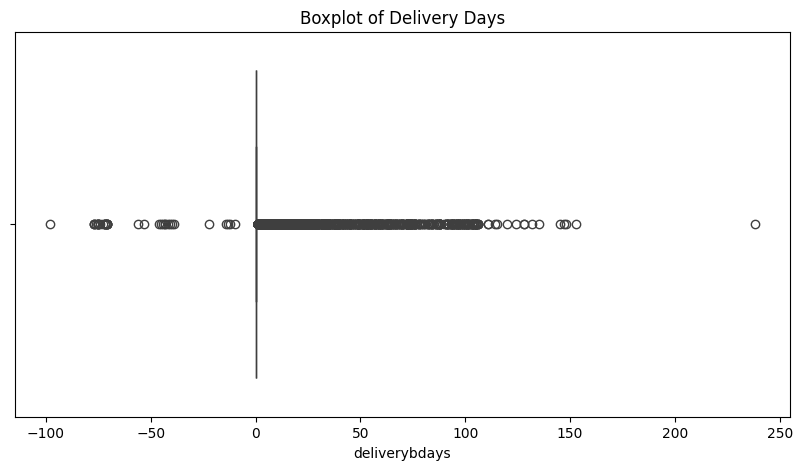

In [10]:
fsn_id_counts = Customers_Data['fsn_id'].value_counts()
count_of_specific_fsn_id = fsn_id_counts.get("ACCCX3S5AHMF55FV", 0)
count_of_specific_fsn_id #------>Each Type of product have unique fsn_id
Customers_Data['order_id'].nunique() #------>Mtlb ye ho sakta h ke order kiya h 3 products to they have same order_id but different order_idem_id
Customers_Data['order_item_id'].nunique()
order_item_id_counts = Customers_Data['order_item_id'].value_counts()
count_of_specific_order_item = order_item_id_counts.get("1.420831e+15", 0)
count_of_specific_order_item
#Checking for outliers in deliverybdays and deliverycdays
plt.figure(figsize=(10, 5))
sns.boxplot(x='deliverybdays', data=Customers_Data)
plt.title('Boxplot of Delivery Days')
plt.show()


## Clean and Analyze GMV and Units Data

This section cleans and analyzes 'gmv' (Gross Merchandise Value) and 'units' data:

1.  **Replace Missing Values:** Replaces '\\N' and empty strings in 'gmv' and 'units' with `NaN`.
2.  **Convert to Numeric:** Converts 'gmv' and 'units' to numeric, filling `NaN` with 0 and then converting to integers.
3.  **Calculate GMV per Unit:** Computes 'gmv_per_unit' by dividing 'gmv' by 'units'. Replaces infinite values with `NaN` and fills `NaN` with 0, then converts to integers. Recalculates 'gmv_per_unit' again.
4.  **Median GMV per FSN:** Calculates the median 'gmv_per_unit' for each 'fsn_id'.
5.  **GMV per Unit Outlier Check:** Creates a boxplot to visualize outliers in the 'gmv_per_unit' column.

<Axes: xlabel='gmv_per_unit'>

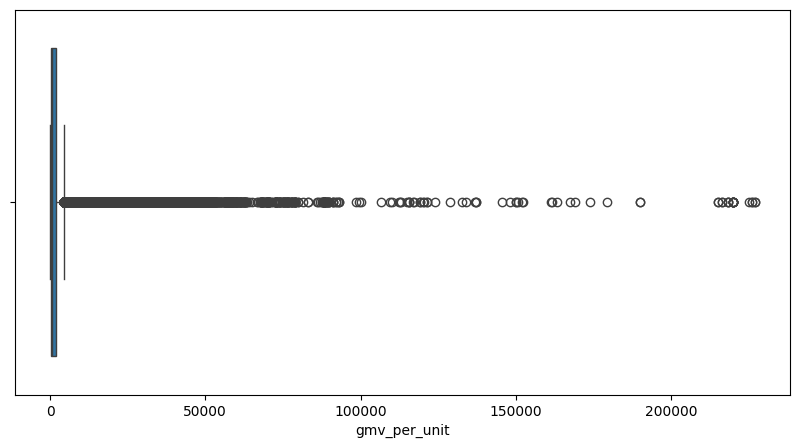

In [11]:
Customers_Data['gmv'] = Customers_Data['gmv'].replace(['\\N', ''], np.nan)
Customers_Data['units'] = Customers_Data['units'].replace(['\\N', ''], np.nan)
Customers_Data['gmv'] = pd.to_numeric(Customers_Data['gmv'], errors='coerce').fillna(0).astype(int)
Customers_Data['units'] = pd.to_numeric(Customers_Data['units'], errors='coerce').fillna(0).astype(int)
missing_gmv_rows = Customers_Data[Customers_Data['gmv'].isna()] #Identify where gmv is missing
Customers_Data['gmv_per_unit'] = Customers_Data['gmv'] / Customers_Data['units'] #Calculating gmv per unit
Customers_Data['gmv_per_unit'] = Customers_Data['gmv_per_unit'].replace([np.inf, -np.inf], np.nan) #Replace inf with NaN
Customers_Data['gmv_per_unit'] = Customers_Data['gmv_per_unit'].fillna(0).astype(int) #Replace NaN with 0
Customers_Data['gmv_per_unit'] = Customers_Data['gmv'] / Customers_Data['units'] #Calculating gmv per unit
gmv_median_per_fsn = Customers_Data.groupby('fsn_id')['gmv_per_unit'].median()  #Find Median of gmv coresponding to each fsn_id
#Checking for outliers in gmv_per_unit
plt.figure(figsize=(10, 5))
sns.boxplot(x='gmv_per_unit', data=Customers_Data)

## Impute Missing GMV

This cell imputes missing 'gmv' values using median 'gmv_per_unit' based on 'fsn_id', then displays the updated DataFrame.

In [12]:
#Imputer funtion
def impute_gmv(row):
    if pd.isna(row['gmv']):
        median_gmv_per_unit = gmv_median_per_fsn.get(row['fsn_id'], np.nan)
        if not pd.isna(median_gmv_per_unit):
            return median_gmv_per_unit * row['units']
    return row['gmv']

Customers_Data['gmv'] = Customers_Data.apply(impute_gmv, axis=1)
Customers_Data['gmv'].isnull().sum()
Customers_Data

Unnamed: 0            fsn_id           order_date      order_id  \
0                 0  ACCCX3S58G7B5F6P  2023-10-17 15:11:54  3.419301e+15   
1                 1  ACCCX3S58G7B5F6P  2023-10-19 10:07:22  1.420831e+15   
2                 2  ACCCX3S5AHMF55FV  2023-10-20 15:45:56  2.421913e+15   
3                 3  ACCCX3S5AHMF55FV  2023-10-14 12:05:15  4.416592e+15   
4                 4  ACCCX3S5AHMF55FV  2023-10-17 21:25:03  4.419525e+15   
...             ...               ...                  ...           ...   
1648819     1648819  VPLEYAP3ZYYUVESU  2023-09-27 19:20:31  4.402170e+15   
1648820     1648820  VPLEYAP3ZYYUVESU  2023-09-28 01:32:58  1.402393e+15   
1648821     1648821  VPLEYAP3ZYYUVESU  2023-09-29 07:07:57  4.403460e+15   
1648822     1648822  VPLEYAP3ZYYUVESU  2023-09-29 18:15:45  4.403860e+15   
1648823     1648823  VPLEYAP3ZYYUVESU  2023-09-29 21:31:37  4.403971e+15   

         order_item_id   gmv  units  deliverybdays  deliverycdays  \
0         3.419301e+15  6400      1              0              0   
1         1.420831e+15  6900      1              0              0   
2         2.421913e+15  1990      1              0              0   
3         4.416592e+15  1690      1              0              0   
4         4.419525e+15  1618      1              0              0   
...                ...   ...    ...            ...            ...   
1648819   4.402170e+15  2200      1              0              0   
1648820   1.402393e+15  2098      1              0              0   
1648821   4.403460e+15  2098      1              0              0   
1648822   4.403860e+15  2200      1              0              0   
1648823   4.403971e+15  2295      1              0              0   

        order_payment_type  sla                 cust_id  \
0                      COD    5  -1.01299130778588E+018   
1                      COD    7  -8.99032457905512E+018   
2                      COD   10   -1.0404429420466E+018   
3                  Prepaid    4  -7.60496084352714E+018   
4                  Prepaid    6    2.8945572083453E+018   
...                    ...  ...                     ...   
1648819                COD    7  -9.90634340213633E+017   
1648820                COD   10   3.04892345453077E+018   
1648821                COD    5  -4.53140379455183E+018   
1648822                COD    3  -8.94046418180233E+018   
1648823                COD    5    6.0094454082098E+018   

                        pincode  product_mrp  product_procurement_sla  \
0        -7.79175582905735E+018         7190                        0   
1         7.33541149097431E+018         7190                        0   
2        -7.47768776228657E+018         2099                        3   
3        -5.83593163877661E+018         2099                        3   
4         5.34735360997242E+017         2099                        3   
...                         ...          ...                      ...   
1648819   7.89475898877674E+018         2499                        2   
1648820  -1.45758574108572E+018         2499                        2   
1648821   5.74649014721365E+018         2499                        2   
1648822   2.57294814079718E+018         2499                        2   
1648823   4.38373500390134E+017         2499                        2   

         gmv_per_unit  
0              6400.0  
1              6900.0  
2              1990.0  
3              1690.0  
4              1618.0  
...               ...  
1648819        2200.0  
1648820        2098.0  
1648821        2098.0  
1648822        2200.0  
1648823        2295.0  

[1648824 rows x 16 columns]

## Payment Type Analysis

This cell analyzes payment types, creates binary COD/Prepaid columns, and calculates 'order_value_per_unit'.

In [13]:
#how many feactures are there in order_payment_type
Customers_Data['order_payment_type'].nunique()
#check if there is some empty cell or not
Customers_Data['order_payment_type'].isnull().sum()
Customers_Data['COD'] = Customers_Data['order_payment_type'].apply(lambda x: 1 if x == 'COD' else 0)
Customers_Data['Prepaid'] = Customers_Data['order_payment_type'].apply(lambda x: 1 if x == 'Prepaid' else 0)
Customers_Data['order_value_per_unit'] = Customers_Data['gmv'] / Customers_Data['units']

## Feature Engineering

This cell creates new features: discount percentage, total delivery time, monthly order frequency, and ensures correct date formatting.

In [14]:
df = Customers_Data
df['discount_percentage'] = ((df['product_mrp'] - df['order_value_per_unit']) / df['product_mrp']) * 100
df['discount_percentage'] = df['discount_percentage'].clip(lower=0)  # To avoid negative discounts if gmv > MRP
df['deliverybdays'] = df['deliverybdays'].replace('\\N', 0).astype(int)
df['deliverycdays'] = df['deliverycdays'].replace('\\N', 0).astype(int)
df['order_fulfillment_time'] = df['deliverybdays'] + df['deliverycdays']
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')  # Ensuring the DatA Format is correct.
df['order_month'] = df['order_date'].dt.to_period('M')
order_freq = df.groupby(['cust_id', 'order_month']).size().reset_index(name='customer_order_frequency_monthly')
df = df.merge(order_freq, on=['cust_id', 'order_month'], how='left')

## Customer Behavior Features

This cell calculates customer order counts, identifies repeat customers, computes delivery delays, extracts order month, and flags first-time orders.

In [15]:
customer_order_counts = df.groupby('cust_id').size().reset_index(name='order_count')
customer_order_counts['repeat_customer'] = customer_order_counts['order_count'].apply(lambda x: 1 if x > 1 else 0)
df = df.merge(customer_order_counts[['cust_id', 'repeat_customer']], on='cust_id', how='left')
df['delivery_delay_vs_sla'] = df['order_fulfillment_time'] - df['sla']
df['delivery_delay_vs_sla'] = df['delivery_delay_vs_sla'].clip(lower=0)  # No negative delays
df['order_month'] = df['order_date'].dt.month
df['first_order_flag'] = df.sort_values('order_date').groupby('cust_id').cumcount().apply(lambda x: 1 if x == 0 else 0)

## Calculate GMV Percentage

This cell converts 'order_date' and 'gmv' to appropriate types, calculates total daily GMV, and then computes the percentage of each order's GMV relative to the daily total.

In [16]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Convert 'gmv' to numeric
df['gmv'] = pd.to_numeric(df['gmv'], errors='coerce')

# Group by order_date to get total GMV
total_gmv_per_date = df.groupby('order_date')['gmv'].sum().reset_index()
total_gmv_per_date.columns = ['order_date', 'total_gmv_per_date']
# Merge total GMV back to original DataFrame
df = df.merge(total_gmv_per_date, on='order_date', how='left')
df['gmv_percentage'] = (df['gmv'] / df['total_gmv_per_date']) * 100
df

Unnamed: 0            fsn_id          order_date      order_id  \
0                 0  ACCCX3S58G7B5F6P 2023-10-17 15:11:54  3.419301e+15   
1                 1  ACCCX3S58G7B5F6P 2023-10-19 10:07:22  1.420831e+15   
2                 2  ACCCX3S5AHMF55FV 2023-10-20 15:45:56  2.421913e+15   
3                 3  ACCCX3S5AHMF55FV 2023-10-14 12:05:15  4.416592e+15   
4                 4  ACCCX3S5AHMF55FV 2023-10-17 21:25:03  4.419525e+15   
...             ...               ...                 ...           ...   
1648819     1648819  VPLEYAP3ZYYUVESU 2023-09-27 19:20:31  4.402170e+15   
1648820     1648820  VPLEYAP3ZYYUVESU 2023-09-28 01:32:58  1.402393e+15   
1648821     1648821  VPLEYAP3ZYYUVESU 2023-09-29 07:07:57  4.403460e+15   
1648822     1648822  VPLEYAP3ZYYUVESU 2023-09-29 18:15:45  4.403860e+15   
1648823     1648823  VPLEYAP3ZYYUVESU 2023-09-29 21:31:37  4.403971e+15   

         order_item_id   gmv  units  deliverybdays  deliverycdays  \
0         3.419301e+15  6400      1              0              0   
1         1.420831e+15  6900      1              0              0   
2         2.421913e+15  1990      1              0              0   
3         4.416592e+15  1690      1              0              0   
4         4.419525e+15  1618      1              0              0   
...                ...   ...    ...            ...            ...   
1648819   4.402170e+15  2200      1              0              0   
1648820   1.402393e+15  2098      1              0              0   
1648821   4.403460e+15  2098      1              0              0   
1648822   4.403860e+15  2200      1              0              0   
1648823   4.403971e+15  2295      1              0              0   

        order_payment_type  ...  order_value_per_unit discount_percentage  \
0                      COD  ...                6400.0           10.987483   
1                      COD  ...                6900.0            4.033380   
2                      COD  ...                1990.0            5.192949   
3                  Prepaid  ...                1690.0           19.485469   
4                  Prepaid  ...                1618.0           22.915674   
...                    ...  ...                   ...                 ...   
1648819                COD  ...                2200.0           11.964786   
1648820                COD  ...                2098.0           16.046419   
1648821                COD  ...                2098.0           16.046419   
1648822                COD  ...                2200.0           11.964786   
1648823                COD  ...                2295.0            8.163265   

        order_fulfillment_time  order_month  customer_order_frequency_monthly  \
0                            0           10                               1.0   
1                            0           10                               2.0   
2                            0           10                               1.0   
3                            0           10                               2.0   
4                            0           10                               1.0   
...                        ...          ...                               ...   
1648819                      0            9                               2.0   
1648820                      0            9                               2.0   
1648821                      0            9                               2.0   
1648822                      0            9                               2.0   
1648823                      0            9                               2.0   

         repeat_customer  delivery_delay_vs_sla  first_order_flag  \
0                    0.0                      0                 1   
1                    1.0                      0                 0   
2                    0.0                      0                 1   
3                    1.0                      0                 0   
4                    0.0            

## GMV Categorization

This cell extracts the day of the week from 'order_date', calculates the 80th percentile of 'gmv', categorizes orders as 'Luxury' or 'Normal' based on this percentile, and displays the counts of each category.

In [17]:
df['order_day_of_week'] = df['order_date'].dt.day_name()
# Convert gmv to numeric if it's not already
df['gmv'] = pd.to_numeric(df['gmv'], errors='coerce')
# Calculate 75th percentile of gmv
gmv_80th_percentile = df['gmv'].quantile(0.80)
print(f"80th Percentile of GMV: {gmv_80th_percentile}")
# Add new column 'gmv_category' as 'Luxury' or 'Normal'
df['gmv_category'] = df['gmv'].apply(lambda x: 'Luxury' if x > gmv_80th_percentile else 'Normal')
# Count of Luxury and Normal orders
print(df['gmv_category'].value_counts())

80th Percentile of GMV: 2469.0
gmv_category
Normal    1319097
Luxury     329727
Name: count, dtype: int64


## Encode GMV Category and Calculate Elapsed Time

This cell encodes the 'gmv_category' into numerical values (1 for 'Luxury', 0 for 'Normal'), counts unique 'fsn_id' values, converts 'order_date' to datetime format, calculates the elapsed time in minutes since the first order, and displays the first few rows of 'order_date' and 'elapsed_time_minutes'.

In [18]:
# Map 'Luxury' to 1 and 'Normal' to 0
df['gmv_category_encoded'] = df['gmv_category'].map({'Luxury': 1, 'Normal': 0})
df['fsn_id'].nunique()
Customers_Data['order_date'] = pd.to_datetime(Customers_Data['order_date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
# The format is changed to '%Y-%m-%d %H:%M:%S' to match the actual data format.
# errors='coerce' is added to handle any values that still don't match the format and replace them with NaT (Not a Time).
first_order_time = Customers_Data['order_date'].min() #First order
print(first_order_time)
Customers_Data['elapsed_time_minutes'] = (Customers_Data['order_date'] - first_order_time).dt.total_seconds() / 60
Customers_Data['elapsed_time_minutes'] = Customers_Data['elapsed_time_minutes']
print(Customers_Data[['order_date', 'elapsed_time_minutes']].head())

2023-05-19 13:42:09
           order_date  elapsed_time_minutes
0 2023-10-17 15:11:54         217529.750000
1 2023-10-19 10:07:22         220105.216667
2 2023-10-20 15:45:56         221883.783333
3 2023-10-14 12:05:15         213023.100000
4 2023-10-17 21:25:03         217902.900000


## Analyze GMV by Pincode

This cell calculates the average GMV per pincode, identifies the pincodes with minimum, maximum, and median average GMV, and prints these values.

In [19]:
average_gmv_per_pincode = Customers_Data.groupby('pincode')['gmv'].mean().reset_index()
average_gmv_per_pincode.shape
#finding min_gmv
min_gmv = average_gmv_per_pincode['gmv'].min()
min_gmv_pincode = average_gmv_per_pincode.loc[average_gmv_per_pincode['gmv'] == min_gmv, 'pincode'].values[0]
print('min_gmv = ',min_gmv,' , min_gmv_pincode = ',min_gmv_pincode)
#finding max_gmv
max_gmv = average_gmv_per_pincode['gmv'].max()
max_gmv_pincode = average_gmv_per_pincode.loc[average_gmv_per_pincode['gmv'] == max_gmv, 'pincode'].values[0]
print('max_gmv = ',max_gmv,' , max_gmv_pincode = ',max_gmv_pincode)
#finding median_gmv
median_gmv = average_gmv_per_pincode['gmv'].median()

closest_match = average_gmv_per_pincode.iloc[(average_gmv_per_pincode['gmv'] - median_gmv).abs().argsort()[:1]]

if not closest_match.empty:
    median_gmv_pincode = closest_match['pincode'].values[0]
else:
    median_gmv_pincode = None  # Handle case when no match is found

print('median_gmv =', median_gmv, ', median_gmv_pincode =', median_gmv_pincode)


min_gmv =  28.0  , min_gmv_pincode =  -2.94465255715208e+16
max_gmv =  118999.0  , max_gmv_pincode =  6.10464014553586E+018
median_gmv = 1840.0708021961264 , median_gmv_pincode = 2.16410176889785E+018


## Sales Period and Date Feature Engineering

This cell performs date-based feature engineering:

1.  **Sales Mark:** Identifies orders within predefined sales periods and creates a 'sales_mark' column (1 for sales period, 0 otherwise).
2.  **Weekend Flag:** Creates a 'is_weekend' column indicating if the order date is a weekend.
3.  **Drop Payment Type:** Removes the 'order_payment_type' column.
4.  **Special Date Flag:** Creates a 'is_special_date' column to mark if the order date falls within a list of specific dates.
5. **Display Encoded Category:** displays the 'gmv_category_encoded' column.

In [20]:
# Assuming df is your DataFrame and 'order_date' is already converted to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Define sales periods
sales_periods = [
    ('2023-07-18', '2023-07-19'),
    ('2023-08-15', '2023-08-17'),
    ('2023-08-28', '2023-08-30'),
    ('2023-10-15', '2023-10-17'),
    ('2023-11-07', '2023-11-14'),
    ('2023-12-25', '2024-01-03'),
    ('2024-01-20', '2024-01-22'),
    ('2024-02-01', '2024-02-02'),
    ('2024-02-14', '2024-02-15'),
    ('2024-02-20', '2024-02-21'),
    ('2024-03-07', '2024-03-09'),
    ('2024-05-25', '2024-05-27')
]

# Convert sales periods to datetime
sales_periods_dt = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in sales_periods]

# Create a mask for sales periods
mask = np.zeros(len(df), dtype=int)
for start, end in sales_periods_dt:
    mask |= ((df['order_date'] >= start) & (df['order_date'] <= end)).astype(int)

# Apply the mask to create 'sales_mark'
df['sales_mark'] = mask
df['is_weekend'] = df['order_date'].dt.weekday >= 5
df=df.drop(columns=['order_payment_type'])
df.columns
is_specific_dates= (['2023-07-01', '2023-08-03', '2023-09-07', '2023-10-12', '2023-10-11',
 '2024-01-01', '2023-12-25', '2023-12-26', '2024-02-15', '2024-02-14',
 '2024-02-29', '2024-03-17', '2024-03-25', '2024-03-28', '2024-05-08',
 '2024-05-23', '2024-06-19', '2024-06-21', '2024-06-24'])

# Mark True if date is in the specific dates set
df['is_special_date'] = df['order_date'].isin(is_specific_dates)
df['gmv_category_encoded']

C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\1348198561.py:39: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['is_special_date'] = df['order_date'].isin(is_specific_dates)


0          1
1          1
2          0
3          0
4          0
          ..
1648819    0
1648820    0
1648821    0
1648822    0
1648823    0
Name: gmv_category_encoded, Length: 1648824, dtype: int64

## Luxury Item Analysis

This cell filters and analyzes luxury items:

1.  **Filter Luxury Items:** Selects rows where 'gmv_category_encoded' is 1.
2.  **GMV Extraction:** Extracts the 'gmv' column from the filtered luxury items.
3.  **Monthly Analysis:** Groups luxury items by year-month, calculates total GMV and units, computes log growth rate, rolling average of GMV, and the luxury GMV share relative to total monthly GMV.
4.  **Display Results:** Prints the resulting DataFrame with monthly luxury item analysis.

In [21]:
# Filter only luxury items
luxury_items = df[df['gmv_category_encoded'] == 1]

# Display the result
print(luxury_items)
luxury_items = df[df['gmv_category_encoded'] == 1][['gmv']]
print(luxury_items)
# Filter only luxury items and create a copy to avoid warning
luxury_df = df[df['gmv_category_encoded'] == 1].copy()

# Convert 'order_date' to datetime if not already
luxury_df['order_date'] = pd.to_datetime(luxury_df['order_date'])

# Extract year and month
luxury_df['year_month'] = luxury_df['order_date'].dt.to_period('M')

# Group by month and sum GMV & units
gmv_per_month = luxury_df.groupby('year_month', as_index=False).agg({'gmv': 'sum', 'units': 'sum'})

# Compute log growth rate and rolling average
gmv_per_month['gmv_growth_log'] = np.log(gmv_per_month['gmv']).diff()
gmv_per_month['gmv_rolling_avg'] = gmv_per_month['gmv'].rolling(3).mean()

# Compute luxury GMV share
total_gmv_per_month = df.groupby(df['order_date'].dt.to_period('M'))['gmv'].sum()
gmv_per_month['luxury_gmv_share'] = gmv_per_month['gmv'] / total_gmv_per_month.values * 100

# Display the result
print("Luxury Items Analysis")
print(gmv_per_month)

         Unnamed: 0            fsn_id          order_date      order_id  \
0                 0  ACCCX3S58G7B5F6P 2023-10-17 15:11:54  3.419301e+15   
1                 1  ACCCX3S58G7B5F6P 2023-10-19 10:07:22  1.420831e+15   
5                 5  ACCCX3S5JGAJETYR 2023-10-17 12:07:24  3.419189e+15   
6                 6  ACCCX3S5JGAJETYR 2023-10-16 14:59:57  3.418429e+15   
7                 7  ACCCX3S5JGAJETYR 2023-10-15 23:41:39  3.417799e+15   
...             ...               ...                 ...           ...   
1648741     1648741  VPLEFUPSDFVBFJDK 2023-09-15 13:19:36  4.391587e+15   
1648742     1648742  VPLEFUPSDFVBFJDK 2023-09-15 17:33:44  2.391726e+15   
1648743     1648743  VPLEFUPSDFVBFJDK 2023-09-12 19:24:36  2.389212e+15   
1648744     1648744  VPLEYAP3CZYHABS5 2023-09-08 14:34:09  3.381988e+15   
1648745     1648745  VPLEYAP3CZYHABS5 2023-09-16 13:10:38  4.392444e+15   

         order_item_id   gmv  units  deliverybdays  deliverycdays  sla  ...  \
0         3.419301e+

In [22]:
(df['gmv']*df['units']).sum()
# df.to_csv('preprocessed_data.csv', index=False)
preprocessed_data=df.copy()

In [23]:
preprocessed_data.to_csv("preprocessed_data.csv", index=True)

In [24]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d/%m/%Y %H:%M')
df['order_month'] = df['order_date'].dt.to_period('M')
print(Customers_Data[['order_date', 'order_month']].head())

           order_date order_month
0 2023-10-17 15:11:54     2023-10
1 2023-10-19 10:07:22     2023-10
2 2023-10-20 15:45:56     2023-10
3 2023-10-14 12:05:15     2023-10
4 2023-10-17 21:25:03     2023-10


In [25]:
revenue_per_pincode = df.groupby('pincode')['gmv'].sum().reset_index()
print(revenue_per_pincode)
repeat_customers = df['cust_id'].value_counts()[df['cust_id'].value_counts() > 1].count()
total_customers = df['cust_id'].nunique()
repeat_customer_rate = (repeat_customers / total_customers) * 100
print(f"Repeat Customer Rate: {repeat_customer_rate:.2f}%")

                     pincode     gmv
0     -9221830354194010112.0  172852
1     -9216785173501259776.0    5391
2     -9216172008828539904.0   35961
3     -9216011911937349632.0     679
4     -9215679752759499776.0    1079
...                      ...     ...
17283  9.98554247108052E+017  133943
17284   9.98554247108052e+17    8344
17285  9.99063860498415E+017   63923
17286   9.99063860498415e+17   10367
17287     9886797536849450.0    1474

[17288 rows x 2 columns]
Repeat Customer Rate: 20.82%


## 1. Bestselling vs. Low-Performing Products


In [26]:
# Load Product Hierarchy data
def load_product_hierarchy(docx_path="Product Heirarchy Details.docx"):
    doc = Document(docx_path)
    table = doc.tables[0]  # assuming there's only one table
    data = [[cell.text.strip() for cell in row.cells] for row in table.rows]
    headers = data[0]
    rows = data[1:]
    return pd.DataFrame(rows, columns=headers)
product_hierarchy = load_product_hierarchy('Product Heirarchy Details.docx')

# Load Customer Orders data
customer_orders = preprocessed_data.copy()

# Inspect columns
print("Columns in Product Hierarchy DataFrame:")
print(product_hierarchy.columns.tolist())

Columns in Product Hierarchy DataFrame:
['super_category', 'category', 'sub_category', 'vertical']


C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\2524247454.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fsn_id', y='Total_GMV', data=top_10_skus, palette='viridis')


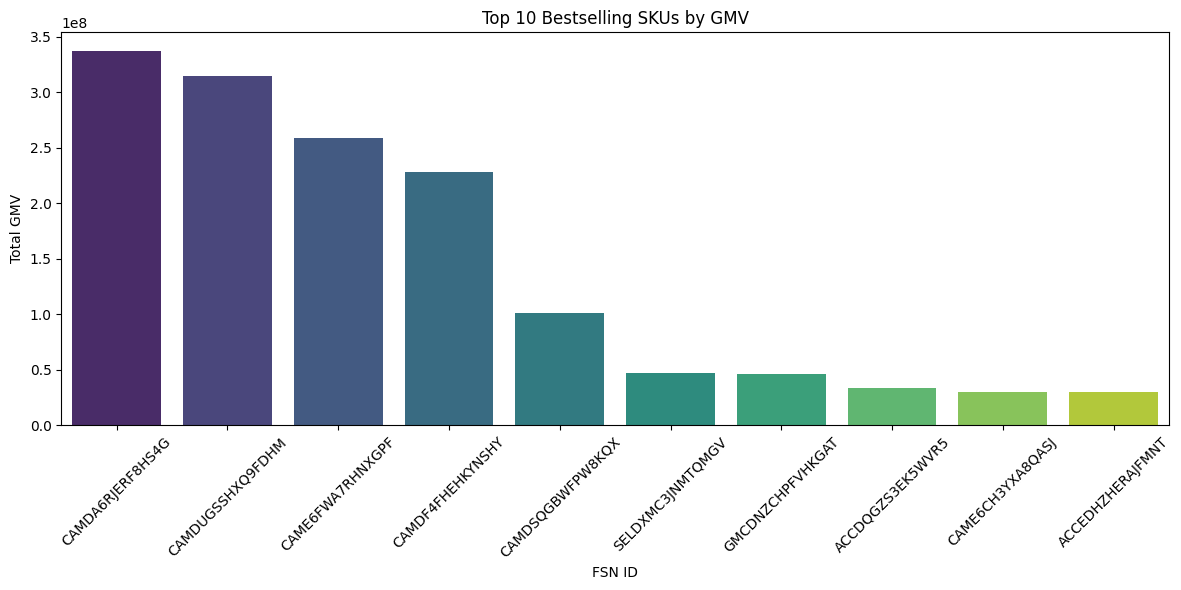

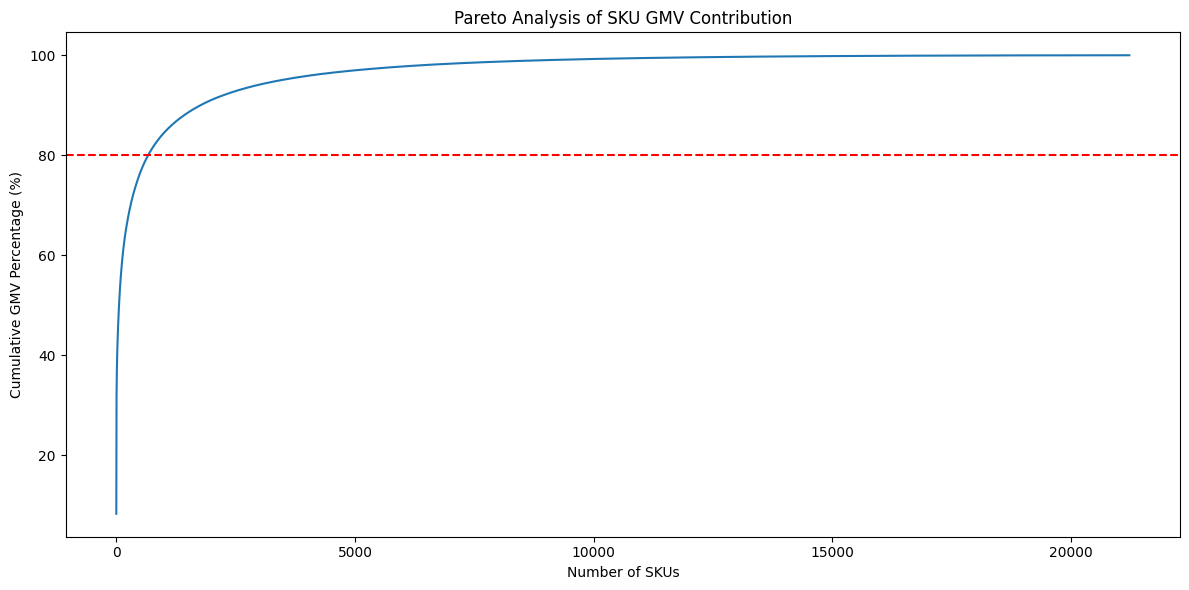

Category-wise Performance (Top Categories):
                           Category_GMV  Category_Units
product_analytic_category                              
Camera                       1780718983          102383
EntertainmentSmall           1293196036          960536
GamingHardware                454665254          238646
CameraAccessory               303562521          265345
GameCDDVD                     213747898          118332


In [27]:

orders = preprocessed_data.copy()
sku_details = pd.read_csv('SKU_details.csv')

# Calculate SKU-level performance metrics
sku_performance = orders.groupby('fsn_id').agg(
    Total_GMV=('gmv', 'sum'),
    Total_Units=('units', 'sum'),
    Avg_MRP=('product_mrp', 'mean')
).reset_index()

# Identify top 10 and bottom 10 SKUs by GMV
top_10_skus = sku_performance.nlargest(10, 'Total_GMV')
bottom_10_skus = sku_performance.nsmallest(10, 'Total_GMV')

# Merge with SKU details for category-wise analysis
merged_data = pd.merge(sku_performance, sku_details, on='fsn_id', how='left')

category_performance = merged_data.groupby('product_analytic_category').agg(
    Category_GMV=('Total_GMV', 'sum'),
    Category_Units=('Total_Units', 'sum')
).sort_values(by='Category_GMV', ascending=False)

# Visualization of top 10 bestselling SKUs
plt.figure(figsize=(12,6))
sns.barplot(x='fsn_id', y='Total_GMV', data=top_10_skus, palette='viridis')
plt.title('Top 10 Bestselling SKUs by GMV')
plt.xlabel('FSN ID')
plt.ylabel('Total GMV')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pareto Analysis (80/20 rule)
sku_sorted = sku_performance.sort_values(by='Total_GMV', ascending=False)
sku_sorted['Cumulative_Percentage'] = 100 * sku_sorted['Total_GMV'].cumsum() / sku_sorted['Total_GMV'].sum()

plt.figure(figsize=(12,6))
plt.plot(sku_sorted['Cumulative_Percentage'].values)
plt.axhline(y=80, color='r', linestyle='--')
plt.title('Pareto Analysis of SKU GMV Contribution')
plt.xlabel('Number of SKUs')
plt.ylabel('Cumulative GMV Percentage (%)')
plt.tight_layout()
plt.show()

print("Category-wise Performance (Top Categories):")
print(category_performance.head(10))

In [28]:
# orders['order_date'] = pd.to_datetime(orders['order_date'])
# daily_sales = orders.pivot_table(index='order_date', columns='fsn_id', values='units', aggfunc='sum').fillna(0)

# # Identify stockouts (days with zero units sold)
# stockouts = (daily_sales == 0).astype(int)

# # Estimate lost revenue due to stockouts using average daily sales when in stock
# lost_revenue_estimates = {}
# for sku in daily_sales.columns:
#     avg_units_sold_instock = daily_sales[sku][daily_sales[sku] > 0].mean()
#     avg_gmv_per_unit = orders[orders['fsn_id'] == sku]['gmv'].sum() / max(orders[orders['fsn_id'] == sku]['units'].sum(),1)
#     total_stockout_days = stockouts[sku].sum()
#     lost_revenue_estimates[sku] = total_stockout_days * avg_units_sold_instock * avg_gmv_per_unit

# lost_revenue_df = pd.DataFrame.from_dict(lost_revenue_estimates, orient='index', columns=['Estimated_Lost_Revenue']).sort_values(by='Estimated_Lost_Revenue', ascending=False).head(10)

# # Visualization of top SKUs by lost revenue due to stockouts
# plt.figure(figsize=(12,6))
# sns.barplot(x=lost_revenue_df.index, y='Estimated_Lost_Revenue', data=lost_revenue_df, palette='rocket')
# plt.title('Top 10 SKUs by Estimated Lost Revenue due to Stockouts')
# plt.xlabel('FSN ID')
# plt.ylabel('Estimated Lost Revenue')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# print("Top SKUs by estimated lost revenue due to stockouts:")
# print(lost_revenue_df)

In [29]:
NPS

Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0          NaN    July'23     Aug'23    Sept'23     Oct'23     Nov'23   
1          NPS  54.599588  59.987101  46.925419  44.398389       47.0   
2  Stock Index       1177       1206       1101       1210       1233   

  Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  \
0     Dec'23     Jan'24     Feb'24     Mar'24      Apr'24      May'24   
1       45.8  47.093031  50.327406   49.02055   51.827605   47.306951   
2       1038       1052       1222       1015        1242        1228   

  Unnamed: 12  
0     June'24  
1   50.516687  
2        1194

In [30]:
NPS2=NPS[0:2]

In [31]:
NPS2

Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0        NaN    July'23     Aug'23    Sept'23     Oct'23     Nov'23   
1        NPS  54.599588  59.987101  46.925419  44.398389       47.0   

  Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  \
0     Dec'23     Jan'24     Feb'24     Mar'24      Apr'24      May'24   
1       45.8  47.093031  50.327406   49.02055   51.827605   47.306951   

  Unnamed: 12  
0     June'24  
1   50.516687

In [32]:
# NPS2_cleaned = NPS2.iloc[1].melt(ignore_index=False).reset_index()

# # Rename columns
# NPS2_cleaned.columns = ["Metric", "MonthYear", "NPS"]

# # Copy the first row's index column
# NPS2_cleaned["RefIndex"] = NPS2.iloc[0, 0]


# # Keep only the necessary columns
# NPS2_cleaned = NPS2_cleaned[["RefIndex", "MonthYear", "NPS"]]

# print(NPS2_cleaned)

In [33]:
NPS2=NPS[0:2]

In [34]:
NPS2.columns = NPS2.iloc[0]  # Set first row as column names
NPS2 = NPS2[1:].reset_index(drop=True)  # Drop the first row

# Reshape the data
NPS_cleaned = NPS2.melt(id_vars=NPS2.columns[0], var_name="MonthYear", value_name="Value")

# Rename the first column
NPS_cleaned.rename(columns={NPS_cleaned.columns[0]: "Metric"}, inplace=True)

# Drop any NaN values
NPS_cleaned = NPS_cleaned.dropna(subset=["Value"])

# Extract Year
NPS_cleaned["Year"] = NPS_cleaned["MonthYear"].str.extract(r"(\d{2})'?$").astype(int) + 2000

# Extract Month and convert to number
month_mapping = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "June": 6,
    "July": 7, "Aug": 8, "Sept": 9, "Oct": 10, "Nov": 11, "Dec": 12
}
NPS_cleaned["Month"] = NPS_cleaned["MonthYear"].str.extract(r"([A-Za-z]+)").replace(month_mapping)

# Reorder and keep only necessary columns
NPS_cleaned = NPS_cleaned[["Metric", "Year", "Month", "Value"]]

print(NPS_cleaned)

   Metric  Year  Month      Value
0     NPS  2023      7  54.599588
1     NPS  2023      8  59.987101
2     NPS  2023      9  46.925419
3     NPS  2023     10  44.398389
4     NPS  2023     11       47.0
5     NPS  2023     12       45.8
6     NPS  2024      1  47.093031
7     NPS  2024      2  50.327406
8     NPS  2024      3   49.02055
9     NPS  2024      4  51.827605
10    NPS  2024      5  47.306951
11    NPS  2024      6  50.516687


C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\251776292.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  NPS_cleaned["Month"] = NPS_cleaned["MonthYear"].str.extract(r"([A-Za-z]+)").replace(month_mapping)


In [35]:
NPS_cleaned=NPS_cleaned.drop(columns=['Metric'])

In [36]:

NPS_cleaned.rename(columns={'Value': 'NPS'}, inplace=True)
NPS_cleaned

Year  Month        NPS
0   2023      7  54.599588
1   2023      8  59.987101
2   2023      9  46.925419
3   2023     10  44.398389
4   2023     11       47.0
5   2023     12       45.8
6   2024      1  47.093031
7   2024      2  50.327406
8   2024      3   49.02055
9   2024      4  51.827605
10  2024      5  47.306951
11  2024      6  50.516687

In [37]:
NPS_cleaned["NPS"] = pd.to_numeric(NPS_cleaned["NPS"], errors="coerce")


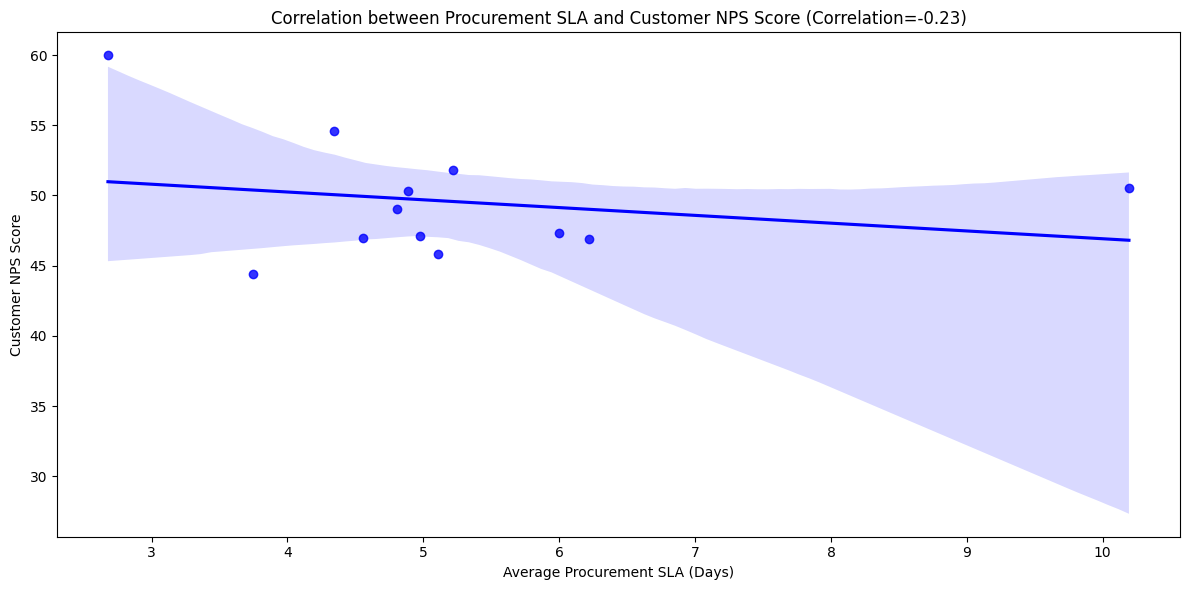

Correlation between Procurement SLA and Customer Satisfaction (NPS): -0.23


In [38]:
orders = preprocessed_data.copy()

# Use the provided `nps_scores` DataFrame directly
nps_scores = NPS_cleaned.copy()
# nps_scores = pd.DataFrame({
#     "Year": [2023, 2023, 2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024, 2024, 2024],
#     "Month": [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6],
#     "NPS": [54.6, 60.0, 46.9, 44.4, 47.0, 45.8, 47.1, 50.3, 49.0, 51.8, 47.3, 50.5],
#     "Stock Index": [1177, 1206, 1101, 1210, 1233, 1038, 1052, 1222, 1015, 1242, 1228, 1194]
# })

# Create a new 'MonthYear' column for merging
nps_scores['MonthYear'] = pd.to_datetime(nps_scores[['Year', 'Month']].assign(Day=1))

# Prepare orders data for merging
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['order_month'] = orders['order_date'].dt.to_period('M').dt.to_timestamp()

# Calculate monthly average procurement SLA from orders data
monthly_sla_avg = orders.groupby('order_month')['product_procurement_sla'].mean().reset_index()
monthly_sla_avg.rename(columns={'order_month': 'MonthYear', 'product_procurement_sla': 'Avg_Procurement_SLA'}, inplace=True)

# Merge SLA with NPS scores for correlation analysis
merged_nps_sla = pd.merge(monthly_sla_avg, nps_scores[['MonthYear', 'NPS']], on="MonthYear")

# Correlation analysis between SLA and NPS scores
corr_value = merged_nps_sla["Avg_Procurement_SLA"].corr(merged_nps_sla["NPS"])

# Visualization of correlation between Procurement SLA and NPS Score
plt.figure(figsize=(12,6))
sns.regplot(data=merged_nps_sla, x="Avg_Procurement_SLA", y="NPS", color="blue")
plt.title(f"Correlation between Procurement SLA and Customer NPS Score (Correlation={corr_value:.2f})")
plt.xlabel("Average Procurement SLA (Days)")
plt.ylabel("Customer NPS Score")
plt.tight_layout()
plt.show()

print(f"Correlation between Procurement SLA and Customer Satisfaction (NPS): {corr_value:.2f}")

In [39]:
nps_long=nps_scores.copy()


Monthly Average Procurement SLA:
   MonthYear  Avg_Procurement_SLA
0 2023-05-01             4.000000
1 2023-06-01             2.333333
2 2023-07-01             4.344711
3 2023-08-01             2.678967
4 2023-09-01             6.218172

Merged Data:
   MonthYear  Avg_Procurement_SLA  Year  Month        NPS
0 2023-07-01             4.344711  2023      7  54.599588
1 2023-08-01             2.678967  2023      8  59.987101
2 2023-09-01             6.218172  2023      9  46.925419
3 2023-10-01             3.749480  2023     10  44.398389
4 2023-11-01             4.558090  2023     11  47.000000

Correlation between Procurement SLA and NPS Scores: -0.23


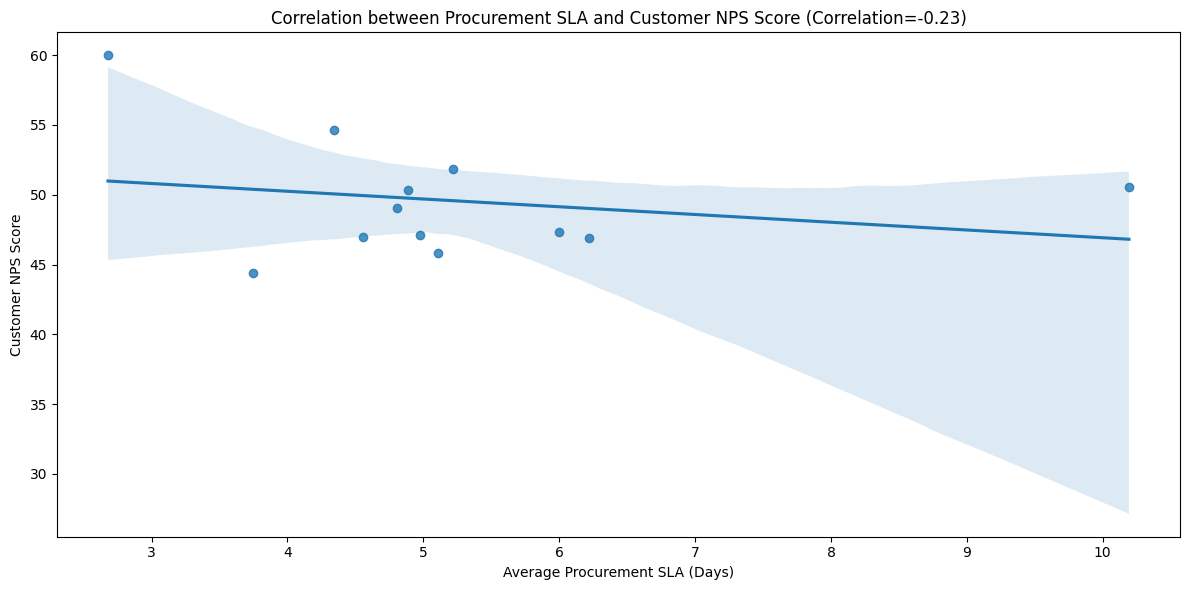

In [40]:

orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['order_month'] = orders['order_date'].dt.to_period('M').dt.to_timestamp()
monthly_sla_avg = orders.groupby('order_month')['product_procurement_sla'].mean().reset_index()
monthly_sla_avg.rename(columns={'order_month': 'MonthYear', 'product_procurement_sla': 'Avg_Procurement_SLA'}, inplace=True)

print("\nMonthly Average Procurement SLA:")
print(monthly_sla_avg.head())

# Merge SLA with NPS scores for correlation analysis
merged_data = pd.merge(monthly_sla_avg, nps_long, on='MonthYear')

# Convert 'NPS' column to numeric, handling errors
merged_data['NPS'] = pd.to_numeric(merged_data['NPS'], errors='coerce')

# Drop rows with NaN values in 'NPS' column
merged_data = merged_data.dropna(subset=['NPS'])

print("\nMerged Data:")
print(merged_data.head())

# Correlation analysis between SLA and NPS
correlation = merged_data['Avg_Procurement_SLA'].corr(merged_data['NPS'])
print(f"\nCorrelation between Procurement SLA and NPS Scores: {correlation:.2f}")

# Visualization of correlation between Procurement SLA and NPS Score
plt.figure(figsize=(12, 6))
sns.regplot(data=merged_data, x='Avg_Procurement_SLA', y='NPS')
plt.title(f"Correlation between Procurement SLA and Customer NPS Score (Correlation={correlation:.2f})")
plt.xlabel("Average Procurement SLA (Days)")
plt.ylabel("Customer NPS Score")
plt.tight_layout()
plt.show()

In [41]:
customer_orders =preprocessed_data.copy()

# Load NPS Scores File
nps_scores = NPS_cleaned.copy()

# Convert Year and Month into a single datetime column for NPS Scores
nps_scores['MonthYear'] = pd.to_datetime(nps_scores[['Year', 'Month']].assign(Day=1))

# Convert order_date in Customer Orders to datetime format
customer_orders['order_date'] = pd.to_datetime(customer_orders['order_date'])

# Extract month-year from order_date for merging with NPS data
customer_orders['order_month'] = customer_orders['order_date'].dt.to_period('M').dt.to_timestamp()

In [42]:
# Calculate total delivery time
customer_orders['Total_Delivery_Time'] = customer_orders['deliverybdays'] + customer_orders['deliverycdays']

# Segment orders into fast, medium, and slow delivery groups based on Total_Delivery_Time
customer_orders['Delivery_Group'] = pd.cut(
    customer_orders['Total_Delivery_Time'],
    bins=[-float('inf'), 3, 7, float('inf')],  # Extend bin range to include 0
    labels=['Fast', 'Medium', 'Slow'],
    include_lowest=True  # Include lower boundary
)

print("\nCustomer Orders with Delivery Groups:")
print(customer_orders[['cust_id', 'Total_Delivery_Time', 'Delivery_Group']].head())


Customer Orders with Delivery Groups:
                  cust_id  Total_Delivery_Time Delivery_Group
0  -1.01299130778588E+018                    0           Fast
1  -8.99032457905512E+018                    0           Fast
2   -1.0404429420466E+018                    0           Fast
3  -7.60496084352714E+018                    0           Fast
4    2.8945572083453E+018                    0           Fast



Average NPS Scores by Delivery Group:
Delivery_Group
Fast      47.769476
Medium    49.560783
Slow      49.702419
Name: NPS, dtype: float64


C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\315142448.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_nps = merged_data.groupby('Delivery_Group')['NPS'].mean()
C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\315142448.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_nps.index, y=grouped_nps.values, palette='viridis')


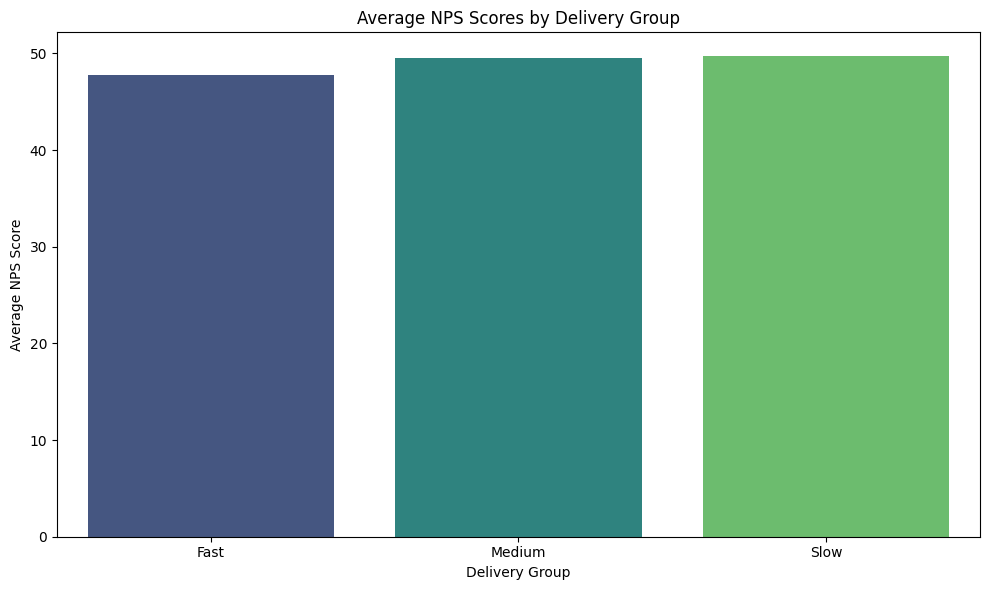

In [43]:
merged_data = pd.merge(customer_orders, nps_scores[['MonthYear', 'NPS']], left_on='order_month', right_on='MonthYear')

# Analyze average NPS scores by delivery group
grouped_nps = merged_data.groupby('Delivery_Group')['NPS'].mean()
print("\nAverage NPS Scores by Delivery Group:")
print(grouped_nps)

# Visualize NPS scores by delivery group
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_nps.index, y=grouped_nps.values, palette='viridis')
plt.title('Average NPS Scores by Delivery Group')
plt.xlabel('Delivery Group')
plt.ylabel('Average NPS Score')
plt.tight_layout()
plt.show()


Repeat Purchase Rate by Delivery Group:
Delivery_Group
Fast      0.410896
Medium    0.300403
Slow      0.297859
Name: is_repeat, dtype: float64


C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\459850520.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  repeat_rate_by_group = customer_orders.groupby('Delivery_Group')['is_repeat'].mean()
C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\459850520.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=repeat_rate_by_group.index, y=repeat_rate_by_group.values, palette='coolwarm')


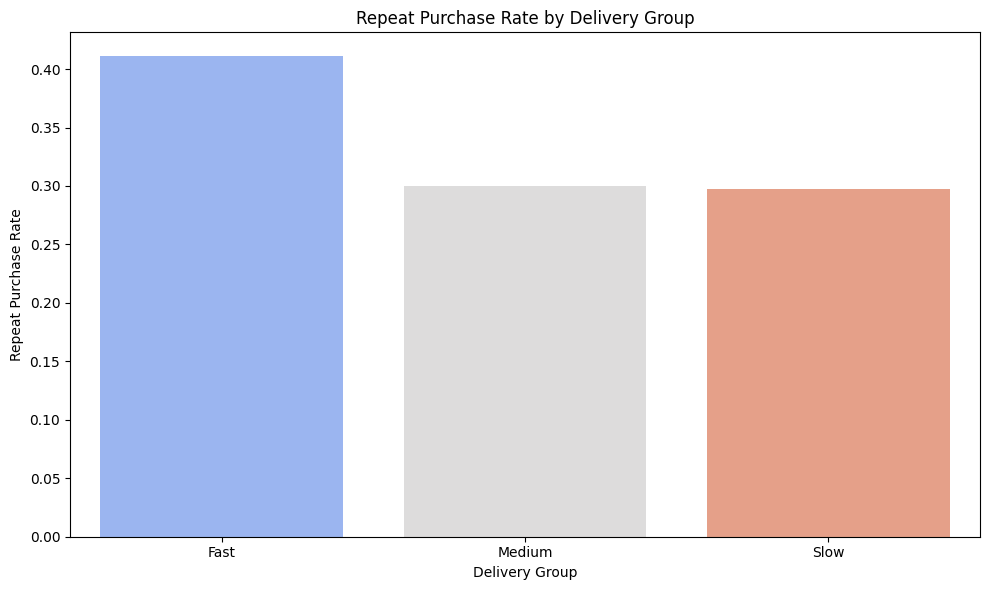

In [44]:
customer_orders['is_repeat'] = customer_orders.groupby('cust_id')['cust_id'].transform('count') > 1

# Analyze repeat purchase rates by delivery group
repeat_rate_by_group = customer_orders.groupby('Delivery_Group')['is_repeat'].mean()
print("\nRepeat Purchase Rate by Delivery Group:")
print(repeat_rate_by_group)

# Visualize repeat purchase rate by delivery group
plt.figure(figsize=(10, 6))
sns.barplot(x=repeat_rate_by_group.index, y=repeat_rate_by_group.values, palette='coolwarm')
plt.title('Repeat Purchase Rate by Delivery Group')
plt.xlabel('Delivery Group')
plt.ylabel('Repeat Purchase Rate')
plt.tight_layout()
plt.show()

In [45]:
# # Calculate correlation between Deliverycdays and GMV in future months
# future_spending_corr = customer_orders.groupby('cust_id').apply(
#     lambda x: x[['deliverycdays', 'gmv']].corr().iloc[0, 1]
# ).mean()

# print(f"\nCorrelation between Deliverycdays and Future GMV: {future_spending_corr:.2f}")


In [46]:
# Identify repeat customers (customers with more than one order)
customer_orders['is_repeat'] = customer_orders.groupby('cust_id')['cust_id'].transform('count') > 1

# Compare repeat purchase rates for customers with long vs. short procurement SLA
long_sla_threshold = customer_orders['product_procurement_sla'].mean()  # Use mean SLA as threshold
customer_orders['SLA_Group'] = customer_orders['product_procurement_sla'].apply(lambda x: 'Long' if x > long_sla_threshold else 'Short')

repeat_rate_by_sla = customer_orders.groupby('SLA_Group')['is_repeat'].mean()
print("\nRepeat Purchase Rate by Procurement SLA Group:")
print(repeat_rate_by_sla)



Repeat Purchase Rate by Procurement SLA Group:
SLA_Group
Long     0.449796
Short    0.387739
Name: is_repeat, dtype: float64


In [47]:
# Example segmentation: Assuming SLA is measured in days and stored in 'Procurement_SLA'
customer_orders['SLA_Group'] = pd.cut(
    customer_orders['sla'],  # Ensure this column exists
    bins=[-float('inf'), 7, float('inf')],  # Adjust threshold as needed
    labels=['Short', 'Long'],
    include_lowest=True
)

print(customer_orders[['sla', 'SLA_Group']].head())  # Verify assignment

   sla SLA_Group
0    5     Short
1    7     Short
2   10      Long
3    4     Short
4    6     Short


In [48]:
merged_data = pd.merge(
    customer_orders[['order_month', 'SLA_Group']],  # Keep SLA_Group
    nps_scores[['MonthYear', 'NPS']],
    left_on='order_month',
    right_on='MonthYear',
    how='inner'
)


Average NPS Scores by Procurement SLA Group:
SLA_Group
Short    48.107860
Long     48.196808
Name: NPS, dtype: float64


C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\1221810086.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_nps_by_sla = merged_data.groupby('SLA_Group')['NPS'].mean()
C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\1221810086.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_nps_by_sla.index, y=grouped_nps_by_sla.values, palette='coolwarm')


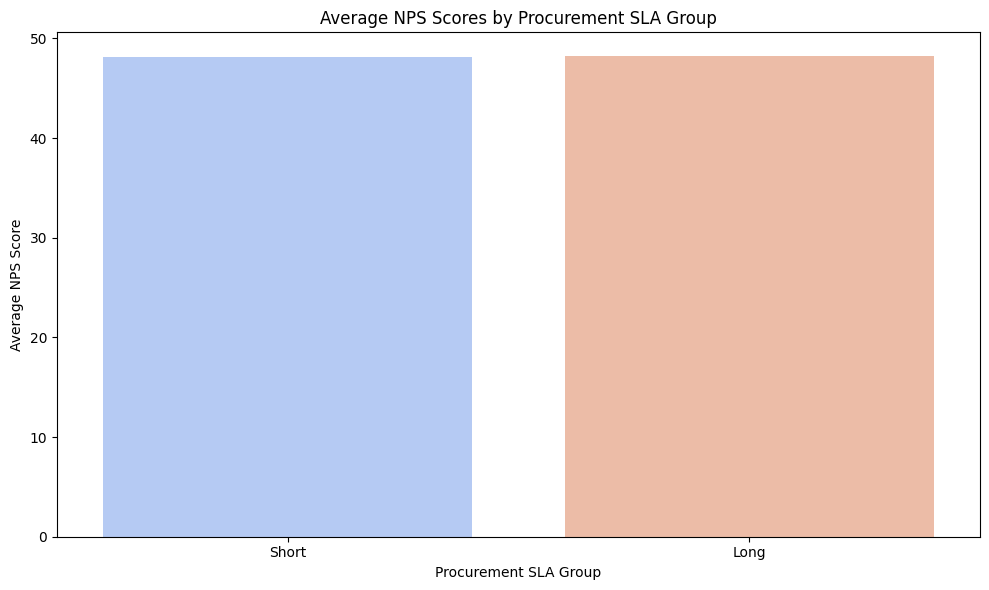

In [49]:
grouped_nps_by_sla = merged_data.groupby('SLA_Group')['NPS'].mean()
print("\nAverage NPS Scores by Procurement SLA Group:")
print(grouped_nps_by_sla)

# Visualize NPS scores by Procurement SLA group
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_nps_by_sla.index, y=grouped_nps_by_sla.values, palette='coolwarm')
plt.title('Average NPS Scores by Procurement SLA Group')
plt.xlabel('Procurement SLA Group')
plt.ylabel('Average NPS Score')
plt.tight_layout()
plt.show()

  SLA_Group        NPS
0     Short  44.398389
1     Short  44.398389
2      Long  44.398389
3     Short  44.398389
4     Short  44.398389

Average NPS Scores by Procurement SLA Group:
SLA_Group
Short    48.107860
Long     48.196808
Name: NPS, dtype: float64


C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\1508039595.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_nps_by_sla = merged_data.groupby('SLA_Group')['NPS'].mean()
C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\1508039595.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_nps_by_sla.index, y=grouped_nps_by_sla.values, hue=None, legend=False, palette='coolwarm')


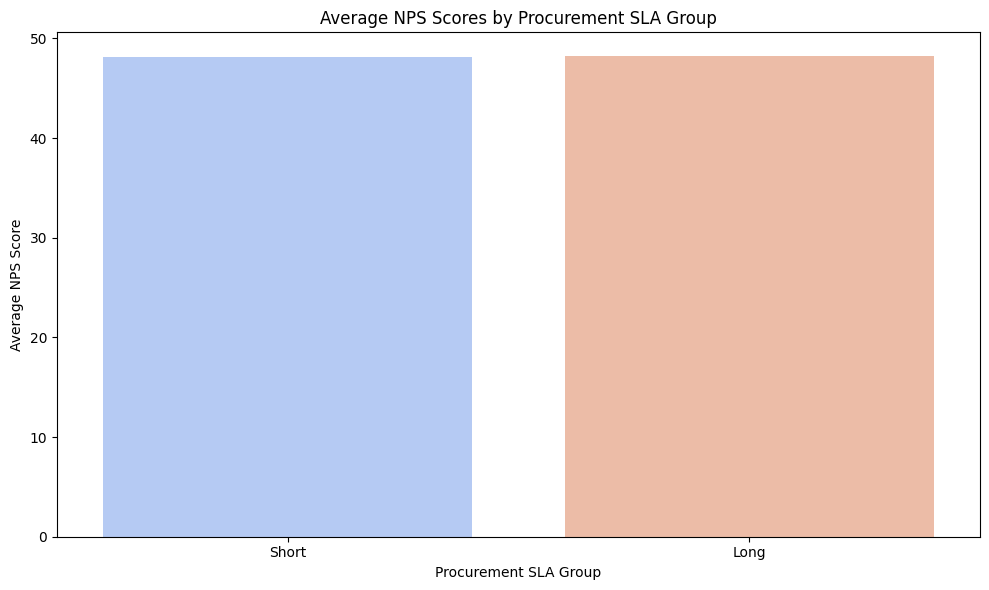

In [50]:

# Ensure SLA_Group is correctly assigned before merging
customer_orders['SLA_Group'] = pd.cut(
    customer_orders['sla'].fillna(0),  # Ensure no NaN values
    bins=[-float('inf'), 7, float('inf')],
    labels=['Short', 'Long'],
    include_lowest=True
)

# Merge data while keeping SLA_Group
merged_data = pd.merge(
    customer_orders[['order_month', 'SLA_Group']],
    nps_scores[['MonthYear', 'NPS']],
    left_on='order_month',
    right_on='MonthYear',
    how='inner'
)

# Verify merge success
print(merged_data[['SLA_Group', 'NPS']].head())

# Analyze NPS scores by SLA group
grouped_nps_by_sla = merged_data.groupby('SLA_Group')['NPS'].mean()
print("\nAverage NPS Scores by Procurement SLA Group:")
print(grouped_nps_by_sla)

# Visualize NPS scores by SLA group
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_nps_by_sla.index, y=grouped_nps_by_sla.values, hue=None, legend=False, palette='coolwarm')
plt.title('Average NPS Scores by Procurement SLA Group')
plt.xlabel('Procurement SLA Group')
plt.ylabel('Average NPS Score')
plt.tight_layout()
plt.show()



Retention Rate by Procurement SLA Group:
SLA_Group
Short    0.390136
Long     0.387607
Name: is_repeat, dtype: float64


C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\2629872528.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention_rate_by_sla = customer_orders.groupby('SLA_Group')['is_repeat'].mean()
C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\2629872528.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retention_rate_by_sla.index, y=retention_rate_by_sla.values, palette='viridis')


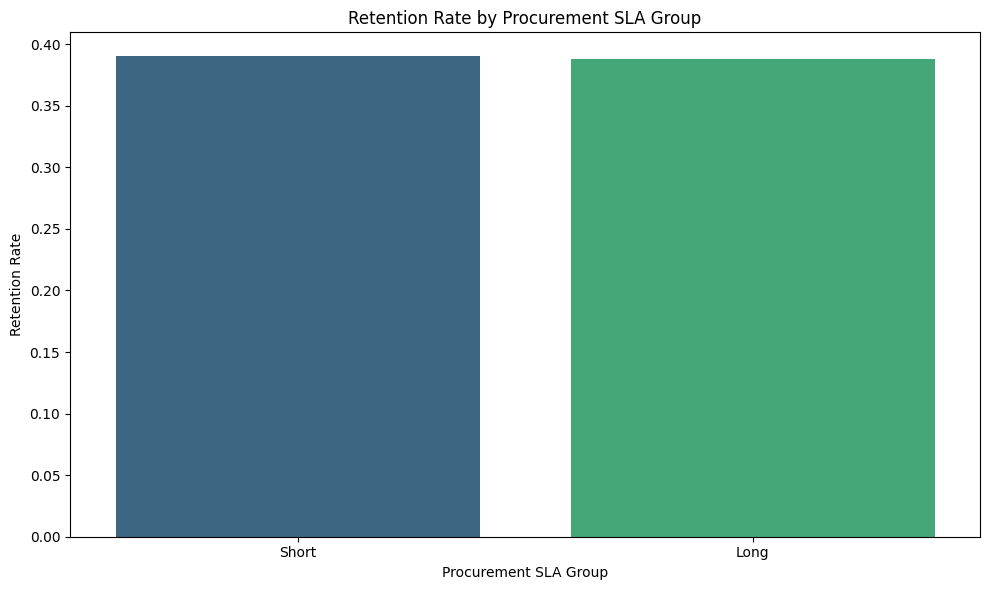

In [51]:
# Analyze retention rates (repeat purchases) for Short vs Long SLA groups
retention_rate_by_sla = customer_orders.groupby('SLA_Group')['is_repeat'].mean()
print("\nRetention Rate by Procurement SLA Group:")
print(retention_rate_by_sla)

# Visualize retention rates by Procurement SLA group
plt.figure(figsize=(10, 6))
sns.barplot(x=retention_rate_by_sla.index, y=retention_rate_by_sla.values, palette='viridis')
plt.title('Retention Rate by Procurement SLA Group')
plt.xlabel('Procurement SLA Group')
plt.ylabel('Retention Rate')
plt.tight_layout()
plt.show()

## Data Preprocessing and Hypothesis Testing


In [52]:
df2=preprocessed_data.copy()
df2['order_date'] = pd.to_datetime(df2['order_date'])
df2['month_year'] = df2['order_date'].dt.strftime('%Y-%m')
monthly_revenue = df2.groupby('month_year')['gmv'].sum().reset_index(name='revenue')



In [53]:
df_media = media_data.copy()

In [54]:

# fill na with 0
df_media=df_media.fillna(0)


In [55]:
df_media.columns = df_media.iloc[0]

# Drop the first row (as it's now being used as column names)
df_media = df_media.drop(index=0)

# Reset the index
df_media.reset_index(drop=True, inplace=True)

# Display the updated DataFrame


In [56]:
df_media.columns = df_media.iloc[0]  # Set first row as column names
df_media = df_media[1:].reset_index(drop=True)  # Drop the first row and reset index


In [57]:
df_media

0   0.0  Year Month Total Investment        TV   Digital Sponsorship  \
0   0.0  2023     7        17.061775   0.21533  2.533014     7.41427   
1   0.0  2023     8         5.064306  0.006438  1.278074    1.063332   
2   0.0  2023     9         96.25438  3.879504  1.356528   62.787651   
3   0.0  2023    10       170.156297  6.144711  12.62248   84.672532   
4   0.0  2023    11         51.21622   4.22063  1.275469   14.172116   
5   0.0  2023    12       106.745312  5.397502   3.06336   56.705419   
6   0.0  2024     1           74.196      4.38     0.456         4.2   
7   0.0  2024     2           48.052  2.586008  1.912651   11.725555   
8   0.0  2024     3       100.024621       9.3       2.1       41.59   
9   0.0  2024     4        56.848241  5.205196  0.871892   24.308354   
10  0.0  2024     5           78.057      1.37      0.77       31.68   
11  0.0  2024     6        42.834216  1.662717  1.420761   25.048541   

0  Content Marketing Online marketing  Affiliates        SEM Radio      Other  
0           0.000933         1.327278    0.547254   5.023697     0          0  
1           0.000006         0.129244    0.073684   2.513528     0          0  
2           0.610292         16.37999    5.038266   6.202149     0          0  
3           3.444075        24.371778    6.973711  31.927011     0          0  
4           0.168633        19.561574    6.595767   5.222032     0          0  
5           1.067307        22.503756    6.826938   11.18103     0          0  
6                0.9             22.9        7.37        4.2   2.7      27.09  
7           0.596771        19.892366    6.465019    4.87363     0          0  
8               0.37        18.437818    6.217667   5.193591  0.87  15.945545  
9           0.034876         16.51451    5.693456   4.219958     0          0  
10              0.79            23.65         6.8       6.91   1.1      4.987  
11          0.045081           7.9713    2.768023   3.735516     0          0

In [58]:
monthly_revenue['revenue']/=1e7
monthly_revenue.set_index("month_year", inplace=True)

In [59]:
df_media['month_year'] = df_media['Year'].astype(str) + '-' + df_media['Month'].astype(str).str.zfill(2)
df_media.set_index('month_year', inplace=True)


In [60]:
df_media=df_media.drop(columns=[0.0])

In [61]:
df_combined = monthly_revenue.join(df_media, how='outer')


In [62]:
df_combined=df_combined.dropna()

In [63]:
df_combined = df_combined.apply(pd.to_numeric, errors='coerce')


In [64]:
df_combined.to_csv('df_combined.csv', index=True)


In [65]:
# Load the dataset and drop unnecessary columns
df_new_main = pd.read_csv('df_combined.csv')
df_new_main.set_index('month_year', inplace=True)

df_new_main = df_new_main.drop(columns=['Total Investment'])

# Create a copy of the dataset for transformations
df_new = df_new_main.copy()

# Apply log transformation to all columns after 'revenue'
for column in df_new.columns[df_new.columns.get_loc('revenue') + 1:]:
    df_new[column + '_log'] = (df_new[column] + 1).apply(lambda x: x if x > 0 else 0).apply(np.log)

# Perform pairwise hypothesis tests between log-transformed columns
significant_pairs = []
for i in range(df_new.shape[1] - 1):
    for j in range(i + 1, df_new.shape[1]):
        col1 = df_new.columns[i]
        col2 = df_new.columns[j]
        if 'log' in col1 and 'log' in col2:  # Check if both columns are log-transformed
            t_stat, p_value = stats.ttest_ind(df_new[col1], df_new[col2])
            if p_value < 0.05:  # Adjust significance level as needed
                significant_pairs.append((col1, col2, p_value))

# Print significant pairs of log-transformed columns
print("Significant pairs of log-transformed columns:")
for pair in significant_pairs:
    print(f"{pair[0]} and {pair[1]}: p-value = {pair[2]}")

# Reset to the original dataset for pairwise tests on all columns
df_new = df_new_main.copy()
significant_pairs = []
for i in range(df_new.shape[1] - 1):
    for j in range(i + 1, df_new.shape[1]):
        col1 = df_new.columns[i]
        col2 = df_new.columns[j]
        t_stat, p_value = stats.ttest_ind(df_new[col1], df_new[col2])
        if p_value < 0.05:  # Adjust significance level as needed
            significant_pairs.append((col1, col2, p_value))

# Print significant pairs of all columns
print("\nSignificant pairs of all columns:")
for pair in significant_pairs:
    print(f"{pair[0]} and {pair[1]}: p-value = {pair[2]}")

# Count the number of significant pairs
count = 0
for i in range(df_new.shape[1] - 1):
    for j in range(i + 1, df_new.shape[1]):
        col1 = df_new.columns[i]
        col2 = df_new.columns[j]
        t_stat, p_value = stats.ttest_ind(df_new[col1], df_new[col2])
        if p_value < 0.05:
            count += 1

# Print the count of significant pairs
print("Number of significant pairs:", count)

# Reapply log transformation for further analysis
df_new = df_new_main.copy()
for column in df_new.columns[df_new.columns.get_loc('revenue') + 1:]:
    df_new[column + '_log'] = (df_new[column] + 1).apply(lambda x: x if x > 0 else 0).apply(np.log)

# Count significant pairs among log-transformed columns
count = 0
for i in range(df_new.shape[1] - 1):
    for j in range(i + 1, df_new.shape[1]):
        col1 = df_new.columns[i]
        col2 = df_new.columns[j]
        if 'log' in col1 and 'log' in col2:
            t_stat, p_value = stats.ttest_ind(df_new[col1], df_new[col2])
            if p_value < 0.05:
                count += 1

# Print the count of significant pairs among log-transformed columns
print("Number of significant pairs with log columns:", count)

# Calculate ROI for TV
df_new["ROI_TV"] = 48455469.40939132 / df_new["TV"]


Significant pairs of log-transformed columns:
Year_log and Month_log: p-value = 1.7149417899338987e-20
Year_log and TV_log: p-value = 1.8382165495198233e-19
Year_log and Digital_log: p-value = 6.070224462613996e-22
Year_log and Sponsorship_log: p-value = 1.158079154724133e-12
Year_log and Content Marketing_log: p-value = 1.5504028060278706e-25
Year_log and Online marketing_log: p-value = 3.0530390910869714e-14
Year_log and  Affiliates_log: p-value = 2.7669401510309995e-19
Year_log and SEM_log: p-value = 1.3643926408123444e-20
Year_log and Radio_log: p-value = 9.401175348460294e-26
Year_log and Other_log: p-value = 2.7098416116096785e-15
Month_log and Digital_log: p-value = 0.0017661159742976395
Month_log and Sponsorship_log: p-value = 0.004845178177451579
Month_log and Content Marketing_log: p-value = 5.096804303927952e-07
Month_log and Radio_log: p-value = 7.534129218033595e-08
Month_log and Other_log: p-value = 0.005710939420303549
TV_log and Sponsorship_log: p-value = 0.000247674440

## order weather

In [66]:
# Load the dataWeather_Data_2023 = pd.read_csv("Weather Data ONTARIO-2023.csv")
Weather_Data_2024 = pd.read_csv("Weather Data ONTARIO-2024.csv")

# Remove columns ending with 'Flag'
Weather_Data_2023 = Weather_Data_2023[[col for col in Weather_Data_2023.columns if not col.endswith('Flag')]]
Weather_Data_2024 = Weather_Data_2024[[col for col in Weather_Data_2024.columns if not col.endswith('Flag')]]

# Remove specific gust-related columns
cols_to_remove = ['Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)']
Weather_Data_2023 = Weather_Data_2023.drop(columns=[col for col in cols_to_remove if col in Weather_Data_2023.columns])
Weather_Data_2024 = Weather_Data_2024.drop(columns=[col for col in cols_to_remove if col in Weather_Data_2024.columns])

# Function to fill missing values with an average of neighboring values
def fill_missing_with_average(data, column):
    values = data[column].to_numpy()
    for i in range(len(values)):
        if pd.isna(values[i]):
            prev_values = values[max(0, i-3):i]
            next_values = values[i+1:min(len(values), i+4)]
            prev_values = np.nan_to_num(prev_values, nan=0)
            next_values = np.nan_to_num(next_values, nan=0)
            avg = (np.sum(prev_values) + np.sum(next_values)) / (len(prev_values) + len(next_values))
            values[i] = avg
    data[column] = values

# Columns to apply imputation
columns_to_fill = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)',
                   'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']

for column in columns_to_fill:
    if column in Weather_Data_2023.columns:
        fill_missing_with_average(Weather_Data_2023, column)
    if column in Weather_Data_2024.columns:
        fill_missing_with_average(Weather_Data_2024, column)

# Combine the datasets after imputation
combined_weather_data_after_imputation = pd.concat([Weather_Data_2023, Weather_Data_2024], ignore_index=True)
combined_weather_data_after_imputation.to_csv("combined_weather_data_after_imputation (1).csv", index=False)


C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\737240206.py:14: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  order_data['day_month_time'] = pd.to_datetime(order_data['day_month_time'], errors='coerce')


Monthly KPIs:
    order_month  total_orders  orders_delivered_late  %_orders_delivered_late
0      2023-05             1                      0                 0.000000
1      2023-06             6                      0                 0.000000
2      2023-07         87534                    167                 0.190783
3      2023-08           155                      1                 0.645161
4      2023-09        100804                     32                 0.031745
5      2023-10        202216                     30                 0.014836
6      2023-11        127268                     15                 0.011786
7      2023-12        154008                      5                 0.003247
8      2024-01        140510                     52                 0.037008
9      2024-02        141135                    234                 0.165799
10     2024-03        148790                   5456                 3.666913
11     2024-04        127863                  91469          

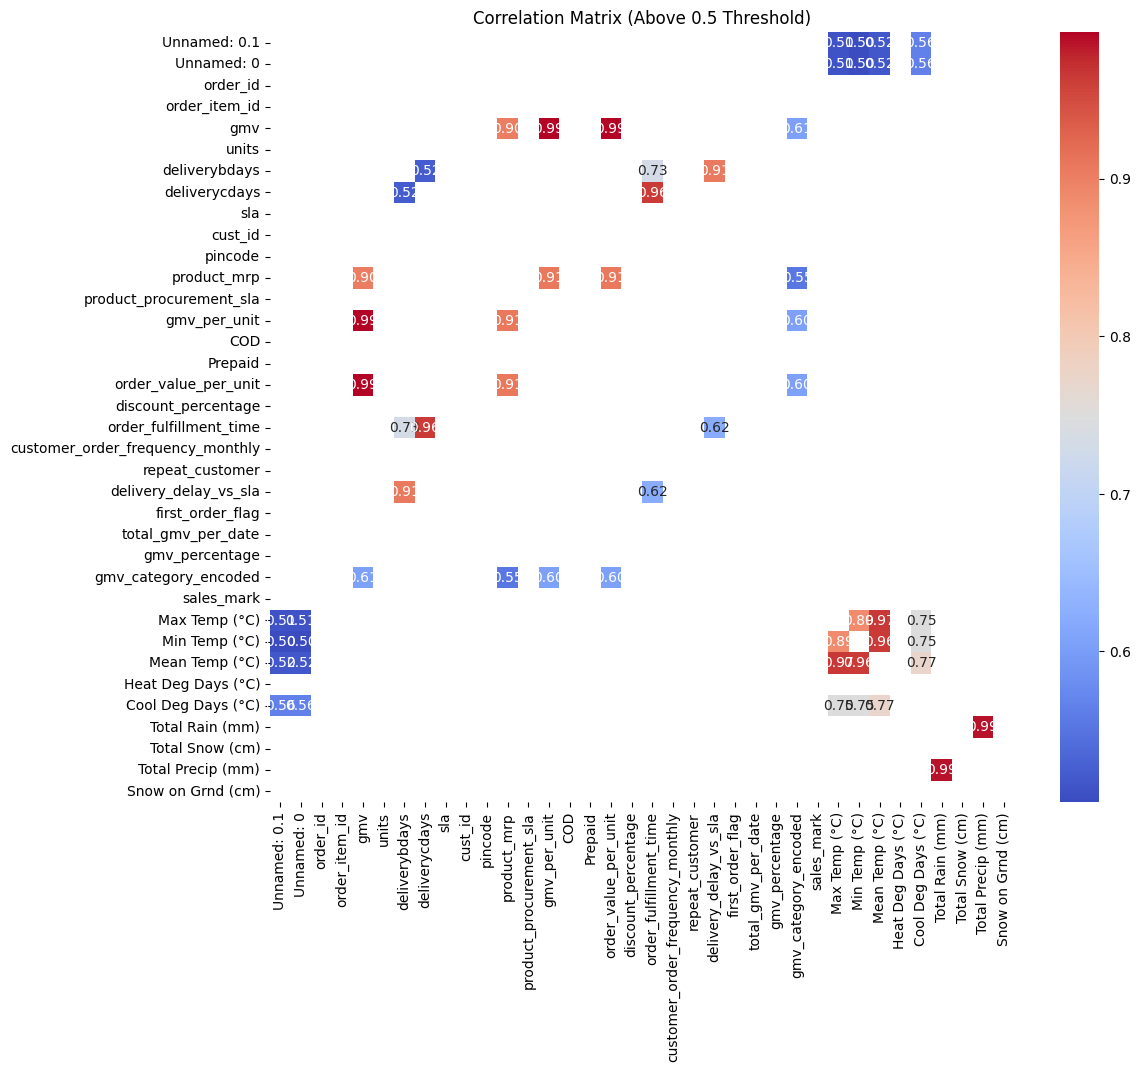

In [67]:
order_data = pd.read_csv('preprocessed_data.csv')
weather_data = pd.read_csv('combined_weather_data_after_imputation (1).csv')

# Convert 'order_date' column to datetime format for order data
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Create a new column 'day_month_time' in order data with formatted date
order_data['day_month_time'] = order_data['order_date'].dt.strftime('%d-%m-%Y')

# Combine 'Year', 'Month', and 'Day' columns in weather data to create a formatted date column
weather_data['Date/Time'] = pd.to_datetime(weather_data[['Year', 'Month', 'Day']]).dt.strftime('%d-%m-%Y')

# Convert date columns back to datetime format to handle potential errors
order_data['day_month_time'] = pd.to_datetime(order_data['day_month_time'], errors='coerce')
weather_data['Date/Time'] = pd.to_datetime(weather_data['Date/Time'], format='%d-%m-%Y', errors='coerce')

# Merge order data with weather data on the date column
order_data = order_data.merge(
    weather_data[['Date/Time', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
                  'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
                  'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']],
    left_on='day_month_time',
    right_on='Date/Time',
    how='left'
)

# Drop the redundant 'Date/Time' column after merging
order_data.drop(columns=['Date/Time'], inplace=True)

# Ensure 'order_date' is in datetime format
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Add a new column 'order_month' for monthly analysis
order_data['order_month'] = order_data['order_date'].dt.to_period('M')

# Group data by month and calculate delivery and logistics KPIs
monthly_kpis = order_data.groupby('order_month').agg(
    total_orders=('order_id', 'nunique'),
    orders_delivered_late=('delivery_delay_vs_sla', lambda x: (x > 0).sum())
).reset_index()

# Calculate the percentage of orders delivered late
monthly_kpis['%_orders_delivered_late'] = (monthly_kpis['orders_delivered_late'] /
                                           monthly_kpis['total_orders']) * 100

# Calculate correlation between sales and weather data
sales_weather_corr = order_data[['gmv', 'Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)']].corr()

# Analyze the impact of rain and snow on orders
rainy_snowy_days = order_data[(order_data['Total Rain (mm)'] > 0) | (order_data['Total Snow (cm)'] > 0)]
impact_rain_snow = rainy_snowy_days[['gmv', 'units']].sum()

# Calculate sales on special dates and weekends
special_date_sales = order_data[order_data['is_special_date'] == 1]['gmv'].sum()
weekend_sales = order_data[order_data['is_weekend'] == 1]['gmv'].sum()

# Print results with descriptive messages
print("Monthly KPIs:\n", monthly_kpis)
print("\nCorrelation Between Sales and Weather:\n", sales_weather_corr)
print("\nImpact of Rain and Snow on Orders:\n", impact_rain_snow)
print("\nTotal Sales on Special Dates:", special_date_sales)
print("Total Sales on Weekends:", weekend_sales)

# Calculate overall average GMV
overall_avg_gmv = order_data['gmv'].mean()

# Calculate average GMV on special dates and weekends
special_dates_gmv = order_data[order_data['is_special_date'] == True]['gmv'].mean()
weekend_gmv = order_data[order_data['is_weekend'] == 1]['gmv'].mean()

# Calculate percentage change in sales on special dates and weekends
kpis = {
    "% Change in Sales on Special Dates": ((special_dates_gmv - overall_avg_gmv) / overall_avg_gmv) * 100,
    "% Change in Sales on Weekends": ((weekend_gmv - overall_avg_gmv) / overall_avg_gmv) * 100
}

# Print calculated KPIs
print("\nKey Performance Indicators (KPIs):\n", kpis)

# Count occurrences of special dates
special_date_counts = order_data['is_special_date'].value_counts()
print("\nCount of Special Dates:\n", special_date_counts)

# Generate a correlation matrix for numeric columns
numeric_columns = order_data.select_dtypes(include=['number']).columns
correlation_matrix = order_data[numeric_columns].corr()

# Filter correlations above a threshold of 0.5
correlation_above_threshold = correlation_matrix[
    (correlation_matrix > 0.5) & (correlation_matrix != 1)
]

# Plot the filtered correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_above_threshold, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Above 0.5 Threshold)')
plt.show()


## Calculate Delivery Performance

This cell calculates the total delivery time, determines if orders were delivered on time based on SLA, and computes the overall order fulfillment rate.

In [69]:
df['delivery_time'] = df['deliverybdays'] + df['deliverycdays']
df['on_time_delivery'] = df['delivery_time'] <= df['sla']
fulfillment_rate = df['on_time_delivery'].mean() * 100
print(f"Order Fulfillment Rate: {fulfillment_rate:.2f}%")

Order Fulfillment Rate: 81.60%


## Calculate Revenue and Customer Metrics

This cell calculates:

1.  **Revenue:** Computes revenue by subtracting discounts from GMV.
2.  **Total Revenue:** Calculates and prints the sum of all revenue.
3.  **Average Order Value (AOV):** Calculates and prints the average revenue per unique order.
4.  **Customer Lifetime Value (CLV):** Calculates and prints CLV based on AOV, average purchase frequency, and assumed customer lifespan.

In [70]:
df['revenue'] = df['gmv'] - (df['product_mrp'] * df['units'] * df['discount_percentage']/100)
total_revenue = df['revenue'].sum()
print(f"Total Revenue: {total_revenue}")
aov = df['revenue'].sum() / df['order_id'].nunique()
print(f"Average Order Value (AOV): {aov}")
purchase_frequency = df['cust_id'].value_counts().mean()
customer_lifespan = 12  # Assume average retention of 12 months
clv = aov * purchase_frequency * customer_lifespan
print(f"Customer Lifetime Value (CLV): {clv}")

Total Revenue: 1191612017.0
Average Order Value (AOV): 793.785154582038
Customer Lifetime Value (CLV): 12378.583169971816


## Sales Event Impact Analysis

This cell calculates and displays the impact of sales events on GMV by comparing the total GMV during sales periods to the total GMV during normal days.

In [71]:
sales_mark_gmv = df[df['sales_mark'] == 1]['gmv'].sum()
normal_days_gmv = df[df['sales_mark'] == 0]['gmv'].sum()
sales_impact = sales_mark_gmv / normal_days_gmv
print(f"Sales Event Impact: {sales_impact:.2f}x")

Sales Event Impact: 0.21x


## Weekend vs. Weekday GMV Ratio

This cell calculates and prints the ratio of weekend GMV to weekday GMV, indicating the relative sales performance between weekends and weekdays.

In [72]:
weekend_gmv = df[df['is_weekend'] == 1]['gmv'].sum()
weekday_gmv = df[df['is_weekend'] == 0]['gmv'].sum()
weekend_sales_ratio = weekend_gmv / weekday_gmv
print(f"Weekend vs Weekday GMV Ratio: {weekend_sales_ratio:.2f}x")

Weekend vs Weekday GMV Ratio: 0.45x


## Special Date GMV Impact

This cell calculates and displays the impact of special dates on GMV by comparing the total GMV on special dates to the total GMV on normal dates.

In [73]:
special_date_gmv = df[df['is_special_date'] == 1]['gmv'].sum()
normal_date_gmv = df[df['is_special_date'] == 0]['gmv'].sum()
special_date_impact = special_date_gmv / normal_date_gmv
print(f"Special Date GMV Ratio: {special_date_impact:.2f}x")

Special Date GMV Ratio: 0.00x


## Special Date GMV Analysis

This cell analyzes the impact of special dates on GMV:

1.  **Special Date Distribution:** Prints the count of special and normal dates.
2.  **GMV Comparison:** Calculates and prints the ratio of GMV on special dates to normal dates. Handles cases with zero GMV.
3.  **GMV Trend Plot:** Generates a scatter plot to visualize GMV trends on normal and special dates, with special dates marked in red and normal dates in blue.
4.  **Lagged GMV Analysis:** Calculates the GMV lag of 7 days and compares it with the current GMV on special dates, displaying the change percentage.

is_special_date
False    1648824
Name: count, dtype: int64
No GMV recorded on special dates, special event impact is zero.


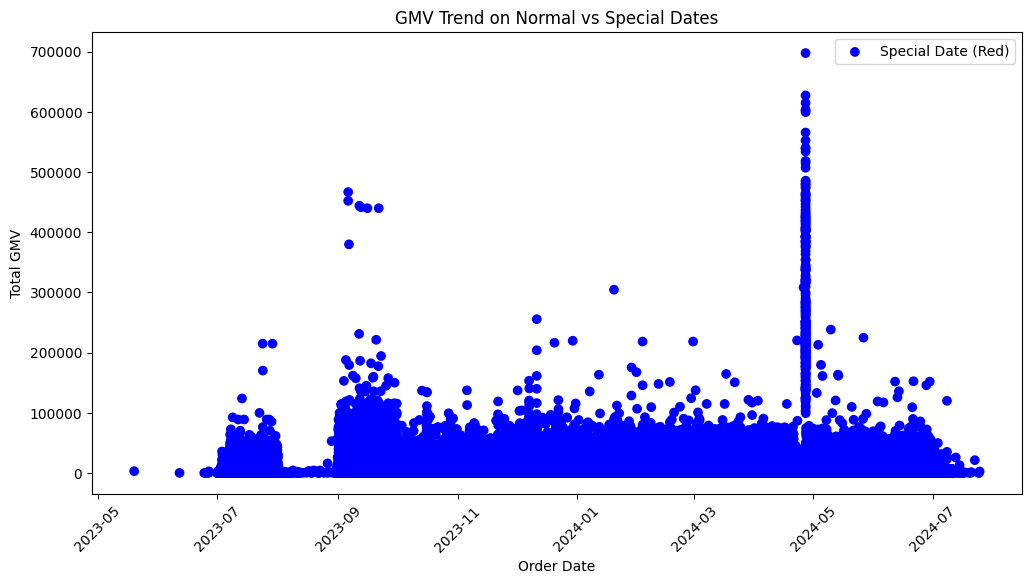

Empty DataFrame
Columns: [order_date, gmv, gmv_lag_7, gmv_change]
Index: []


In [74]:
print(df['is_special_date'].value_counts())  # Check distribution

special_date_gmv = df.loc[df['is_special_date'] == 1, 'gmv'].sum()
normal_date_gmv = df.loc[df['is_special_date'] == 0, 'gmv'].sum()

if normal_date_gmv == 0:
    print("No GMV recorded on normal days, cannot compute ratio.")
elif special_date_gmv == 0:
    print("No GMV recorded on special dates, special event impact is zero.")
else:
    special_date_impact = special_date_gmv / normal_date_gmv
    print(f"Special Date GMV Ratio: {special_date_impact:.2f}x")


import matplotlib.pyplot as plt

# Aggregate GMV by Date
gmv_by_date = df.groupby('order_date')['gmv'].sum().reset_index()

# Mark Special & Normal Days
gmv_by_date['is_special_date'] = gmv_by_date['order_date'].isin(df.loc[df['is_special_date'] == 1, 'order_date'])

# Plot Special vs Normal Day Sales
plt.figure(figsize=(12, 6))
plt.scatter(gmv_by_date['order_date'], gmv_by_date['gmv'], c=gmv_by_date['is_special_date'].map({True: 'red', False: 'blue'}))
plt.xlabel("Order Date")
plt.ylabel("Total GMV")
plt.title("GMV Trend on Normal vs Special Dates")
plt.legend(["Special Date (Red)", "Normal Date (Blue)"])
plt.xticks(rotation=45)
plt.show()


df['order_date'] = pd.to_datetime(df['order_date'])  # Ensure datetime format
df = df.sort_values('order_date')

df['gmv_lag_7'] = df['gmv'].shift(7)  # GMV exactly one week before

# Compare only for special dates
df_special = df[df['is_special_date'] == 1].copy()
df_special['gmv_change'] = ((df_special['gmv'] - df_special['gmv_lag_7']) / df_special['gmv_lag_7']) * 100

print(df_special[['order_date', 'gmv', 'gmv_lag_7', 'gmv_change']])

## Holiday Order Analysis

This cell creates a DataFrame of Canadian holidays, converts date columns to datetime, creates a 'is_holiday' column in the main DataFrame, and counts the number of orders placed on holidays.

In [75]:
holidays_df = pd.DataFrame({
    'Occasion': ["Canada Day", "Civic Holiday", "Labour Day", "Thanksgiving", "Halloween",
                 "Remembrance Day", "Christmas Day", "Boxing Day", "New Year's Day",
                 "Islander Day", "Louis Riel Day", "Heritage Day", "Family Day",
                 "Valentine's Day", "Leap Day"],
    'Day': ["July 1, 2023", "August 3, 2023", "September 7, 2023", "October 12, 2023", "October 31, 2023",
            "November 11, 2023", "December 25, 2023", "December 26, 2023", "January 1, 2024",
            "February 15, 2024", "February 15, 2024", "February 15, 2024", "February 15, 2024",
            "February 14, 2024", "February 29, 2024"]
})

# Convert holiday 'Day' column to datetime and extract only date (removing time)
holidays_df['holiday_date'] = pd.to_datetime(holidays_df['Day']).dt.date

# Convert 'order_date' in df to datetime (if not already done)
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract only the date part from 'order_date' (remove time)
df['order_date_only'] = df['order_date'].dt.date

# Create 'is_holiday' column (1 if order_date_only is in holiday list, else 0)
df['is_holiday'] = df['order_date_only'].isin(holidays_df['holiday_date']).astype(int)

# Drop the intermediate 'order_date_only' column (optional)
df.drop(columns=['order_date_only'], inplace=True)

# Verify results
print(df[['order_date', 'is_holiday']].head(10))
print("Number of orders placed on holidays:", df['is_holiday'].sum())

                 order_date  is_holiday
1376093 2023-05-19 13:42:09           0
1436634 2023-06-11 18:21:50           0
1398258 2023-06-24 10:20:16           0
1385002 2023-06-25 16:28:12           0
1358453 2023-06-26 17:02:01           0
1429828 2023-06-26 17:27:12           0
1402659 2023-06-26 17:33:10           0
1412205 2023-07-01 00:36:11           1
1430199 2023-07-01 00:38:19           1
1391518 2023-07-01 03:35:02           1
Number of orders placed on holidays: 45449


## COD vs. Prepaid GMV Comparison

This cell calculates and prints the total GMV for COD and Prepaid orders, and then computes and prints the ratio of COD GMV to Prepaid GMV.

In [76]:
total_gmv_cod = df[df['COD'] == 1]['gmv'].sum()
print(f"Total GMV for COD orders: {total_gmv_cod}")

total_gmv_Prepaid = df[df['Prepaid'] == 1]['gmv'].sum()
print(f"Total GMV for Prepaid orders: {total_gmv_cod}")
total_gmv_cod/total_gmv_Prepaid

Total GMV for COD orders: 2369554785
Total GMV for Prepaid orders: 2369554785


np.float64(1.4135322014551348)

## Merge and Analyze Product Details

This cell merges product category, sub-category, and product name information from `SKU_details` into the main DataFrame (`df`) based on `fsn_id`. It then counts and displays the unique values and value counts for the 'Category' and 'Sub_Category' columns.

In [77]:
product_details = SKU_details
product_details = product_details[['fsn_id', 'product_analytic_category']]
df = df.merge(product_details, on="fsn_id", how="left")
df.rename(columns={"product_analytic_category": "Category"}, inplace=True)
product_details = SKU_details
product_details = product_details[['fsn_id', 'product_analytic_sub_category']]
df = df.merge(product_details, on="fsn_id", how="left")
df.rename(columns={"product_analytic_sub_category": "Sub_Category"}, inplace=True)
product_details = SKU_details  # Reload the original product_details DataFrame
product_details = product_details[['fsn_id', 'product_analytic_vertical']]
df = df.merge(product_details, on="fsn_id", how="left")
df.rename(columns={"product_analytic_vertical": "product"}, inplace=True)
df['Category'].nunique()
df['Sub_Category'].nunique()
df['Category'].value_counts()
df['Sub_Category'].value_counts()


Sub_Category
Speaker                543928
CameraAccessory        239508
GamingAccessory        201899
TVVideoSmall           142995
HomeAudio              124860
Game                   114406
AudioMP3Player         112892
Camera                 101172
GamingConsole           29059
CameraStorage           17985
AudioAccessory          11713
HomeTheatre              4254
AmplifierReceiver        4056
GameMembershipCards        97
Name: count, dtype: int64

## Calculate GMV by Product Categories

This cell calculates and displays the total GMV for each product Category, Sub_Category, and product.

In [78]:
# Group by Category and sum the GMV
category_wise_gmv = df.groupby("Category")["gmv"].sum().reset_index()
# Rename for clarity
category_wise_gmv.rename(columns={"gmv": "total_gmv"}, inplace=True)
# Display the results
print(category_wise_gmv)
# Group by Category and sum the GMV
sub_category_wise_gmv = df.groupby("Sub_Category")["gmv"].sum().reset_index()
# Rename for clarity
sub_category_wise_gmv.rename(columns={"gmv": "total_gmv"}, inplace=True)
# Display the results
print(sub_category_wise_gmv)
# Group by Category and sum the GMV
product_wise_gmv = df.groupby("product")["gmv"].sum().reset_index()
# Rename for clarity
product_wise_gmv.rename(columns={"gmv": "total_gmv"}, inplace=True)
# Display the results
print(product_wise_gmv)

             Category   total_gmv
0              Camera  1780718983
1     CameraAccessory   303562521
2  EntertainmentSmall  1293196036
3           GameCDDVD   213747898
4      GamingHardware   454665254
           Sub_Category   total_gmv
0     AmplifierReceiver     7427503
1        AudioAccessory    17665425
2        AudioMP3Player   142705690
3                Camera  1780718983
4       CameraAccessory   286582190
5         CameraStorage    16980331
6                  Game   213703079
7   GameMembershipCards       44819
8       GamingAccessory   171224191
9         GamingConsole   283441063
10            HomeAudio   267372939
11          HomeTheatre    23678964
12              Speaker   641916280
13         TVVideoSmall   192429235
              product  total_gmv
0   AmplifierReceiver    7427503
1      AudioMP3Player  142705690
2          Binoculars   29782478
3             BoomBox    9150669
4          Camcorders   20607874
..                ...        ...
69          Telescope    

## Category-wise GMV Distribution Pie Chart

This cell generates a pie chart to visualize the distribution of total GMV across different categories.

1.  **Create Pie Chart:** Creates a pie chart using the `category_wise_gmv` DataFrame.  The size of each slice represents the 'total\_gmv' for that category.
2.  **Labels and Formatting:** Labels each slice with the category name, displays the percentage of total GMV for each slice (formatted to one decimal place), and sets the starting angle of the first slice.
3.  **Title:** Sets the title of the pie chart.
4.  **Display Plot:** Shows the generated pie chart.


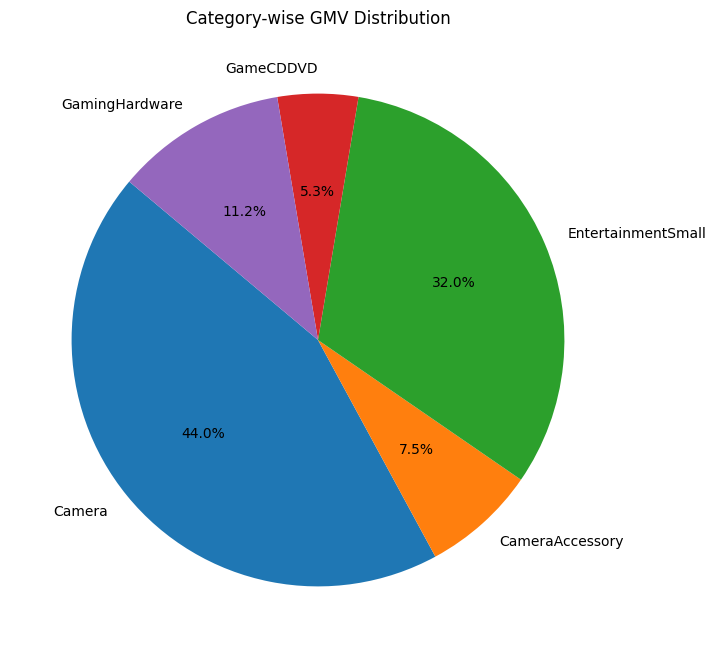

In [79]:

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_wise_gmv["total_gmv"], labels=category_wise_gmv["Category"], autopct='%1.1f%%', startangle=140)

# Title and display
plt.title("Category-wise GMV Distribution")
plt.show()

## Sub-Category-wise GMV Distribution Pie Chart

This cell generates a pie chart visualizing the distribution of total GMV across different sub-categories.


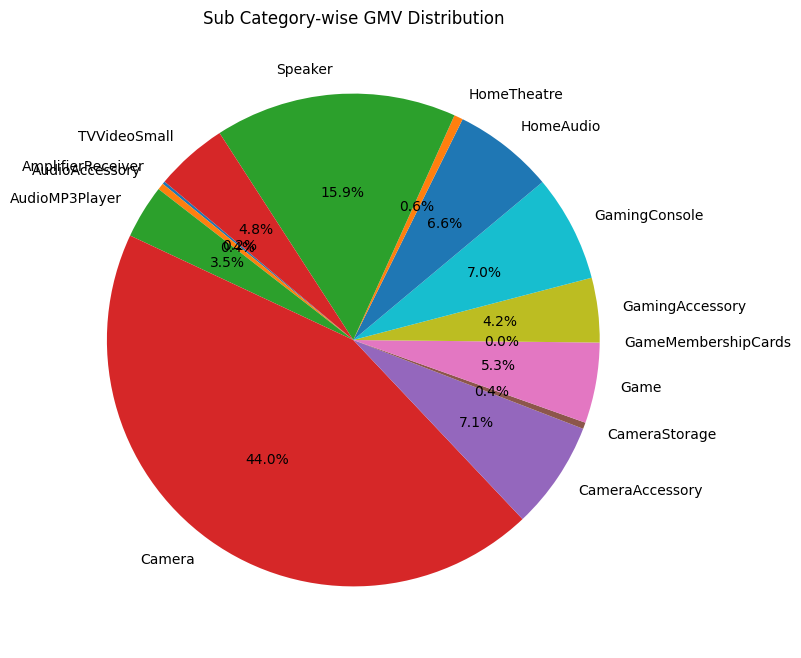

In [80]:

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sub_category_wise_gmv["total_gmv"], labels=sub_category_wise_gmv["Sub_Category"], autopct='%1.1f%%', startangle=140)

# Title and display
plt.title("Sub Category-wise GMV Distribution")
plt.show()

## Product-wise GMV Distribution

This cell generates a pie chart to visualize the distribution of total GMV across different products.


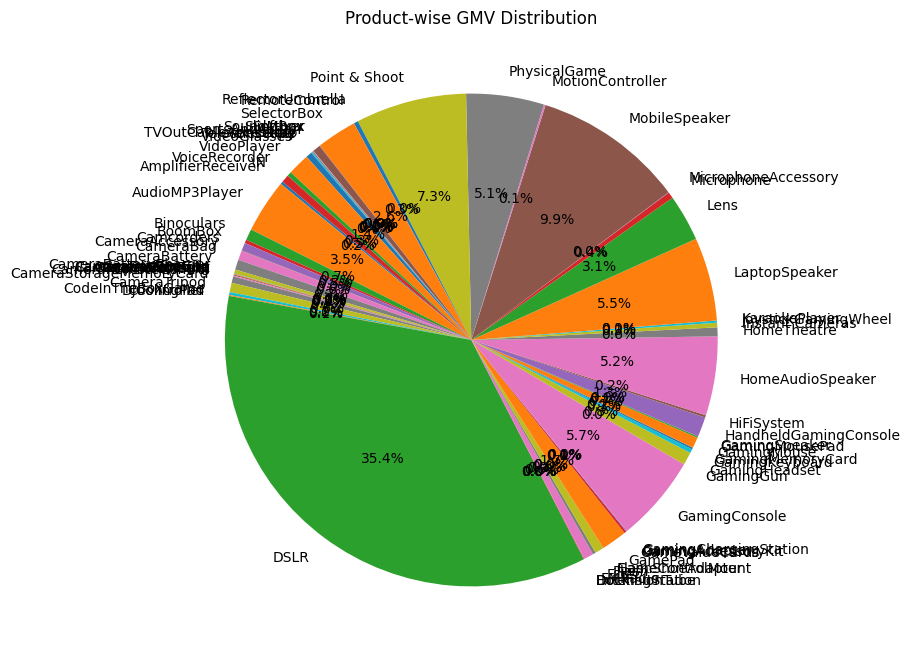

In [81]:
plt.figure(figsize=(8, 8))
plt.pie(product_wise_gmv["total_gmv"], labels=product_wise_gmv["product"], autopct='%1.1f%%', startangle=140)

# Title and display
plt.title("Product-wise GMV Distribution")
plt.show()

## Product-wise GMV Distribution (Grouped)

This cell performs the following operations:

1.  **Calculate total GMV:** Computes the sum of 'total_gmv' from the `product_wise_gmv` DataFrame.
2.  **Identify low-contribution products:** Calculates the percentage contribution of each product to the total GMV and filters out products contributing less than 1%.
3.  **Sum low-contribution GMV:** Sums the 'total_gmv' of the filtered-out products.
4.  **Filter high-contribution products:** Filters the original DataFrame to keep only products contributing 1% or more.
5.  **Group low-contribution products:** Appends a new row to the filtered DataFrame, representing the combined GMV of the low-contribution products as "Less".
6.  **Plot grouped pie chart:** Generates a pie chart to visualize the distribution of GMV, including the "Less" category, with percentage labels and a title.


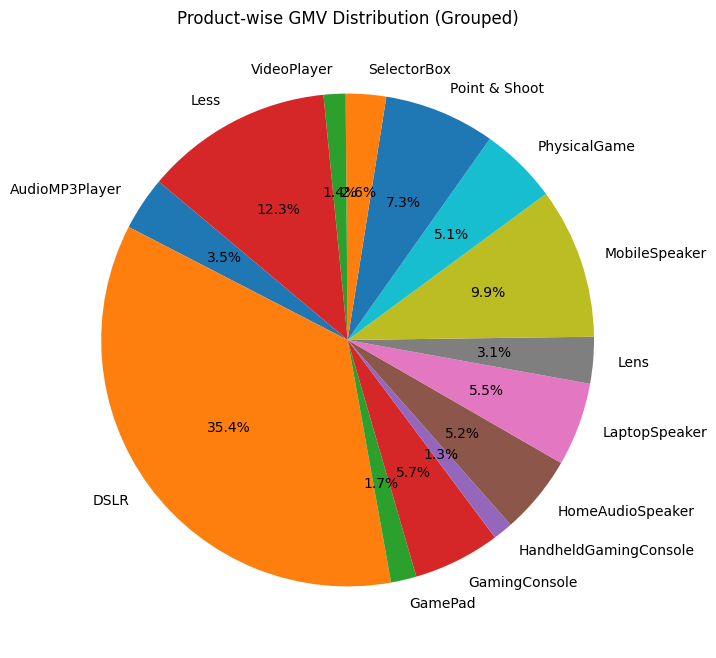

In [82]:
# Calculate total GMV
total_gmv_sum = product_wise_gmv["total_gmv"].sum()

# Identify products with less than 1% contribution
product_wise_gmv["percentage"] = (product_wise_gmv["total_gmv"] / total_gmv_sum) * 100
less_than_1 = product_wise_gmv[product_wise_gmv["percentage"] < 1]

# Sum up the GMV of products contributing less than 1%
less_gmv_sum = less_than_1["total_gmv"].sum()

# Filter products contributing >= 1%
filtered_df = product_wise_gmv[product_wise_gmv["percentage"] >= 1].copy()

# Append "Less" category
if less_gmv_sum > 0:
    new_row = pd.DataFrame({"product": ["Less"], "total_gmv": [less_gmv_sum]})
    filtered_df = pd.concat([filtered_df, new_row], ignore_index=True)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_df["total_gmv"], labels=filtered_df["product"], autopct='%1.1f%%', startangle=140)

# Title and display
plt.title("Product-wise GMV Distribution (Grouped)")
plt.show()


## Holiday vs. Non-Holiday Revenue Analysis

This cell analyzes revenue differences between holiday and non-holiday periods:

1.  **Holiday Period Definition:** Defines holiday periods including the day before and after each holiday from the `Holidays` DataFrame.
2.  **Data Split:** Splits the main DataFrame (`df`) into `holiday_sales` and `non_holiday_sales` based on these periods.
3.  **Revenue Distribution Plot:** Generates a histogram comparing the revenue distributions for both periods, including descriptive statistics.
4.  **Statistical Tests:** Performs a t-test to compare the mean revenue between holiday and non-holiday periods and prints summary statistics for each period.

c:\Users\ajsal\anaconda3\envs\gcenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


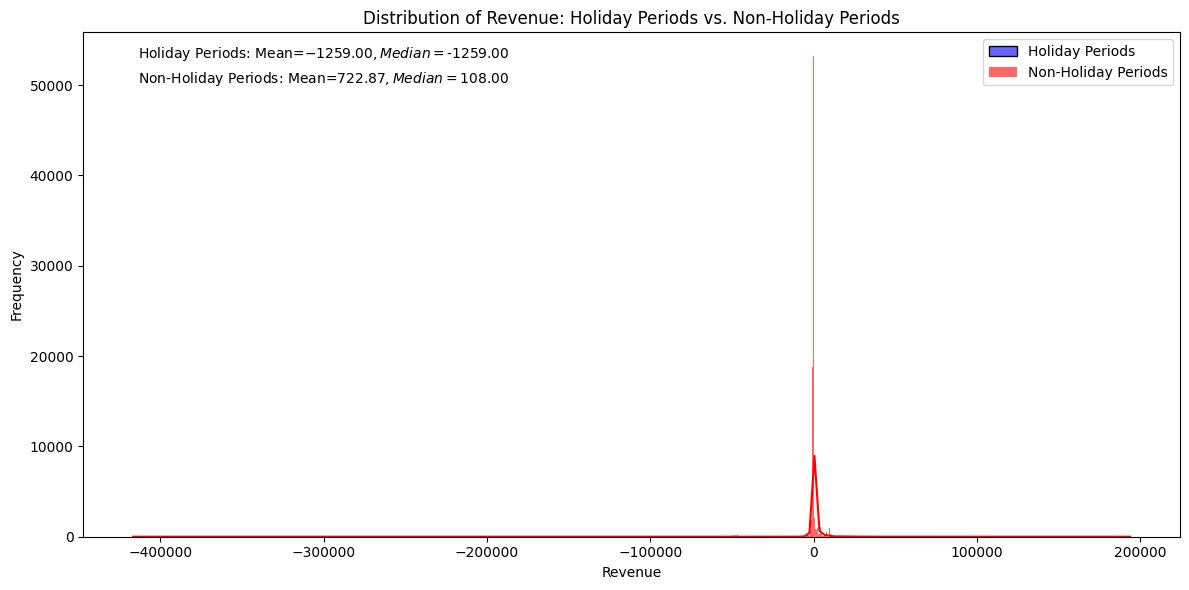

T-test results: t-statistic=nan, p-value=nan

Holiday Periods Statistics:
count       1.0
mean    -1259.0
std         NaN
min     -1259.0
25%     -1259.0
50%     -1259.0
75%     -1259.0
max     -1259.0
Name: revenue, dtype: float64

Non-Holiday Periods Statistics:
count    1.648441e+06
mean     7.228729e+02
std      4.821780e+03
min     -4.167060e+05
25%     -3.010000e+02
50%      1.080000e+02
75%      7.790000e+02
max      1.938990e+05
Name: revenue, dtype: float64


In [83]:

df_sales = df

# Convert date column to datetime format if it's not already
# df_sales['date'] = pd.to_datetime(df_sales['date'])

# Load the holiday data from the Excel file
holidays_df = Holidays
holidays_df['Day'] = pd.to_datetime(holidays_df['Day'])

# Create a set of holiday dates including day before and day after
holiday_periods = set()
for holiday_date in holidays_df['Day']:
    holiday_periods.add(holiday_date)
    holiday_periods.add(holiday_date - timedelta(days=1))  # Day before
    holiday_periods.add(holiday_date + timedelta(days=1))  # Day after

# Convert to list for easier filtering
holiday_periods = list(holiday_periods)

# Create two separate dataframes for holiday periods and non-holiday periods
holiday_sales = df_sales[df_sales['order_date'].isin(holiday_periods)]
non_holiday_sales = df_sales[~df_sales['order_date'].isin(holiday_periods)]

# Plot the distributions
plt.figure(figsize=(12, 6))

# Plot the distributions using seaborn for better visualization
sns.histplot(holiday_sales['revenue'], kde=True, color='blue', alpha=0.6, label='Holiday Periods')
sns.histplot(non_holiday_sales['revenue'], kde=True, color='red', alpha=0.6, label='Non-Holiday Periods')

plt.title('Distribution of Revenue: Holiday Periods vs. Non-Holiday Periods')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.legend()

# Add some descriptive statistics as text
holiday_stats = f"Holiday Periods: Mean=${holiday_sales['revenue'].mean():.2f}, Median=${holiday_sales['revenue'].median():.2f}"
non_holiday_stats = f"Non-Holiday Periods: Mean=${non_holiday_sales['revenue'].mean():.2f}, Median=${non_holiday_sales['revenue'].median():.2f}"

plt.annotate(holiday_stats, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10)
plt.annotate(non_holiday_stats, xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10)
plt.tight_layout()
plt.show()

# You can also perform statistical tests to compare the distributions

# Perform t-test to compare means
t_stat, p_value = stats.ttest_ind(holiday_sales['revenue'], non_holiday_sales['revenue'], equal_var=False)
print(f"T-test results: t-statistic={t_stat:.4f}, p-value={p_value:.4f}")

# If you want to see the summary statistics
print("\nHoliday Periods Statistics:")
print(holiday_sales['revenue'].describe())

print("\nNon-Holiday Periods Statistics:")
print(non_holiday_sales['revenue'].describe())

## Scatter Plots: Features vs. GMV

This cell generates scatter plots to visualize the relationship between various features and GMV. It iterates through specified columns, creating a scatter plot of each against 'gmv'. KeyErrors are handled to skip any missing columns.

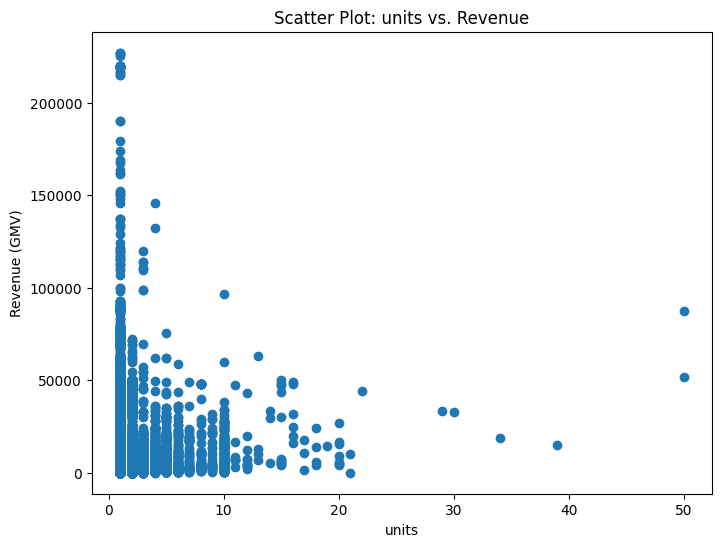

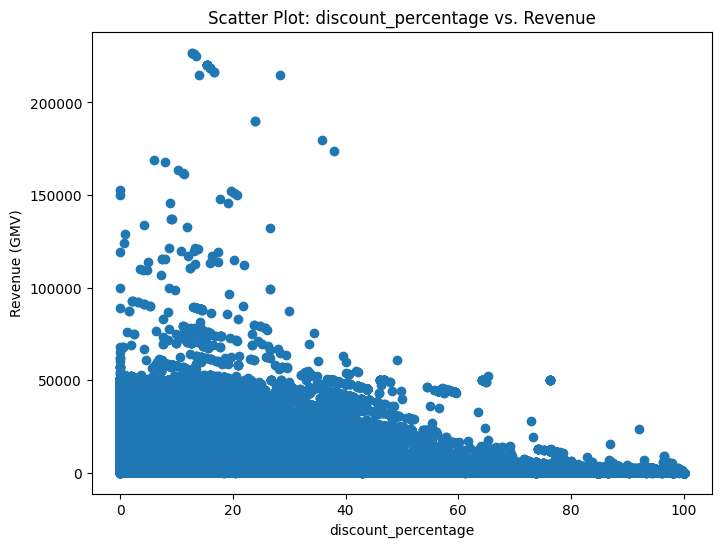

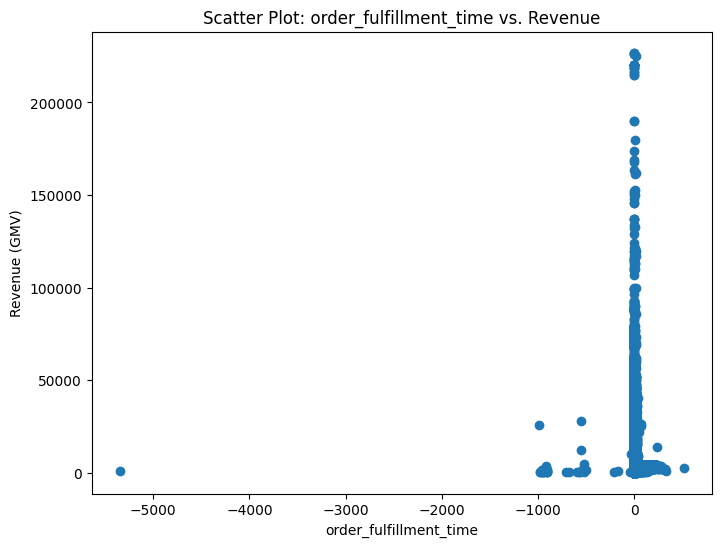

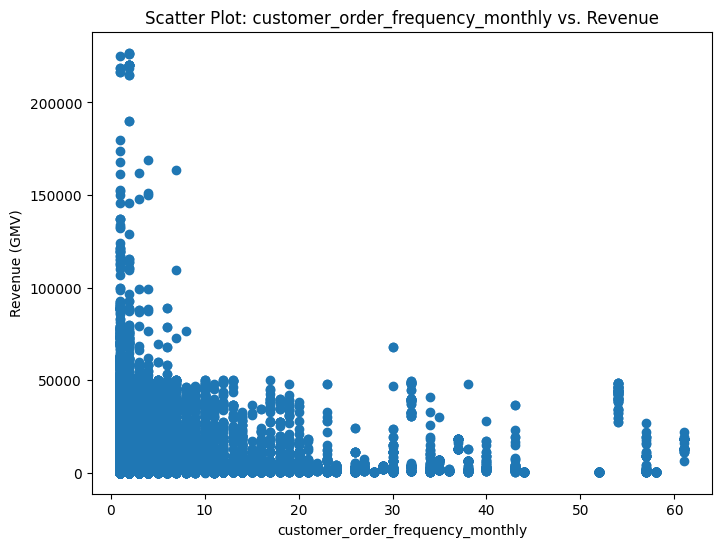

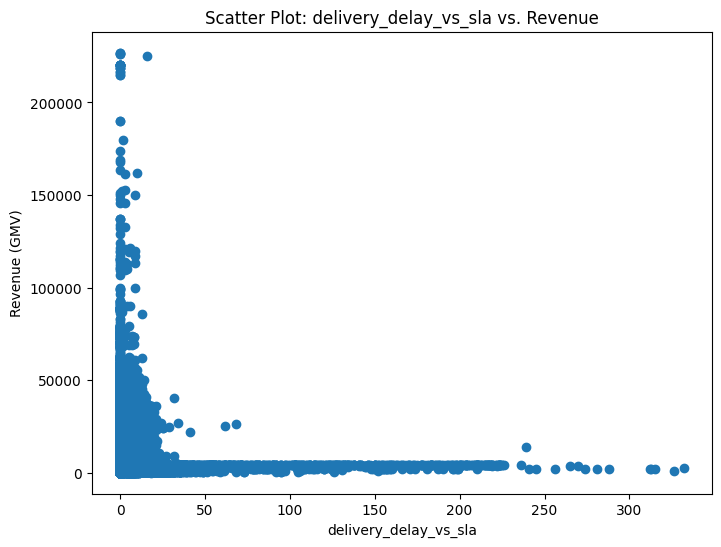

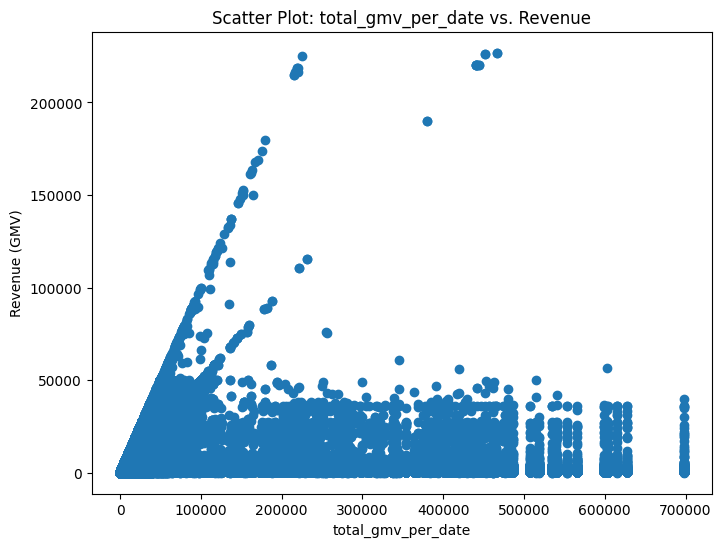

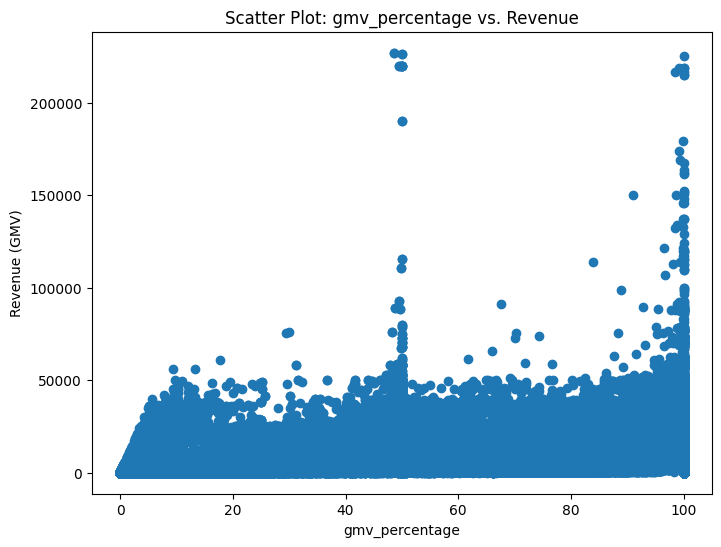

Column ''elapsed_time_minutes'' not found in DataFrame. Skipping...


<Figure size 800x600 with 0 Axes>

In [84]:
df['order_date'] = pd.to_datetime(df['order_date'])

# Generate scatterplots of different columns with revenue
for column in ['units', 'discount_percentage', 'order_fulfillment_time',
               'customer_order_frequency_monthly', 'delivery_delay_vs_sla',
                'total_gmv_per_date', 'gmv_percentage',
               'elapsed_time_minutes']:  # Add more columns as needed
  try:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], df['gmv'])
    plt.xlabel(column)
    plt.ylabel('Revenue (GMV)')
    plt.title(f'Scatter Plot: {column} vs. Revenue')
    plt.show()
  except KeyError as e:
    print(f"Column '{e}' not found in DataFrame. Skipping...")
# 'order_month' is causing some problem so removed

In [85]:
# df = df.drop('gmv_category', axis=1)
df['is_weekend'] = df['is_weekend'].astype(int)
df['is_special_date'] = df['is_special_date'].astype(int)
df = df.rename(columns={'sales_mark': 'is_sale'})

In [86]:
df_media

0           Year Month Total Investment        TV   Digital Sponsorship  \
month_year                                                                
2023-07     2023     7        17.061775   0.21533  2.533014     7.41427   
2023-08     2023     8         5.064306  0.006438  1.278074    1.063332   
2023-09     2023     9         96.25438  3.879504  1.356528   62.787651   
2023-10     2023    10       170.156297  6.144711  12.62248   84.672532   
2023-11     2023    11         51.21622   4.22063  1.275469   14.172116   
2023-12     2023    12       106.745312  5.397502   3.06336   56.705419   
2024-01     2024     1           74.196      4.38     0.456         4.2   
2024-02     2024     2           48.052  2.586008  1.912651   11.725555   
2024-03     2024     3       100.024621       9.3       2.1       41.59   
2024-04     2024     4        56.848241  5.205196  0.871892   24.308354   
2024-05     2024     5           78.057      1.37      0.77       31.68   
2024-06     2024     6        42.834216  1.662717  1.420761   25.048541   

0          Content Marketing Online marketing  Affiliates        SEM Radio  \
month_year                                                                   
2023-07             0.000933         1.327278    0.547254   5.023697     0   
2023-08             0.000006         0.129244    0.073684   2.513528     0   
2023-09             0.610292         16.37999    5.038266   6.202149     0   
2023-10             3.444075        24.371778    6.973711  31.927011     0   
2023-11             0.168633        19.561574    6.595767   5.222032     0   
2023-12             1.067307        22.503756    6.826938   11.18103     0   
2024-01                  0.9             22.9        7.37        4.2   2.7   
2024-02             0.596771        19.892366    6.465019    4.87363     0   
2024-03                 0.37        18.437818    6.217667   5.193591  0.87   
2024-04             0.034876         16.51451    5.693456   4.219958     0   
2024-05                 0.79            23.65         6.8       6.91   1.1   
2024-06             0.045081           7.9713    2.768023   3.735516     0   

0               Other  
month_year             
2023-07             0  
2023-08             0  
2023-09             0  
2023-10             0  
2023-11             0  
2023-12             0  
2024-01         27.09  
2024-02             0  
2024-03     15.945545  
2024-04             0  
2024-05         4.987  
2024-06             0

In [87]:
# nps_preprocessed_df = pd.read_excel('/content/drive/MyDrive/GC2025/NPS_stocks.xlsx')
nps_preprocessed_df=nps_scores.copy()
nps_preprocessed_df.head()
preprocessed_df = preprocessed_data.copy()
preprocessed_df.head()
media_data = df_media.copy()

## Key Performance Indicators (KPIs)

This cell calculates and displays various KPIs related to revenue, sales, customer engagement, operational efficiency, seasonal impact, and discount strategies.

In [ ]:
preprocessed_df = preprocessed_df.drop('gmv_category', axis=1)

preprocessed_df['is_weekend'] = preprocessed_df['is_weekend'].astype(int)
preprocessed_df['is_special_date'] = preprocessed_df['is_special_date'].astype(int)

preprocessed_df = preprocessed_df.rename(columns={'sales_mark': 'is_sale'})

# Revenue and Sales KPIs
total_gmv = preprocessed_df['gmv'].sum()
total_units = preprocessed_df['units'].sum()
total_orders = preprocessed_df['order_id'].nunique()
average_order_value = total_gmv / total_orders

# Customer and Engagement KPIs
first_orders = preprocessed_df[preprocessed_df['first_order_flag'] == 1].shape[0]
repeat_orders = total_orders - first_orders
first_order_rate = first_orders / total_orders
repeat_order_rate = repeat_orders / total_orders

# Operational and Fulfillment KPIs
delivery_timeliness = (preprocessed_df['deliverybdays'] <= preprocessed_df['sla']).mean() * 100
order_fulfillment_efficiency = (preprocessed_df['deliverybdays'] - preprocessed_df['sla']).mean()

# Seasonal and Promotional Impact
weekend_sales = preprocessed_df[preprocessed_df['is_weekend'] == 1]['gmv'].sum()
special_date_sales = preprocessed_df[preprocessed_df['is_special_date'] == 1]['gmv'].sum()

# Discount and Sales Strategy
if 'is_sale' in preprocessed_df.columns:
    discount_rate = preprocessed_df[preprocessed_df['is_sale'] == 1].shape[0] / total_orders
else:
    discount_rate = "Not Applicable"

# Display KPIs
print(f"Total GMV: {total_gmv}")
print(f"Total Units Sold: {total_units}")
print(f"Average Order Value: {average_order_value}")
print(f"First Order Rate: {first_order_rate}")
print(f"Repeat Order Rate: {repeat_order_rate}")
print(f"Delivery Timeliness: {delivery_timeliness}%")
print(f"Order Fulfillment Efficiency: {order_fulfillment_efficiency} days")
print(f"Weekend Sales: {weekend_sales}")
print(f"Special Date Sales: {special_date_sales}")
print(f"Discount Rate: {discount_rate}")

Total GMV: 4045890692
Total Units Sold: 1685242
Average Order Value: 2695.145670363988
First Order Rate: 0.8426787780521551
Repeat Order Rate: 0.15732122194784492
Delivery Timeliness: 95.56489958904044%
Order Fulfillment Efficiency: -4.755869031503666 days
Weekend Sales: 1255236102
Special Date Sales: 0
Discount Rate: 0.14796189922973774


## Monthly KPI Analysis

This cell calculates and displays monthly KPIs:

1.  **Group by Month:** Groups the DataFrame by 'order_month'.
2.  **Calculate KPIs:** Calculates total GMV, units, orders, first orders, weekend sales, and discount rate for each month.
3.  **Compute Additional KPIs:** Calculates average order value, repeat orders, first order rate, and repeat order rate.
4.  **Display Results:** Shows the resulting DataFrame with monthly KPIs.

In [93]:
nps_preprocessed_df['order_month'] = pd.to_datetime(nps_preprocessed_df[['Year', 'Month']].assign(day=1)).dt.to_period('M')
nps_preprocessed_df = nps_preprocessed_df[['order_month', 'NPS']]

# Convert date columns to datetime and create period columns
preprocessed_df['order_date'] = pd.to_datetime(preprocessed_df['order_date'])
preprocessed_df['order_month'] = preprocessed_df['order_date'].dt.to_period('M')
preprocessed_df['order_week'] = preprocessed_df['order_date'].dt.to_period('W')

# Flag repeat customers
customer_order_counts = preprocessed_df.groupby('cust_id')['order_id'].nunique()
repeat_customers = customer_order_counts[customer_order_counts > 1].index
preprocessed_df['is_repeat_customer'] = preprocessed_df['cust_id'].isin(repeat_customers)

# Monthly KPIs aggregation
monthly_kpis = preprocessed_df.groupby('order_month').agg(
    total_gmv=('gmv', 'sum'),
    total_units=('units', 'sum'),
    total_orders=('order_id', 'nunique'),
    first_orders=('first_order_flag', 'sum'),
    weekend_sales=('gmv', lambda x: x[preprocessed_df.loc[x.index, 'is_weekend'] == 1].sum()),
    discount_rate=('is_sale', 'mean'),
    total_unique_customers=('cust_id', 'nunique')
).reset_index()

# Trim the first 2 rows and the last row
monthly_kpis = monthly_kpis.iloc[2:-1].reset_index(drop=True)
monthly_kpis

order_month  total_gmv  total_units  total_orders  first_orders  \
0      2023-07  174206832        90938         87534         78421   
1      2023-08     416096          275           155           110   
2      2023-09  421760671       214008        100804         90347   
3      2023-10  502727831       211939        202216        173621   
4      2023-11  331386937       133345        127268        103052   
5      2023-12  435820199       163021        154008        139345   
6      2024-01  387192999       146899        140510        120751   
7      2024-02  331567025       146990        141135        117651   
8      2024-03  404003023       156527        148790        120127   
9      2024-04  339703548       136820        127863        100402   
10     2024-05  409453151       159674        153356        121202   
11     2024-06  305913306       124184        118952         99536   

    weekend_sales  discount_rate  total_unique_customers  
0        55584982       0.036828                   78421  
1           27884       0.044280                     154  
2       122120651       0.000000                   92532  
3       114712755       0.351026                  181677  
4        65656320       0.314386                  114204  
5       135338566       0.194200                  141925  
6       138721021       0.175755                  126014  
7        92652917       0.097311                  126708  
8       133524017       0.113725                  132844  
9       155278108       0.000000                  114587  
10      142590393       0.112694                  137525  
11       98889334       0.000000                  109884

## Additional Metrics Calculation

This cell calculates several additional metrics:

1.  **Average Order Value (AOV):** Calculates AOV by dividing total GMV by the number of orders.
2.  **Repeat Order Metrics:** Calculates the number of repeat orders, repeat customers, first-order rate, repeat order rate, and customer retention rate.
3.  **Churn Rate Calculation:**
    * Defines a function `calculate_churn` to compute the churn rate with a 1-month lookback period.
    * Calculates and stores monthly churn rates in `churn_rates`.
    * Merges the churn rates into the `monthly_kpis` DataFrame.
4.  **Merge NPS Scores:** Merges NPS scores from an external dataset (`nps_preprocessed_df`) into `monthly_kpis`.
5.  **Warehouse Efficiency:**
    * Calculates warehouse efficiency (average delivery days) and merges it into `monthly_kpis`.
    * Handles the case where 'deliverybdays' and 'deliverycdays' columns are missing.
6.  **Risk Indicator Calculation:**
    * Defines risk thresholds for churn rate, NPS score, and delivery efficiency.
    * Calculates binary risk indicators based on these thresholds.
    * Computes a total risk score for each month.
7.  **Revenue Growth Metrics:**
    * Calculates the month-over-month growth percentage for GMV and AOV.
8.  **KPI Summary Report:**
    * Defines a function `create_latest_summary` to generate a summary of the latest month's KPIs.
    * Creates and prints a formatted KPI dashboard summary.
9.  **Display DataFrame:** Displays the first few rows of the updated `monthly_kpis` DataFrame.


In [99]:
media_data

0           Year Month Total Investment        TV   Digital Sponsorship  \
month_year                                                                
2023-07     2023     7        17.061775   0.21533  2.533014     7.41427   
2023-08     2023     8         5.064306  0.006438  1.278074    1.063332   
2023-09     2023     9         96.25438  3.879504  1.356528   62.787651   
2023-10     2023    10       170.156297  6.144711  12.62248   84.672532   
2023-11     2023    11         51.21622   4.22063  1.275469   14.172116   
2023-12     2023    12       106.745312  5.397502   3.06336   56.705419   
2024-01     2024     1           74.196      4.38     0.456         4.2   
2024-02     2024     2           48.052  2.586008  1.912651   11.725555   
2024-03     2024     3       100.024621       9.3       2.1       41.59   
2024-04     2024     4        56.848241  5.205196  0.871892   24.308354   
2024-05     2024     5           78.057      1.37      0.77       31.68   
2024-06     2024     6        42.834216  1.662717  1.420761   25.048541   

0          Content Marketing Online marketing  Affiliates        SEM Radio  \
month_year                                                                   
2023-07             0.000933         1.327278    0.547254   5.023697     0   
2023-08             0.000006         0.129244    0.073684   2.513528     0   
2023-09             0.610292         16.37999    5.038266   6.202149     0   
2023-10             3.444075        24.371778    6.973711  31.927011     0   
2023-11             0.168633        19.561574    6.595767   5.222032     0   
2023-12             1.067307        22.503756    6.826938   11.18103     0   
2024-01                  0.9             22.9        7.37        4.2   2.7   
2024-02             0.596771        19.892366    6.465019    4.87363     0   
2024-03                 0.37        18.437818    6.217667   5.193591  0.87   
2024-04             0.034876         16.51451    5.693456   4.219958     0   
2024-05                 0.79            23.65         6.8       6.91   1.1   
2024-06             0.045081           7.9713    2.768023   3.735516     0   

0               Other  
month_year             
2023-07             0  
2023-08             0  
2023-09             0  
2023-10             0  
2023-11             0  
2023-12             0  
2024-01         27.09  
2024-02             0  
2024-03     15.945545  
2024-04             0  
2024-05         4.987  
2024-06             0

In [102]:
nps_scores

Year  Month        NPS  MonthYear
0   2023      7  54.599588 2023-07-01
1   2023      8  59.987101 2023-08-01
2   2023      9  46.925419 2023-09-01
3   2023     10  44.398389 2023-10-01
4   2023     11  47.000000 2023-11-01
5   2023     12  45.800000 2023-12-01
6   2024      1  47.093031 2024-01-01
7   2024      2  50.327406 2024-02-01
8   2024      3  49.020550 2024-03-01
9   2024      4  51.827605 2024-04-01
10  2024      5  47.306951 2024-05-01
11  2024      6  50.516687 2024-06-01

In [135]:
current_month_start

NameError: name 'current_month_start' is not defined

In [136]:
# Additional metrics calculation
monthly_kpis['average_order_value'] = monthly_kpis['total_gmv'] / monthly_kpis['total_orders']
monthly_kpis['repeat_orders'] = monthly_kpis['total_orders'] - monthly_kpis['first_orders']
monthly_kpis['repeat_customers'] = monthly_kpis['total_unique_customers'] - monthly_kpis['first_orders']
monthly_kpis['first_order_rate'] = monthly_kpis['first_orders'] / monthly_kpis['total_orders']
monthly_kpis['repeat_order_rate'] = monthly_kpis['repeat_orders'] / monthly_kpis['total_orders']
monthly_kpis['customer_retention_rate'] = (
    monthly_kpis['repeat_customers'] / monthly_kpis['total_unique_customers']
) * 100

# Churn Calculation function (1-month lookback)
# def calculate_churn(current_month, months_lookback=1):
#     current_month_start = pd.Period(current_month, freq='M').start_time
#     lookback_start = (pd.Period(current_month, freq='M') - months_lookback).start_time

#     customers_in_lookback = preprocessed_df[
#         (preprocessed_df['order_date'] >= lookback_start)
#         & (preprocessed_df['order_date'] < current_month_start)
#     ]['cust_id'].unique()
    
#     customers_in_current = preprocessed_df[
#         preprocessed_df['order_month'] == current_month
#     ]['cust_id'].unique()

#     churned_customers = np.setdiff1d(customers_in_lookback, customers_in_current)
#     churn_rate = (
#         len(churned_customers) / len(customers_in_lookback) * 100
#         if len(customers_in_lookback) > 0 else np.nan
#     )
#     return churn_rate
# Churn Calculation function (1-month lookback)
def calculate_churn(current_month, months_lookback=1):
    current_month_start = pd.Period(current_month, freq='M').start_time
    lookback_start = (pd.Period(current_month, freq='M') - months_lookback).start_time

    customers_in_lookback = preprocessed_df[
        (preprocessed_df['order_date'] >= lookback_start)
        & (preprocessed_df['order_date'] < current_month_start)
    ]['cust_id'].unique()
    
    customers_in_current = preprocessed_df[
        preprocessed_df['order_month'] == current_month
    ]['cust_id'].unique()

    # Convert both arrays to the same data type (strings) before comparison
    customers_in_lookback = np.array([str(x) for x in customers_in_lookback])
    customers_in_current = np.array([str(x) for x in customers_in_current])
    
    churned_customers = np.setdiff1d(customers_in_lookback, customers_in_current)
    churn_rate = (
        len(churned_customers) / len(customers_in_lookback) * 100
        if len(customers_in_lookback) > 0 else np.nan
    )
    return churn_rate

# Apply churn calculation
X_months = 1
churn_rates = []
months_sorted = sorted(monthly_kpis['order_month'])

# for idx, month in enumerate(months_sorted):
#     if idx >= X_months:
#         month=month.month
#         churn_rate = calculate_churn(pd.Period(month, freq='M'), X_months)
#         churn_rates.append({'order_month': month, 'churn_rate': churn_rate})

for idx, month in enumerate(months_sorted):
    if idx >= X_months:
        # Use the full month object (containing year and month information)
        current_month_period = pd.Period(month, freq='M')
        
        churn_rate = calculate_churn(current_month_period, X_months)
        churn_rates.append({'order_month': month, 'churn_rate': churn_rate})
churn_preprocessed_df = pd.DataFrame(churn_rates)
monthly_kpis = pd.merge(monthly_kpis, churn_preprocessed_df, on='order_month', how='left')

# Merge NPS scores from external data
monthly_kpis = pd.merge(monthly_kpis, nps_preprocessed_df, on='order_month', how='left')

# Warehouse efficiency calculation (ensure columns exist)
if {'deliverybdays', 'deliverycdays'}.issubset(preprocessed_df.columns):
    preprocessed_df['delivery_days'] = preprocessed_df['deliverybdays'] + preprocessed_df['deliverycdays']
    warehouse_metrics = preprocessed_df.groupby('order_month')['delivery_days'].mean().reset_index(name='warehouse_efficiency')
    monthly_kpis = pd.merge(monthly_kpis, warehouse_metrics, on='order_month', how='left')
else:
    monthly_kpis['warehouse_efficiency'] = np.nan

# Risk thresholds definition
risk_thresholds = {
    'high_churn_risk': 15,
    'low_nps_risk': 5,
    'delivery_risk': 10
}

# Calculate risk indicators
monthly_kpis['high_churn_risk'] = monthly_kpis['churn_rate'] > risk_thresholds['high_churn_risk']
monthly_kpis['low_nps_risk'] = monthly_kpis['NPS'] < risk_thresholds['low_nps_risk']
monthly_kpis['delivery_risk'] = monthly_kpis['warehouse_efficiency'] > risk_thresholds['delivery_risk']

risk_columns = ['high_churn_risk', 'low_nps_risk', 'delivery_risk']
monthly_kpis[risk_columns] = monthly_kpis[risk_columns].fillna(False)
monthly_kpis['risk_score'] = monthly_kpis[risk_columns].sum(axis=1)

# Revenue growth metrics calculation
monthly_kpis.sort_values('order_month', inplace=True)
monthly_kpis['gmv_growth_pct'] = monthly_kpis['total_gmv'].pct_change() * 100
monthly_kpis['aov_growth_pct'] = monthly_kpis['average_order_value'].pct_change() * 100

# KPI Summary Function for latest month
def create_latest_summary(kpi_preprocessed_df):
    latest_data = kpi_preprocessed_df.iloc[-1]
    prev_data_available = len(kpi_preprocessed_df) >= 2

    summary_dict = {
        "Month": str(latest_data["order_month"]),
        "Revenue": {
            "Total GMV": f"${latest_data.total_gmv:,.2f}",
            "GMV Growth": f"{latest_data.gmv_growth_pct:.1f}%" if prev_data_available else "N/A",
            "AOV": f"${latest_data.average_order_value:.2f}",
            "AOV Growth": f"{latest_data.aov_growth_pct:.1f}%" if prev_data_available else "N/A"
        },
        "Customer Metrics": {
            "Retention Rate": f"{latest_data.customer_retention_rate:.1f}%",
            "Churn Rate": f"{latest_data.churn_rate:.1f}%" if not np.isnan(latest_data.churn_rate) else "N/A",
            "NPS Score": f"{latest_data.NPS:.1f}" if not np.isnan(latest_data.NPS) else "N/A"
        },
        "Risk Indicators Active": int(latest_data.risk_score)
    }
    return summary_dict

latest_summary_report = create_latest_summary(monthly_kpis)

# Display KPI dashboard summary clearly formatted
print("\n=== ElectroMart E-commerce KPI Dashboard ===\n")
print(f"Latest Month: {latest_summary_report.pop('Month')}\n")
for section, metrics in latest_summary_report.items():
    print(f"{section}:")
    if isinstance(metrics, dict):
        for metric_name, value in metrics.items():
            print(f"  - {metric_name}: {value}")
    else:
        print(f"  - {metrics}")

# Display the trimmed DataFrame
monthly_kpis.head()



=== ElectroMart E-commerce KPI Dashboard ===

Latest Month: 2024-06

Revenue:
  - Total GMV: $305,913,306.00
  - GMV Growth: -25.3%
  - AOV: $2571.74
  - AOV Growth: -3.7%
Customer Metrics:
  - Retention Rate: 9.4%
  - Churn Rate: 95.4%
  - NPS Score: 50.5
Risk Indicators Active:
  - 1


order_month  total_gmv  total_units  total_orders  first_orders  \
0     2023-07  174206832        90938         87534         78421   
1     2023-08     416096          275           155           110   
2     2023-09  421760671       214008        100804         90347   
3     2023-10  502727831       211939        202216        173621   
4     2023-11  331386937       133345        127268        103052   

   weekend_sales  discount_rate  total_unique_customers  average_order_value  \
0       55584982       0.036828                   78421          1990.161903   
1          27884       0.044280                     154          2684.490323   
2      122120651       0.000000                   92532          4183.967610   
3      114712755       0.351026                  181677          2486.093242   
4       65656320       0.314386                  114204          2603.851219   

   repeat_orders  ...  customer_retention_rate  churn_rate        NPS  \
0           9113  ...                 0.000000         NaN  54.599588   
1             45  ...                28.571429   99.942618  59.987101   
2          10457  ...                 2.361345   90.322581  46.925419   
3          28595  ...                 4.434243   93.911361  44.398389   
4          24216  ...                 9.764982   95.735312  47.000000   

   warehouse_efficiency  high_churn_risk  low_nps_risk  delivery_risk  \
0              0.007002            False         False          False   
1              0.040590             True         False          False   
2              0.002447             True         False          False   
3              0.002624             True         False          False   
4              0.001329             True         False          False   

   risk_score  gmv_growth_pct  aov_growth_pct  
0           0             NaN             NaN  
1           1      -99.761148       34.888037  
2           1   101261.385594       55.857057  
3           1       19.197418      -40.580485  
4           1      -34.082238        4.736668  

[5 rows x 23 columns]

## Data Shape Inspection

This cell outputs the dimensions (rows, columns) of each loaded dataset, giving a summary of their size.


Cell 2

## Clean and Inspect Customer Data

This section performs data cleaning and inspection on the `Customers_Data` DataFrame:n
1.e **Replace Empty Values:** Empty strings and spaces are replaced with `NaN` for consistent handling of missing data.
2.  **Data Overview:** `info()` displays data types and non-null counts, and `isnull().sum()` shows the number of missing values per column. The shape of the DataFrame is also printed.
3.  **Data Type Conversion:** Columns 'deliverybdays' and 'deliverycdays' replace '\\N' with '0', fills missing values with 0 and converts to integer type.
4on of purchase frequency, GMV per order, and discount percentage for each segment.






In [137]:
# Fill NaN values with the average of the next 3 values

def fill_nan_with_next_3_avg(preprocessed_df):
  for col in preprocessed_df.columns:
    if preprocessed_df[col].isnull().any():
      for i in range(len(preprocessed_df)):
        if pd.isnull(preprocessed_df.loc[i, col]):
          next_3_values = preprocessed_df.loc[i+1:min(i+3, len(preprocessed_df)-1), col].dropna().values
          if len(next_3_values) > 0:
            preprocessed_df.loc[i, col] = np.mean(next_3_values)
  return preprocessed_df


monthly_kpis = fill_nan_with_next_3_avg(monthly_kpis)

In [138]:
for column in monthly_kpis.columns:
  if monthly_kpis[column].dtype == bool:
    monthly_kpis[column] = monthly_kpis[column].astype(int)
if 'order_month' in monthly_kpis.columns:
  monthly_kpis = monthly_kpis.drop('order_month', axis=1)

In [139]:
monthly_kpis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_gmv                12 non-null     int64  
 1   total_units              12 non-null     int64  
 2   total_orders             12 non-null     int64  
 3   first_orders             12 non-null     int64  
 4   weekend_sales            12 non-null     int64  
 5   discount_rate            12 non-null     float64
 6   total_unique_customers   12 non-null     int64  
 7   average_order_value      12 non-null     float64
 8   repeat_orders            12 non-null     int64  
 9   repeat_customers         12 non-null     int64  
 10  first_order_rate         12 non-null     float64
 11  repeat_order_rate        12 non-null     float64
 12  customer_retention_rate  12 non-null     float64
 13  churn_rate               12 non-null     float64
 14  NPS                      12 

This code exports the `monthly_kpis` DataFrame to an Excel file and fills NaN values with 0 in specified columns of the `media_data` DataFrame.


In [140]:
# Assuming 'monthly_kpis' is your DataFrame
monthly_kpis.to_excel('monthly_kpis_final_changed.xlsx', index=False)
# Fill NaN values with 0 in the specified columns
columns_to_fill = ['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
                    'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other']
media_data[columns_to_fill] = media_data[columns_to_fill].fillna(0)

## Calculating Correlations Between KPIs and Media Spend

This cell calculates and prints the correlations between monthly KPIs and media spending.

1.  **`calculate_correlations` Function:**
    * Iterates through numeric columns in `monthly_kpis`.
    * For each KPI, it calculates the correlation with all numeric columns in `media_data`.
    * Prints the correlation values for each pair.
2.  **`main` Function:**
    * Calls the `calculate_correlations` function to perform the correlation analysis.
3.  **Execution:**
    * Executes the `main` function if the script is run directly.

In [141]:
# without log Transform
# Calculate correlations
def calculate_correlations(monthly_kpis, media_data):
    # Select numeric columns from media_data
    media_numeric = media_data.select_dtypes(include=[np.number])

    # Iterate through each column in monthly_kpis
    for col_kpi in monthly_kpis.columns:
        if monthly_kpis[col_kpi].dtype in [np.float64, np.int64]:  # Ensure column is numeric
            print(f"Correlations for column: {col_kpi}")
            for col_media in media_numeric.columns:
                correlation = monthly_kpis[col_kpi].corr(media_numeric[col_media])
                print(f"  - {col_media}: {correlation}")
            print()  # Newline for readability

# Main function
def main():
    calculate_correlations(monthly_kpis, media_data)

if __name__ == "__main__":
    main()

Correlations for column: total_gmv
  - Year: nan
  - Month: nan
  - Total Investment: nan
  - TV: nan
  - Digital: nan
  - Sponsorship: nan
  - Content Marketing: nan
  - Online marketing: nan
  -  Affiliates: nan
  - SEM: nan
  - Radio: nan
  - Other: nan

Correlations for column: total_units
  - Year: nan
  - Month: nan
  - Total Investment: nan
  - TV: nan
  - Digital: nan
  - Sponsorship: nan
  - Content Marketing: nan
  - Online marketing: nan
  -  Affiliates: nan
  - SEM: nan
  - Radio: nan
  - Other: nan

Correlations for column: total_orders
  - Year: nan
  - Month: nan
  - Total Investment: nan
  - TV: nan
  - Digital: nan
  - Sponsorship: nan
  - Content Marketing: nan
  - Online marketing: nan
  -  Affiliates: nan
  - SEM: nan
  - Radio: nan
  - Other: nan

Correlations for column: first_orders
  - Year: nan
  - Month: nan
  - Total Investment: nan
  - TV: nan
  - Digital: nan
  - Sponsorship: nan
  - Content Marketing: nan
  - Online marketing: nan
  -  Affiliates: nan
  - 

## Scale Media Spend Data

This cell scales the media spend data by applying a logarithmic transformation to the specified columns. This transformation helps to reduce skewness and bring values to a more manageable range for analysis.

In [142]:
media_data

0           Year  Month  Total Investment         TV    Digital  Sponsorship  \
month_year                                                                     
2023-07     2023      7         18.954936  14.582514  17.047505    18.121502   
2023-08     2023      8         17.740313  11.072585  16.363450    16.179503   
2023-09     2023      9         20.685090  17.473803  16.423024    20.257854   
2023-10     2023     10         21.254813  17.933687  18.653575    20.556887   
2023-11     2023     11         20.054152  17.558080  16.361410    18.769372   
2023-12     2023     12         20.788541  17.804032  17.237608    20.155965   
2024-01     2024      1         20.424806  17.595144  15.332833    17.553180   
2024-02     2024      2         19.990379  17.068211  16.766586    18.579866   
2024-03     2024      3         20.723512  18.348110  16.860033    19.845955   
2024-04     2024      4         20.158481  17.767753  15.981006    19.308916   
2024-05     2024      5         20.475535  16.432906  15.856731    19.573781   
2024-06     2024      6         19.875433  16.626549  16.469288    19.338911   

0           Content Marketing  Online marketing   Affiliates        SEM  \
month_year                                                                
2023-07              9.140988         16.401226    15.515253  17.732262   
2023-08              4.162802         14.072045    13.510127  17.039783   
2023-09             15.624278         18.914156    17.735158  17.942992   
2023-10             17.354751         19.311521    18.060243  19.581548   
2023-11             14.338067         19.091663    18.004524  17.770982   
2023-12             16.183234         19.231778    18.038972  18.532314   
2024-01             16.012735         19.249233    18.115513  17.553180   
2024-02             15.601874         19.108432    17.984502  17.701935   
2024-03             15.123844         19.032500    17.945490  17.765521   
2024-04             12.762133         18.922335    17.857413  17.557921   
2024-05             15.882373         19.281459    18.035018  18.051065   
2024-06             13.018795         18.193943    17.136229  17.435982   

0               Radio      Other  
month_year                        
2023-07      0.000000   0.000000  
2023-08      0.000000   0.000000  
2023-09      0.000000   0.000000  
2023-10      0.000000   0.000000  
2023-11      0.000000   0.000000  
2023-12      0.000000   0.000000  
2024-01     17.111347  19.417260  
2024-02      0.000000   0.000000  
2024-03     15.978834  18.887275  
2024-04      0.000000   0.000000  
2024-05     16.213406  17.724930  
2024-06      0.000000   0.000000

In [143]:
df_media = df_media.apply(pd.to_numeric, errors='coerce')


In [144]:
media_data=df_media.copy()

In [145]:
# Multiply values by 10,000,000 and add 1
columns_to_fill=['Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other']
media_data[columns_to_fill] =np.log( (media_data[columns_to_fill] * 10000000) + 1)

## Calculate Correlations (Log-Transformed Media Data)

This cell calculates and prints correlations between monthly KPIs and the log-transformed media spend data. It iterates through numeric columns in `monthly_kpis` and calculates their correlations with numeric columns in `media_data`.

In [146]:
# With log Tranform i.e. we are finding the log of the channels and finding the correlations accordingly.
# Calculate correlations
def calculate_correlations(monthly_kpis, media_data):
    # Select numeric columns from media_data
    media_numeric = media_data.select_dtypes(include=[np.number])

    # Iterate through each column in monthly_kpis
    for col_kpi in monthly_kpis.columns:
        if monthly_kpis[col_kpi].dtype in [np.float64, np.int64]:  # Ensure column is numeric
            print(f"Correlations for column: {col_kpi}")
            for col_media in media_numeric.columns:
                correlation = monthly_kpis[col_kpi].corr(media_numeric[col_media])
                print(f"  - {col_media}: {correlation}")
            print()  # Newline for readability

# Main function
def main():
    calculate_correlations(monthly_kpis, media_data)

if __name__ == "__main__":
    main()

Correlations for column: total_gmv
  - Year: nan
  - Month: nan
  - Total Investment: nan
  - TV: nan
  - Digital: nan
  - Sponsorship: nan
  - Content Marketing: nan
  - Online marketing: nan
  -  Affiliates: nan
  - SEM: nan
  - Radio: nan
  - Other: nan

Correlations for column: total_units
  - Year: nan
  - Month: nan
  - Total Investment: nan
  - TV: nan
  - Digital: nan
  - Sponsorship: nan
  - Content Marketing: nan
  - Online marketing: nan
  -  Affiliates: nan
  - SEM: nan
  - Radio: nan
  - Other: nan

Correlations for column: total_orders
  - Year: nan
  - Month: nan
  - Total Investment: nan
  - TV: nan
  - Digital: nan
  - Sponsorship: nan
  - Content Marketing: nan
  - Online marketing: nan
  -  Affiliates: nan
  - SEM: nan
  - Radio: nan
  - Other: nan

Correlations for column: first_orders
  - Year: nan
  - Month: nan
  - Total Investment: nan
  - TV: nan
  - Digital: nan
  - Sponsorship: nan
  - Content Marketing: nan
  - Online marketing: nan
  -  Affiliates: nan
  - 

In [ ]:
monthly_kpis

In [ ]:
preprocessed_df_ROI_KPI = pd.read_csv('/content/drive/MyDrive/GC2025/preprocessed_df_ROI_KPI')
preprocessed_df_ROI_KPI

In [ ]:
media_data

In [ ]:
revenue = pd.DataFrame({'revenue': monthly_kpis['total_gmv']})
# Display the resulting DataFrame
revenue

In [ ]:
columns_to_drop = ['high_churn_risk', 'low_nps_risk','delivery_risk','risk_score']
for column in columns_to_drop:  # Iterate through each column name
  if column in monthly_kpis.columns:  # Check if the column exists
    monthly_kpis = monthly_kpis.drop(column, axis=1)  # Drop the column

In [ ]:
for column in monthly_kpis.columns:
  if pd.api.types.is_numeric_dtype(monthly_kpis[column]):
    # Perform Min-Max normalization
    monthly_kpis[column] = (monthly_kpis[column] - monthly_kpis[column].min()) / (monthly_kpis[column].max() - monthly_kpis[column].min())
# Print the normalized DataFrame
monthly_kpis.head()

This code performs pairwise t-tests on the `monthly_kpis` DataFrame to identify columns with statistically significant differences.

1.  **Define `find_significant_columns` Function:**
    * Takes a DataFrame as input.
    * Iterates through all pairs of columns.
    * Performs a t-test on each pair.
    * If the p-value is less than 0.05, the column pair and p-value are added to a list.
    * Handles potential errors during the t-test (e.g., for non-numeric columns).
    * Returns the list of significant column pairs and their p-values.
2.  **Apply the Function:**
    * Calls `find_significant_columns` with the `monthly_kpis` DataFrame.
3.  **Print Results:**
    * Prints the column pairs with p-values less than 0.05, formatted for easy reading.


In [149]:
from scipy.stats import ttest_ind

def find_significant_columns(preprocessed_df):
  """
  Performs pairwise t-tests on all columns of a DataFrame and returns
  a list of column pairs with p-values less than 0.05.

  Args:
    preprocessed_df: The DataFrame to analyze.

  Returns:
    A list of tuples, where each tuple contains two column names
    and their corresponding p-value.
  """
  significant_columns = []
  for col1 in preprocessed_df.columns:
    for col2 in preprocessed_df.columns:
      if col1 != col2:
        try:
          t_statistic, p_value = ttest_ind(preprocessed_df[col1], preprocessed_df[col2])
          if p_value < 0.05:
            significant_columns.append((col1, col2, p_value))
        except Exception as e:
          # Handle potential errors, e.g., non-numeric columns
          print(f"Error comparing {col1} and {col2}: {e}")
  return significant_columns

# Assuming 'monthly_kpis' is your DataFrame
significant_pairs = find_significant_columns(monthly_kpis)

# Print the results
print("Column Pairs with P-value < 0.05:")
for col1, col2, p_value in significant_pairs:
  print(f" - {col1} vs {col2}: p-value = {p_value:.4f}")


Column Pairs with P-value < 0.05:
 - total_gmv vs total_units: p-value = 0.0000
 - total_gmv vs total_orders: p-value = 0.0000
 - total_gmv vs first_orders: p-value = 0.0000
 - total_gmv vs weekend_sales: p-value = 0.0000
 - total_gmv vs discount_rate: p-value = 0.0000
 - total_gmv vs total_unique_customers: p-value = 0.0000
 - total_gmv vs average_order_value: p-value = 0.0000
 - total_gmv vs repeat_orders: p-value = 0.0000
 - total_gmv vs repeat_customers: p-value = 0.0000
 - total_gmv vs first_order_rate: p-value = 0.0000
 - total_gmv vs repeat_order_rate: p-value = 0.0000
 - total_gmv vs customer_retention_rate: p-value = 0.0000
 - total_gmv vs churn_rate: p-value = 0.0000
 - total_gmv vs NPS: p-value = 0.0000
 - total_gmv vs warehouse_efficiency: p-value = 0.0000
 - total_gmv vs high_churn_risk: p-value = 0.0000
 - total_gmv vs low_nps_risk: p-value = 0.0000
 - total_gmv vs delivery_risk: p-value = 0.0000
 - total_gmv vs risk_score: p-value = 0.0000
 - total_gmv vs gmv_growth_pct:

In [ ]:
monthly_kpis.head()

This code calculates the Variance Inflation Factor (VIF) for each KPI in the `monthly_kpis` DataFrame to identify multicollinearity.

1.  **Calculate VIF:**
    * Creates a DataFrame `vif_data` to store the VIF for each KPI.
    * Calculates the VIF for each KPI using `variance_inflation_factor`.

2.  **Filter High VIF KPIs:**
    * Filters the `vif_data` to identify KPIs with a VIF greater than 5, indicating high multicollinearity.

3.  **Print Results:**
    * Prints the KPIs with high VIF.



In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Assuming 'monthly_kpis' is your DataFrame
# Create a new DataFrame with only the numerical columns
# Calculate VIF for each KPI
vif_data = pd.DataFrame()
vif_data["feature"] = monthly_kpis.columns
vif_data["VIF"] = [variance_inflation_factor(monthly_kpis.values, i) for i in range(len(monthly_kpis.columns))]

# Filter KPIs with VIF > 5
kpis_with_high_vif = vif_data[vif_data["VIF"] > 5]

print("KPIs with VIF greater than 5:")
kpis_with_high_vif

KPIs with VIF greater than 5:


c:\Users\ajsal\anaconda3\envs\gcenv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\ajsal\anaconda3\envs\gcenv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


feature  VIF
0                 total_gmv  inf
1               total_units  inf
2              total_orders  inf
3              first_orders  inf
4             weekend_sales  inf
5             discount_rate  inf
6    total_unique_customers  inf
7       average_order_value  inf
8             repeat_orders  inf
9          repeat_customers  inf
10         first_order_rate  inf
11        repeat_order_rate  inf
12  customer_retention_rate  inf
13               churn_rate  inf
14                      NPS  inf
15     warehouse_efficiency  inf
16          high_churn_risk  inf
19               risk_score  inf
20           gmv_growth_pct  inf
21           aov_growth_pct  inf

In [155]:

# Select the 'revenue' column
revenue_data = monthly_kpis[['total_gmv']]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the revenue data
scaled_revenue = scaler.fit_transform(revenue_data)

# Create a new DataFrame with the scaled revenue
scaled_revenue_preprocessed_df = pd.DataFrame(scaled_revenue, columns=['scaled_revenue'])
scaled_revenue_preprocessed_df

scaled_revenue
0         0.345982
1         0.000000
2         0.838811
3         1.000000
4         0.658895
5         0.866801
6         0.769994
7         0.659254
8         0.803459
9         0.675452
10        0.814309
11        0.608183

This code performs Ridge Regression and uses SHAP (SHapley Additive exPlanations) to analyze feature importance.

1.  **Split Data:**
    * Splits the `monthly_kpis` and `scaled_revenue_preprocessed_df` data into training and testing sets (80% train, 20% test).

2.  **Standardize Data:**
    * Standardizes the features in both the training and testing sets using `StandardScaler`.  Ridge Regression performs better with standardized features.

3.  **Train Ridge Regression Model:**
    * Initializes a Ridge Regression model with a regularization strength of alpha=1.0.
    * Trains the model on the scaled training data.

4.  **SHAP Analysis:**
    * Creates a SHAP explainer object, passing the trained Ridge model and the scaled training data.
    * Calculates SHAP values for the scaled test data.

5.  **Visualize SHAP Feature Importance:**
    * Generates a SHAP summary plot to visualize the importance of each feature in the model. The plot shows how each feature contributes to the prediction.


C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\154415554.py:30: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


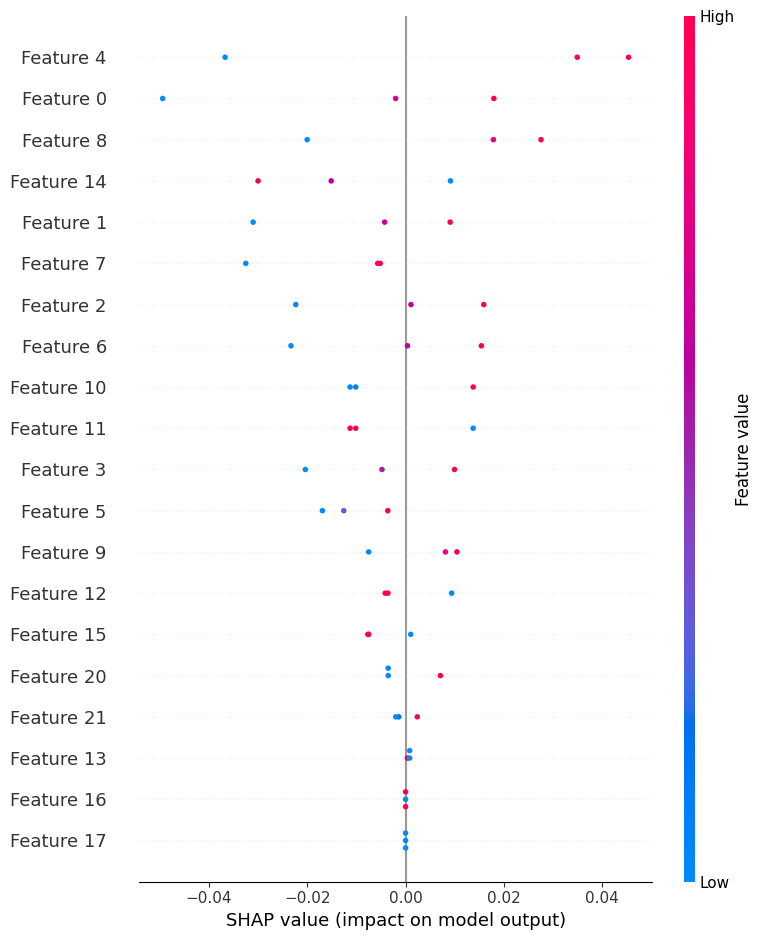

In [160]:


# Sample dataset (Replace with your real dataset)
np.random.seed(42)
# data = pd.DataFrame({
#     'feature1': np.random.rand(100),
#     'feature2': np.random.rand(100) * 0.5 + np.random.rand(100) * 0.5,
#     'feature3': np.random.rand(100) * 2,
#     'feature4': np.random.rand(100) * 5 + np.random.rand(100) * 2
# })
# data['target'] = data['feature1'] * 2 + data['feature2'] * 0.5 - data['feature3'] * 0.8 + np.random.rand(100)

# Split data into train and test
X = monthly_kpis
y = scaled_revenue_preprocessed_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data (Ridge works better with standardized features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Regularization strength α=1.0
ridge_model.fit(X_train_scaled, y_train)

# Create SHAP explainer for Ridge
explainer = shap.Explainer(ridge_model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Visualize SHAP Feature Importance
shap.summary_plot(shap_values, X_test)

In [161]:
preprocessed_df_ROI_KPI.info()

NameError: name 'preprocessed_df_ROI_KPI' is not defined

In [162]:
# Assuming 'preprocessed_df_ROI_KPI' is your DataFrame
monthly_kpis.to_excel('monthly_kpis_scaled.xlsx', index=False)

This code removes the columns 'Unnamed: 0.1' and 'Unnamed: 0' from the DataFrame `preprocessed_df_ROI_KPI`.  It checks if the columns exist before attempting to drop them.


In [ ]:
# # Assuming 'preprocessed_df_ROI_KPI' is your DataFrame
# columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0']
# for column in columns_to_drop:  # Iterate through each column name
#   if column in preprocessed_df_ROI_KPI.columns:  # Check if the column exists
#     preprocessed_df_ROI_KPI = preprocessed_df_ROI_KPI.drop(column, axis=1)  # Drop the column

NameError: name 'preprocessed_df_ROI_KPI' is not defined

This code uses the `find_significant_columns` function (defined in a previous cell) to identify pairs of columns in the `preprocessed_df_ROI_KPI` DataFrame that have statistically significant differences (p-value < 0.05) and then prints those pairs.

In [ ]:
# # Assuming 'preprocessed_df_ROI_KPI' is your DataFrame
# significant_pairs = find_significant_columns(preprocessed_df_ROI_KPI)

# # Print the results
# print("Column Pairs with P-value < 0.05:")
# for col1, col2, p_value in significant_pairs:
#   print(f" - {col1} vs {col2}: p-value = {p_value:.4f}")

NameError: name 'find_significant_columns' is not defined

This code performs the following operations on the DataFrame `df_data`:

1.  **Copy DataFrame:** Creates a copy of the `df_data` DataFrame and assigns it to a new DataFrame named `df`.
2.  **Convert to Numeric:** Converts the 'gmv' column to a numeric data type, coercing any non-numeric values to `NaN`.
3.  **Count Null Values:** Calculates and prints the number of null values in each column of the DataFrame.
4.  **Drop Null Values:** Removes any rows containing null values from the DataFrame.
5.  **Drop Column:** Removes the column named 'Unnamed: 0' from the DataFrame.

In [164]:
df=preprocessed_data.copy()
df["gmv"] = pd.to_numeric(df["gmv"], errors="coerce")
df.isnull().sum()
df=df.dropna()
df=df.drop(columns=["Unnamed: 0"])

In [165]:
total_revenue=(df['gmv']*df['units']).sum()
total_revenue_in_crores=total_revenue/1e7
print(f"Total revenue is {total_revenue_in_crores} crores.")

Total revenue is 423.481483 crores.


In [166]:
# calculating daily and monthly revenue
df['revenue']=df['gmv']*df['units']
df["yearmonth"] = pd.to_datetime(df["order_date"]).dt.strftime("%Y-%m")
df["year_month_day"] = pd.to_datetime(df["order_date"]).dt.strftime("%Y-%m-%d")


In [183]:
monthly_revenue = df.groupby('yearmonth')['gmv'].sum().div(1e7).to_frame(name="revenue")


In [176]:
#  monthly revenue in crores
monthly_revenue = df.groupby('yearmonth', as_index=False)['gmv'].sum()
monthly_revenue['revenue'] = monthly_revenue['gmv'] / 1e7
monthly_revenue = monthly_revenue[['yearmonth', 'revenue']]


In [184]:
monthly_revenue

revenue
yearmonth           
2023-05     0.000315
2023-06     0.000498
2023-07    17.420683
2023-08     0.041610
2023-09    42.176067
2023-10    50.272783
2023-11    33.138694
2023-12    43.582020
2024-01    38.719300
2024-02    33.156703
2024-03    40.400302
2024-04    33.970355
2024-05    40.945315
2024-06    30.591331
2024-07     0.173094

In [178]:
df_media

0           Year  Month  Total Investment        TV    Digital  Sponsorship  \
month_year                                                                    
2023-07     2023      7         17.061775  0.215330   2.533014     7.414270   
2023-08     2023      8          5.064306  0.006438   1.278074     1.063332   
2023-09     2023      9         96.254380  3.879504   1.356528    62.787651   
2023-10     2023     10        170.156297  6.144711  12.622480    84.672532   
2023-11     2023     11         51.216220  4.220630   1.275469    14.172116   
2023-12     2023     12        106.745312  5.397502   3.063360    56.705419   
2024-01     2024      1         74.196000  4.380000   0.456000     4.200000   
2024-02     2024      2         48.052000  2.586008   1.912651    11.725555   
2024-03     2024      3        100.024621  9.300000   2.100000    41.590000   
2024-04     2024      4         56.848241  5.205196   0.871892    24.308354   
2024-05     2024      5         78.057000  1.370000   0.770000    31.680000   
2024-06     2024      6         42.834216  1.662717   1.420761    25.048541   

0           Content Marketing  Online marketing   Affiliates        SEM  \
month_year                                                                
2023-07              0.000933          1.327278     0.547254   5.023697   
2023-08              0.000006          0.129244     0.073684   2.513528   
2023-09              0.610292         16.379990     5.038266   6.202149   
2023-10              3.444075         24.371778     6.973711  31.927011   
2023-11              0.168633         19.561574     6.595767   5.222032   
2023-12              1.067307         22.503756     6.826938  11.181030   
2024-01              0.900000         22.900000     7.370000   4.200000   
2024-02              0.596771         19.892366     6.465019   4.873630   
2024-03              0.370000         18.437818     6.217667   5.193591   
2024-04              0.034876         16.514510     5.693456   4.219958   
2024-05              0.790000         23.650000     6.800000   6.910000   
2024-06              0.045081          7.971300     2.768023   3.735516   

0           Radio      Other  
month_year                    
2023-07      0.00   0.000000  
2023-08      0.00   0.000000  
2023-09      0.00   0.000000  
2023-10      0.00   0.000000  
2023-11      0.00   0.000000  
2023-12      0.00   0.000000  
2024-01      2.70  27.090000  
2024-02      0.00   0.000000  
2024-03      0.87  15.945545  
2024-04      0.00   0.000000  
2024-05      1.10   4.987000  
2024-06      0.00   0.000000

In [185]:

df_media.drop(index=0, inplace=True)
df_media.reset_index(drop=True, inplace=True)
df_media.columns = df_media.iloc[0]
df_media = df_media.drop(index=0)
df_media.reset_index(drop=True, inplace=True)
df_media=df_media.fillna(0)
df_media["year-month"] = df_media["Year"].astype(str) + "-" + df_media["Month"].astype(str).str.zfill(2)
df_media.set_index("year-month", inplace=True)

df_media

KeyError: '[0] not found in axis'

In [179]:
monthly_revenue=pd.DataFrame(monthly_revenue)

In [182]:
monthly_revenue


yearmonth    revenue
0    2023-05   0.000315
1    2023-06   0.000498
2    2023-07  17.420683
3    2023-08   0.041610
4    2023-09  42.176067
5    2023-10  50.272783
6    2023-11  33.138694
7    2023-12  43.582020
8    2024-01  38.719300
9    2024-02  33.156703
10   2024-03  40.400302
11   2024-04  33.970355
12   2024-05  40.945315
13   2024-06  30.591331
14   2024-07   0.173094

## Plot Monthly Revenue and Media Investments

This cell generates a plot that visualizes monthly revenue along with the corresponding monthly investments in various media channels. It displays revenue as a solid blue line and each media investment as a dashed line.

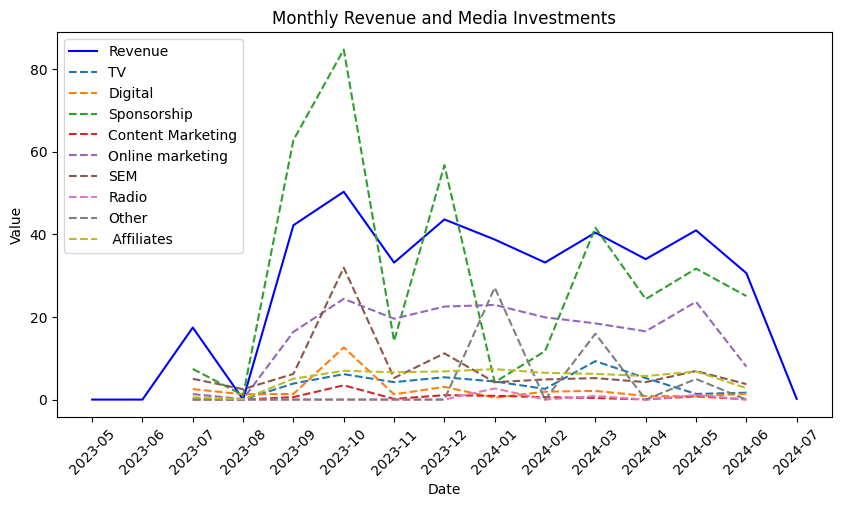

In [186]:
# Plotting monthly revenue and media investments
plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue.index, monthly_revenue['revenue'], label='Revenue', color='blue')
investment_cols = ["TV", "Digital", "Sponsorship", "Content Marketing",
                    "Online marketing",  "SEM", "Radio", "Other"," Affiliates"]
# Plot investment columns
for col in investment_cols:
    plt.plot(df_media.index, df_media[col], label=col, linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.title('Monthly Revenue and Media Investments')
plt.xticks(rotation=45)
plt.show()


## Correlation Heatmap

This cell generates a correlation heatmap to visualize the relationships between different columns in the `df_combined` DataFrame. It displays the correlation coefficients using a color-coded matrix, with numerical annotations for each cell.

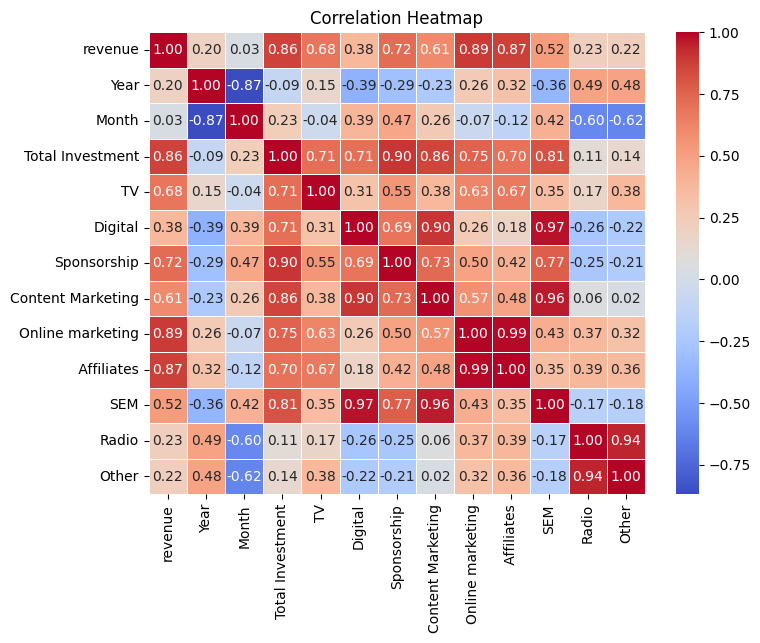

In [188]:
corr_matrix = df_combined.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Log-Transform Investment Data

This cell creates a log-transformed version of the investment data:

1.  **Copy DataFrame:** Creates a copy of `df_combined` to avoid modifying the original data.
2.  **Add Small Constant:** Adds a tiny constant to all values to avoid log(0).
3.  **Log Transformation:** Applies a log transformation (using `np.log1p` for numerical stability) to the specified investment columns.
4.  **Subset DataFrame:** Creates a new DataFrame containing only the log-transformed investment columns and the 'revenue' column.

In [189]:
investment_cols = [
    "Total Investment", "TV", "Digital", "Sponsorship", "Content Marketing",
    "Online marketing", " Affiliates",
     "SEM", "Radio", "Other"
]
df_log_transformed = df_combined.copy()
df_log_transformed+=.0000001
df_log_transformed[investment_cols] = np.log1p(df_log_transformed[investment_cols])
df_log_transformed = df_log_transformed[investment_cols + ["revenue"]]

## Correlation Heatmap (Log-Transformed Data)

This cell generates a correlation heatmap to visualize the relationships between the log-transformed investment data and revenue. It displays the correlation coefficients using a color-coded matrix with numerical annotations.

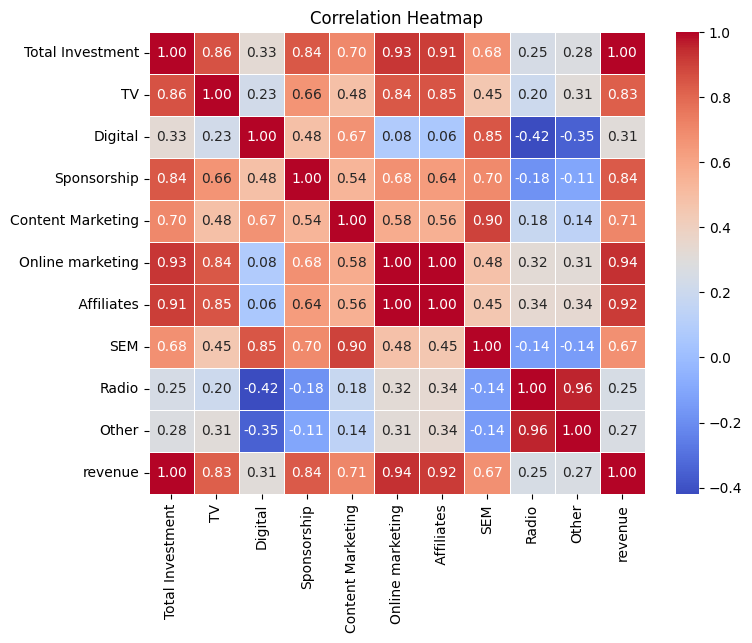

In [190]:
corr_matrix = df_log_transformed.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [192]:
threshold = 0.9
high_corr_pairs = corr_matrix.abs() > threshold
# Mask the diagonal (self-correlation)
np.fill_diagonal(high_corr_pairs.values, False)
# Extract column pairs that meet the threshold
high_corr_pairs = corr_matrix[high_corr_pairs].stack().reset_index()
high_corr_pairs.columns = ["Feature 1", "Feature 2", "Correlation"]
print(high_corr_pairs)

           Feature 1         Feature 2  Correlation
0   Total Investment  Online marketing     0.927424
1   Total Investment        Affiliates     0.907620
2   Total Investment           revenue     0.997043
3   Online marketing  Total Investment     0.927424
4   Online marketing        Affiliates     0.997040
5   Online marketing           revenue     0.937408
6         Affiliates  Total Investment     0.907620
7         Affiliates  Online marketing     0.997040
8         Affiliates           revenue     0.915566
9              Radio             Other     0.960209
10             Other             Radio     0.960209
11           revenue  Total Investment     0.997043
12           revenue  Online marketing     0.937408
13           revenue        Affiliates     0.915566


In [193]:
df_combined['profit']=df_combined['revenue']-df_combined['Total Investment']
cols_to_correlate = list(df_log_transformed.columns)
df_log_transformed=df_log_transformed.drop(columns=['revenue'])
correlation = df_log_transformed.corrwith(df_combined["profit"])


## Correlation Heatmap with Profit

This cell creates a heatmap visualization of the correlation between various features and profit. It transforms the correlation series into a DataFrame, then uses seaborn to generate a heatmap with annotated correlation values. The heatmap's height is dynamically adjusted based on the number of features, and it uses a 'coolwarm' color scheme with a centered zero point.

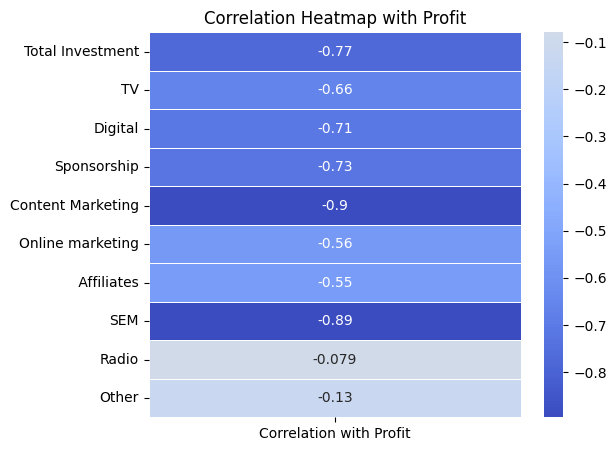

In [194]:
correlation_df = correlation.to_frame(name="Correlation with Profit")

# Plot heatmap
plt.figure(figsize=(6, len(correlation) * 0.5))  # Adjust height dynamically
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", linewidths=0.5, center=0)

plt.title("Correlation Heatmap with Profit")
plt.show()

## Daily Revenue with Holiday Highlights

This cell generates a line plot of daily revenue, highlighting holidays with vertical red dashed lines.

1.  **Plot Daily Revenue:** Creates a line plot of daily revenue over time, marking data points with circles.
2.  **Highlight Holidays:** Iterates through a list of holiday dates and draws vertical red dashed lines at those dates on the plot.
3.  **Labels and Title:** Sets the x-axis label, y-axis label, and plot title.
4.  **Legend and X-Axis Rotation:** Adds a legend and rotates the x-axis labels for better readability.
5.  **Display Plot:** Shows the generated plot.

In [195]:
daily_revenue = df.groupby("year_month_day", as_index=False)["revenue"].sum()
daily_revenue.columns = ["date", "revenue"]
daily_revenue = pd.DataFrame(daily_revenue)

In [199]:
df_holiday=Holidays.copy()

In [200]:
# df_holiday=pd.read_excel('holiday.xlsx')
df_holiday["Day"] = pd.to_datetime(df_holiday["Day"]).dt.strftime("%Y-%m-%d")
df_holiday = df_holiday[["Day"]]
holidays = df_holiday["Day"].tolist()

## Daily Revenue with Holiday Markers

This cell plots the daily revenue and highlights holiday dates:

1.  **Plot Daily Revenue:** Creates a line plot showing daily revenue over time, with markers at each data point.
2.  **Highlight Holidays:** Draws vertical red dashed lines on the plot to mark the occurrence of holidays.
3.  **Labels and Title:** Adds labels to the x and y axes, and sets a title for the plot.
4.  **Legend and Formatting:** Includes a legend to identify the revenue line, and rotates the x-axis labels for better readability.
5.  **Display Plot:** Shows the final plot.

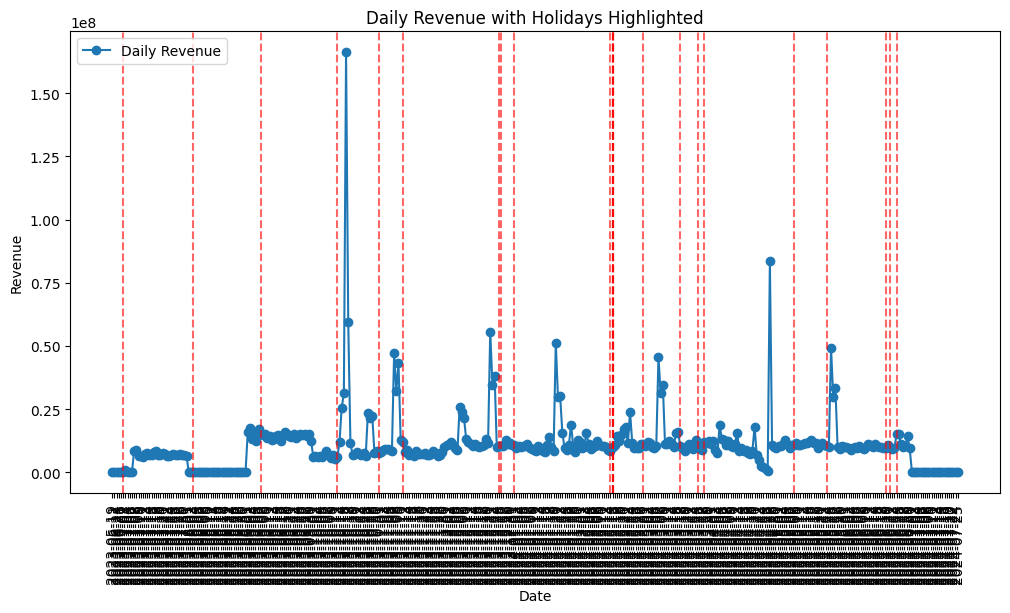

In [201]:
plt.figure(figsize=(12, 6))
plt.plot(daily_revenue["date"], daily_revenue["revenue"], marker="o", label="Daily Revenue")

# Highlight Holidays
for holiday in holidays:
    if holiday in daily_revenue["date"].values:
        plt.axvline(x=holiday, color="r", linestyle="--", alpha=0.6)

plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Daily Revenue with Holidays Highlighted")
plt.legend()
plt.xticks(rotation=90)
plt.show()


In [202]:
pre_df=pd.read_csv("preprocessed_data.csv")
print(pre_df['gmv_category_encoded'])

0          1
1          1
2          0
3          0
4          0
          ..
1648819    0
1648820    0
1648821    0
1648822    0
1648823    0
Name: gmv_category_encoded, Length: 1648824, dtype: int64


In [203]:
total_spend = pre_df.groupby('cust_id')['gmv'].sum()
purchase_frequency = pre_df.groupby('cust_id')['order_date'].count()
customer_profiles = pd.DataFrame({
    'Total Spend': total_spend,
    'Purchase Frequency': purchase_frequency,
})


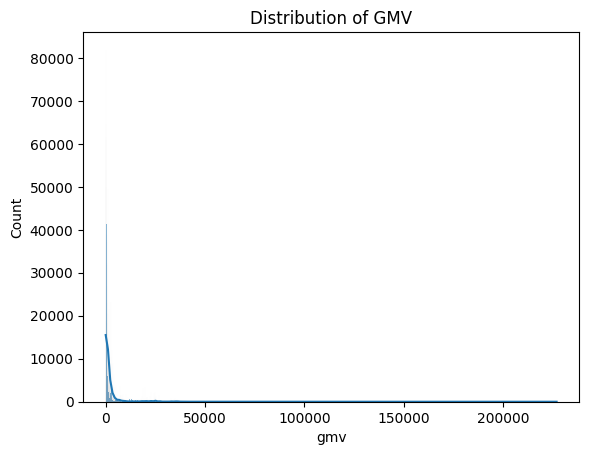

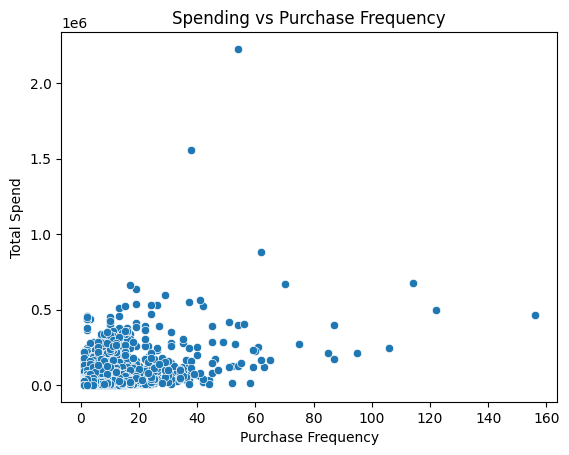

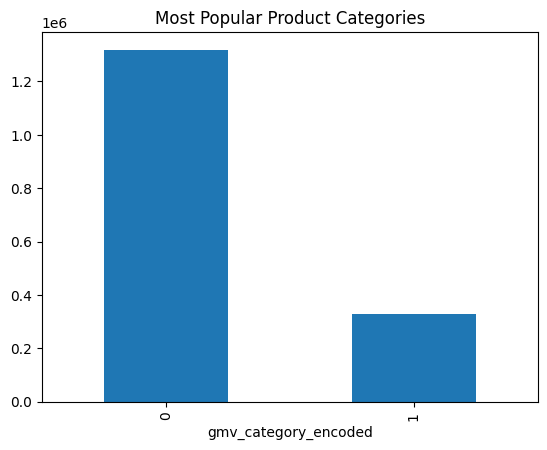

In [204]:
# Distribution of GMV
sns.histplot(pre_df['gmv'], kde=True)
plt.title('Distribution of GMV')
plt.show()

# Spending vs Frequency Scatter Plot
sns.scatterplot(x=customer_profiles['Purchase Frequency'], y=customer_profiles['Total Spend'])
plt.title('Spending vs Purchase Frequency')
plt.show()

# Popular Categories Bar Chart
category_counts = pre_df['gmv_category_encoded'].value_counts()
category_counts.plot(kind='bar')
plt.title('Most Popular Product Categories')
plt.show()

In [205]:
# Calculate the 75th percentile
percentile_75 = pre_df['gmv'].quantile(0.75)

# Create 'spender_type' column
pre_df['spender_type'] = np.where(pre_df['gmv'] > percentile_75, 'High Spender', 'Low Spender')

# Count spender types
spender_counts = pre_df['spender_type'].value_counts()



C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\1420111596.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(title='Spender Type')


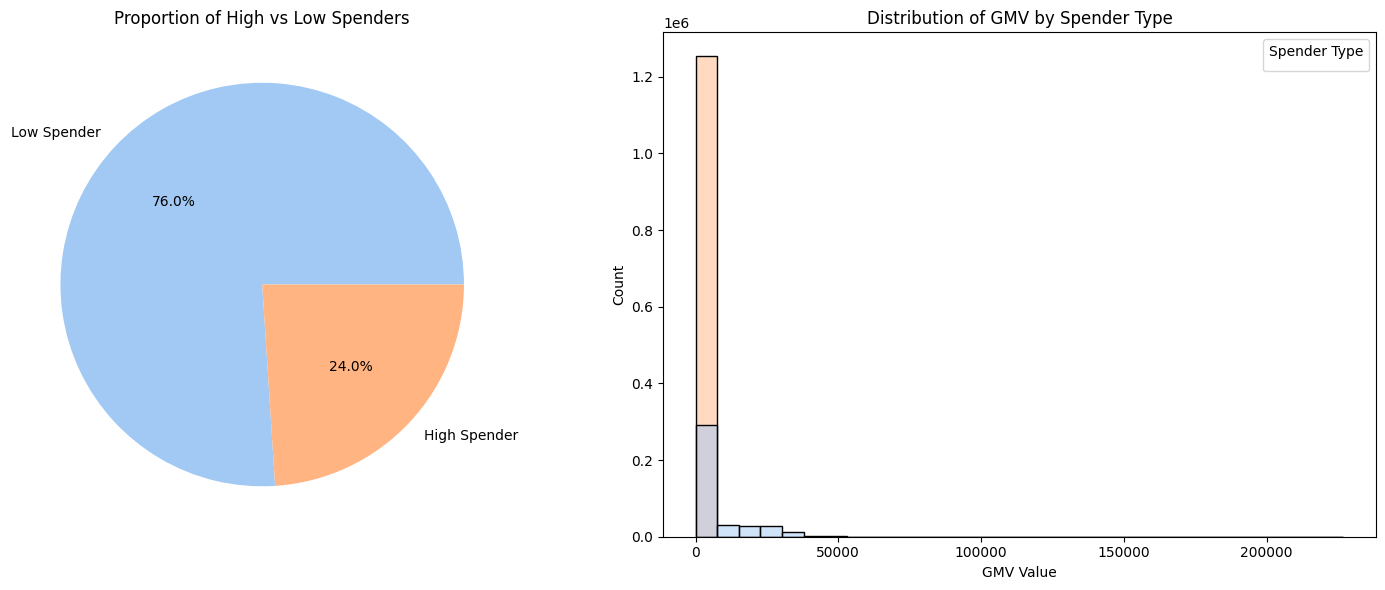

In [206]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie Chart
spender_counts = pre_df['spender_type'].value_counts()
ax1.pie(spender_counts, labels=spender_counts.index,
        autopct='%1.1f%%', colors=sns.color_palette('pastel'))
ax1.set_title('Proportion of High vs Low Spenders')

# Histogram with stacked bars
sns.histplot(data=pre_df, x='gmv', hue='spender_type',
             bins=30, palette='pastel', ax=ax2)
ax2.set_title('Distribution of GMV by Spender Type')
ax2.set_xlabel('GMV Value')
ax2.set_ylabel('Count')
ax2.legend(title='Spender Type')

plt.tight_layout()
plt.show()

C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\3141133907.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=buyer_type_counts.index, y=buyer_type_counts.values, palette="pastel")


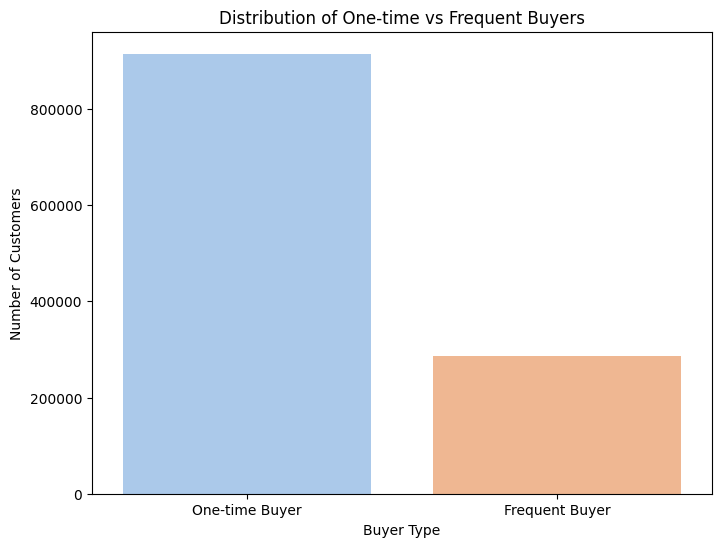

In [207]:
# Step 1: Count orders per customer
order_counts = pre_df['cust_id'].value_counts()

# Step 2: Categorize buyers
buyer_types = pd.cut(order_counts,
                     bins=[0, 1, float('inf')],
                     labels=['One-time Buyer', 'Frequent Buyer'])

# Step 3: Count the number of each buyer type
buyer_type_counts = buyer_types.value_counts()

# Step 4: Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=buyer_type_counts.index, y=buyer_type_counts.values, palette="pastel")
plt.title('Distribution of One-time vs Frequent Buyers')
plt.xlabel('Buyer Type')
plt.ylabel('Number of Customers')
plt.show()

C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\3243198955.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="pastel")


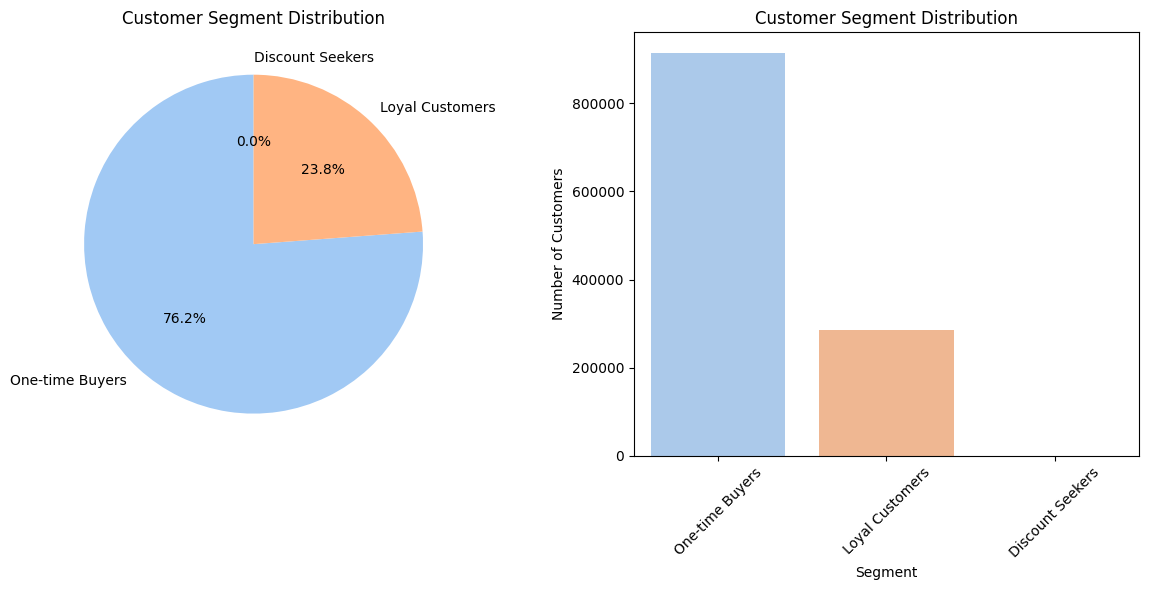

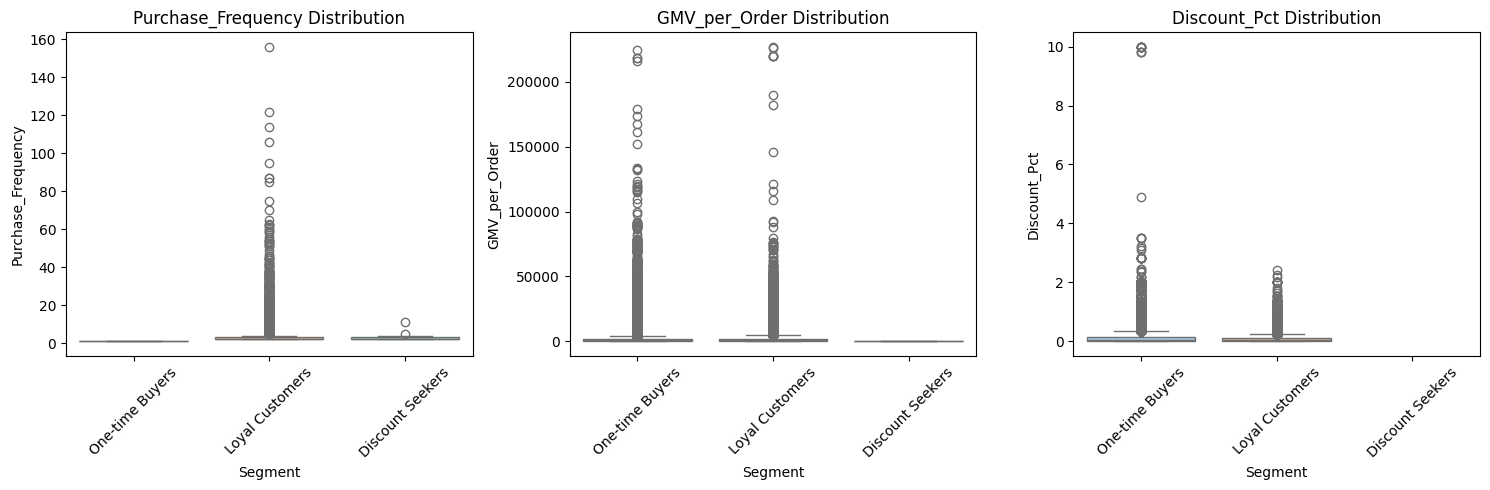

In [208]:

import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. Create Customer Profiles (without category data)
customer_profiles = pre_df.groupby('cust_id').agg(
    Total_Spend=('gmv', 'sum'),
    Purchase_Frequency=('order_date', 'count'),
    Total_Discount=('discount_percentage', 'sum'),
    Last_Purchase=('order_date', 'max')
).reset_index()

# 2. Calculate Metrics
customer_profiles['GMV_per_Order'] = customer_profiles['Total_Spend'] / customer_profiles['Purchase_Frequency']
customer_profiles['Discount_Pct'] = customer_profiles['Total_Discount'] / customer_profiles['Total_Spend']

# 3. Define Segments (adjusted definitions)
# Calculate thresholds
top_20_pct_freq = customer_profiles['Purchase_Frequency'].quantile(0.8)
recent_threshold = datetime.now() - timedelta(days=30)

# Convert 'Last_Purchase' to datetime objects if it's currently strings
customer_profiles['Last_Purchase'] = pd.to_datetime(customer_profiles['Last_Purchase'])

# Initialize segments
customer_profiles['Segment'] = 'Other'

# Loyal Customers (top 20% frequency only)
customer_profiles.loc[
    customer_profiles['Purchase_Frequency'] >= top_20_pct_freq,
    'Segment'] = 'Loyal Customers'

# Discount Seekers (high discount % + low GMV/order)
customer_profiles.loc[
    (customer_profiles['Discount_Pct'] > 30) &  # 30% threshold
    (customer_profiles['GMV_per_Order'] < customer_profiles['GMV_per_Order'].median()),
    'Segment'] = 'Discount Seekers'

# One-time Buyers
customer_profiles.loc[
    customer_profiles['Purchase_Frequency'] == 1,
    'Segment'] = 'One-time Buyers'

# New Buyers
customer_profiles.loc[
    customer_profiles['Last_Purchase'] >= recent_threshold,
    'Segment'] = 'New Buyers'


# 4. Visualize Segment Distribution
plt.figure(figsize=(12, 6))

# Pie Chart
plt.subplot(1, 2, 1)
segment_counts = customer_profiles['Segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette('pastel'), startangle=90)
plt.title('Customer Segment Distribution')

# Bar Plot
plt.subplot(1, 2, 2)
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="pastel")
plt.title('Customer Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 5. Segment Characteristics Analysis
plt.figure(figsize=(15, 5))
metrics = ['Purchase_Frequency', 'GMV_per_Order', 'Discount_Pct']

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Segment', y=metric, data=customer_profiles, hue='Segment', legend=False, palette="pastel")  # Add hue='Segment' and legend=False
    plt.title(f'{metric} Distribution')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\1598903162.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


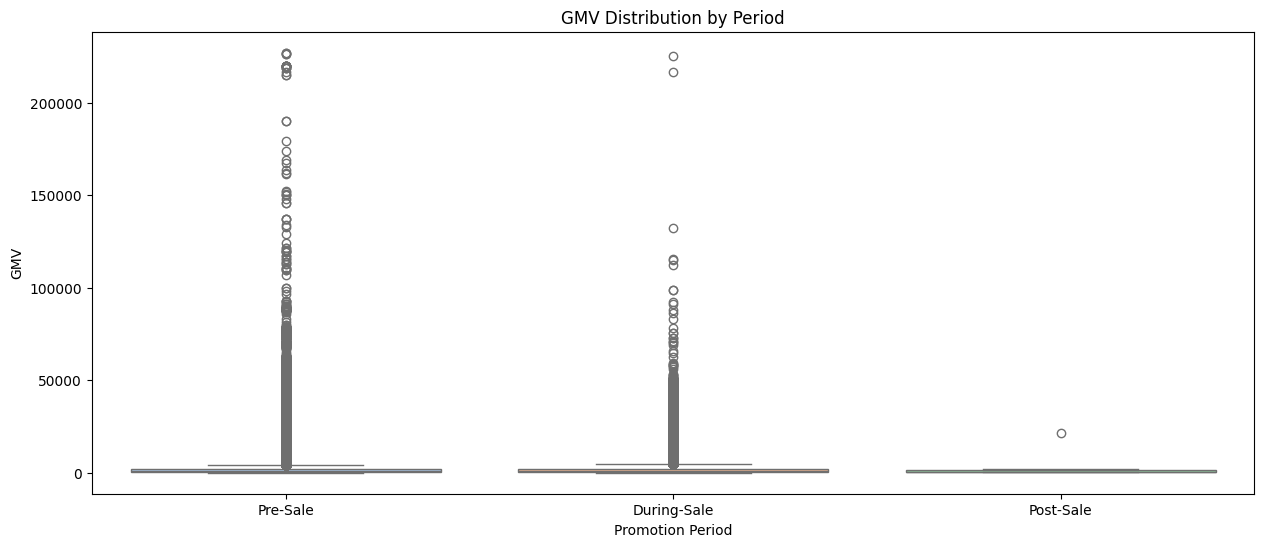

ANOVA Results: F-stat=2104.99, p-value=0.0000

Pairwise Comparisons:
Pre-Sale vs During-Sale: t=-64.88, p=0.0000
During-Sale vs Post-Sale: t=-0.10, p=0.9182
Pre-Sale vs Post-Sale: t=-0.56, p=0.5770


In [209]:

from scipy import stats
from datetime import datetime, timedelta

# 1. Add Time Period Flags
# Convert 'order_date' to datetime objects before any operations
pre_df['order_date'] = pd.to_datetime(pre_df['order_date'])

# Create a new column to categorize periods: Pre-Sale, During-Sale, Post-Sale
pre_df['period'] = np.where(
    (pre_df['sales_mark'] == 1), 'During-Sale',  # Orders with sales_mark = 1 are during the sale
    np.where(
        (pre_df['sales_mark'] == 0) & (pre_df['order_date'] < (pre_df['order_date'].max() - timedelta(days=7))), 'Pre-Sale', # Orders before the sale period
        'Post-Sale'  # Orders after the sale period (sales_mark = 0 but not within the pre-sale timeframe)
    )
)


# 2. Calculate Aggregated Metrics
period_gmv = pre_df.groupby('period').agg(
    avg_gmv=('gmv', 'mean'),
    total_orders=('gmv', 'count')
).reset_index()

# 3. Visualize GMV Trends by Period
plt.figure(figsize=(15, 6))

# Boxplot Comparison
sns.boxplot(
    x='period',
    y='gmv',
    data=pre_df,
    order=['Pre-Sale', 'During-Sale', 'Post-Sale'],
    palette='pastel'
)
plt.title('GMV Distribution by Period')
plt.xlabel('Promotion Period')
plt.ylabel('GMV')
plt.show()

# 4. Statistical Testing
# Separate GMV values by period
pre_sale_gmv = pre_df[pre_df['period'] == 'Pre-Sale']['gmv']
during_sale_gmv = pre_df[pre_df['period'] == 'During-Sale']['gmv']
post_sale_gmv = pre_df[pre_df['period'] == 'Post-Sale']['gmv']

# ANOVA Test to check if GMV differs significantly across periods
f_stat, p_value = stats.f_oneway(pre_sale_gmv, during_sale_gmv, post_sale_gmv)
print(f"ANOVA Results: F-stat={f_stat:.2f}, p-value={p_value:.4f}")

# Pairwise T-Tests for detailed comparisons
print("\nPairwise Comparisons:")
for pair in [('Pre-Sale', 'During-Sale'), ('During-Sale', 'Post-Sale'), ('Pre-Sale', 'Post-Sale')]:
    t_stat, p_val = stats.ttest_ind(
        pre_df[pre_df['period'] == pair[0]]['gmv'],
        pre_df[pre_df['period'] == pair[1]]['gmv']
    )
    print(f"{pair[0]} vs {pair[1]}: t={t_stat:.2f}, p={p_val:.4f}")

# 5. Analyze Discount Impact (if discount% column exists)
if 'discount%' in pre_df.columns:
    # Group by discount levels and calculate post-sale engagement rate
    pre_df['discount_group'] = pd.cut(
        pre_df['discount%'],
        bins=[0, 10, 20, 30, 100],
        labels=['0-10%', '11-20%', '21-30%', '>30%']
    )

    discount_impact = pre_df.groupby('discount_group').agg(
        avg_gmv=('gmv', 'mean'),
        post_sale_rate=('sales', lambda x: (x.shift(-1) == 0).mean())
    ).reset_index()

    # Visualize Discount Impact on Post-Sale Engagement
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x='discount_group',
        y='post_sale_rate',
        data=discount_impact,
        palette='pastel'
    )
    plt.title('Post-Sale Engagement by Discount Level')
    plt.xlabel('Discount Percentage Group')
    plt.ylabel('Post-Sale Engagement Rate')
    plt.ylim(0, 1)
    plt.show()


C:\Users\ajsal\AppData\Local\Temp\ipykernel_15108\2396508130.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


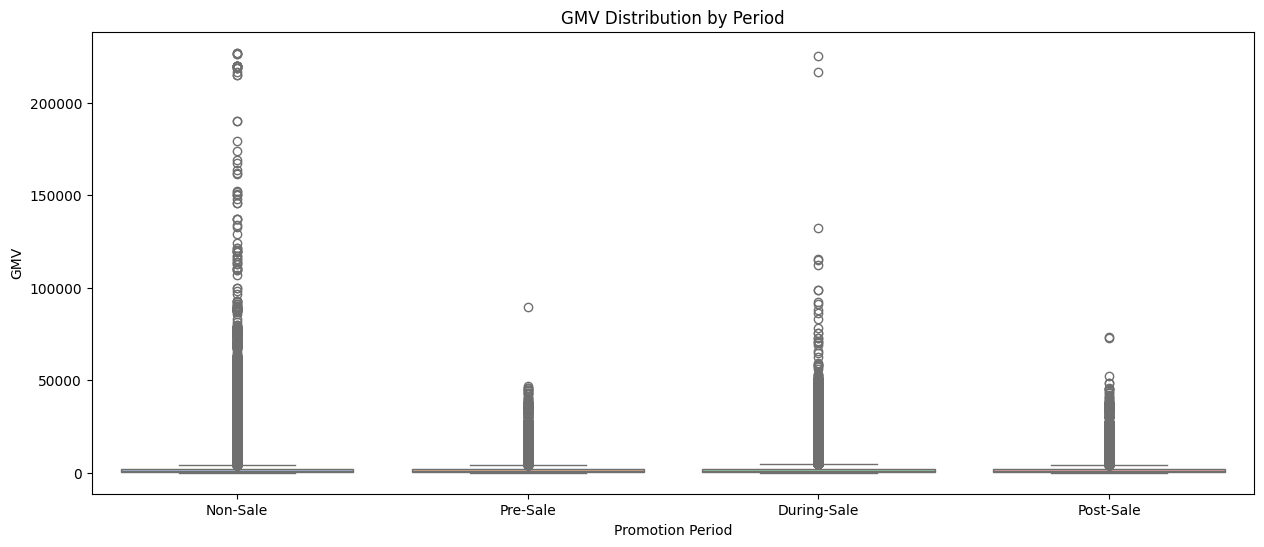

ANOVA Results: F-stat=1406.85, p-value=0.0000

Pairwise Comparisons:
Non-Sale vs Pre-Sale: t=1.35, p=0.1779
Non-Sale vs During-Sale: t=-64.63, p=0.0000
Non-Sale vs Post-Sale: t=3.13, p=0.0018
Pre-Sale vs During-Sale: t=-12.88, p=0.0000
Pre-Sale vs Post-Sale: t=1.23, p=0.2195
During-Sale vs Post-Sale: t=15.02, p=0.0000


c:\Users\ajsal\anaconda3\envs\gcenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


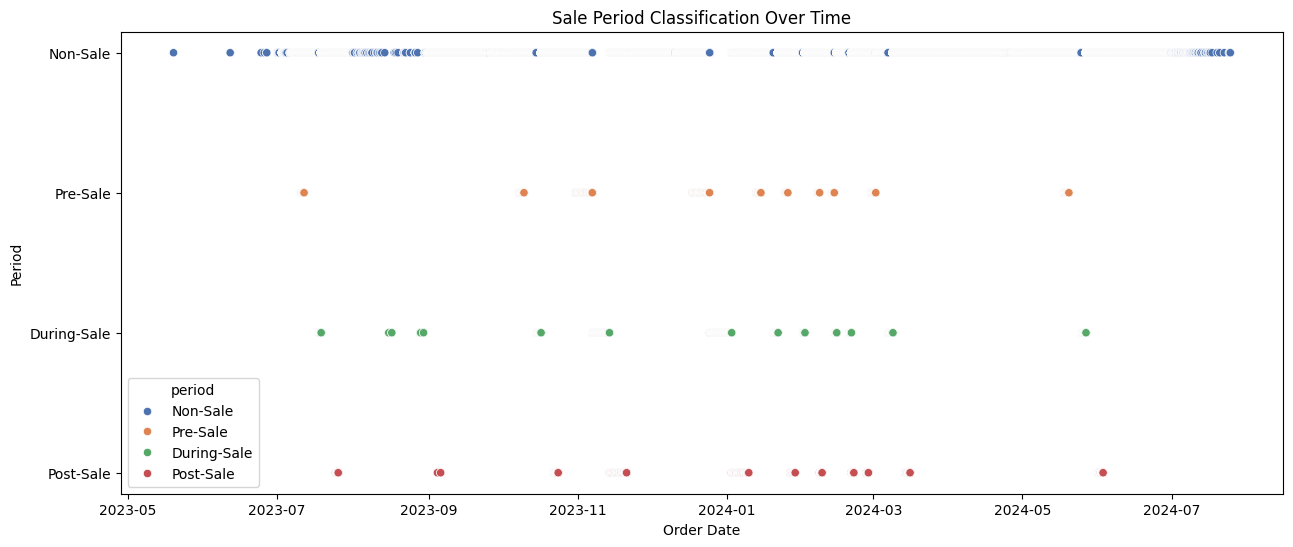


Summary Statistics:
        period      avg_gmv  total_orders
0  During-Sale  3171.573184        222117
1     Non-Sale  2343.760843       1407295
2    Post-Sale  2175.606208         10277
3     Pre-Sale  2266.967816          9135
Pre-Sale GMV Lift: -3.28%
During-Sale GMV Lift: 35.32%
Post-Sale GMV Lift: -7.17%


In [210]:
from scipy import stats
from datetime import timedelta

# Assuming pre_df is your DataFrame with columns: order_date, gmv, sales_mark, discount%

# 1. Prepare the data
pre_df['order_date'] = pd.to_datetime(pre_df['order_date'])
pre_df = pre_df.sort_values('order_date')

# 2. Identify sale periods and classify orders
sale_dates = pre_df[pre_df['sales_mark'] == 1]['order_date'].unique()
pre_sale_windows = [d - pd.Timedelta(days=7) for d in sale_dates]
post_sale_windows = [d + pd.Timedelta(days=7) for d in sale_dates]

conditions = [
    pre_df['sales_mark'] == 1,
    pre_df['order_date'].isin(pre_sale_windows),
    pre_df['order_date'].isin(post_sale_windows)
]
choices = ['During-Sale', 'Pre-Sale', 'Post-Sale']
pre_df['period'] = np.select(conditions, choices, default='Non-Sale')

# 3. Calculate aggregated metrics
period_gmv = pre_df.groupby('period').agg(
    avg_gmv=('gmv', 'mean'),
    total_orders=('gmv', 'count')
).reset_index()

# 4. Visualize GMV trends by period
plt.figure(figsize=(15, 6))
sns.boxplot(
    x='period',
    y='gmv',
    data=pre_df,
    order=['Non-Sale', 'Pre-Sale', 'During-Sale', 'Post-Sale'],
    palette='pastel'
)
plt.title('GMV Distribution by Period')
plt.xlabel('Promotion Period')
plt.ylabel('GMV')
plt.show()

# 5. Statistical testing
periods = ['Non-Sale', 'Pre-Sale', 'During-Sale', 'Post-Sale']
gmv_by_period = [pre_df[pre_df['period'] == period]['gmv'] for period in periods]

f_stat, p_value = stats.f_oneway(*gmv_by_period)
print(f"ANOVA Results: F-stat={f_stat:.2f}, p-value={p_value:.4f}")

print("\nPairwise Comparisons:")
for i in range(len(periods)):
    for j in range(i+1, len(periods)):
        t_stat, p_val = stats.ttest_ind(gmv_by_period[i], gmv_by_period[j])
        print(f"{periods[i]} vs {periods[j]}: t={t_stat:.2f}, p={p_val:.4f}")

# 6. Analyze discount impact (if discount% column exists)
if 'discount%' in pre_df.columns:
    pre_df['discount_group'] = pd.cut(
        pre_df['discount%'],
        bins=[0, 10, 20, 30, 100],
        labels=['0-10%', '11-20%', '21-30%', '>30%']
    )

    discount_impact = pre_df.groupby(['discount_group', 'period']).agg(
        avg_gmv=('gmv', 'mean'),
        order_count=('gmv', 'count')
    ).reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(
        x='discount_group',
        y='avg_gmv',
        hue='period',
        data=discount_impact,
        palette='viridis'
    )
    plt.title('Average GMV by Discount Level and Period')
    plt.xlabel('Discount Percentage Group')
    plt.ylabel('Average GMV')
    plt.legend(title='Period')
    plt.show()

# 7. Visualize sale period classification
plt.figure(figsize=(15, 6))
sns.scatterplot(x='order_date', y='period', data=pre_df, hue='period', palette='deep')
plt.title('Sale Period Classification Over Time')
plt.xlabel('Order Date')
plt.ylabel('Period')
plt.show()

# 8. Print summary statistics
print("\nSummary Statistics:")
print(period_gmv)

# 9. Calculate and print lift metrics
non_sale_gmv = period_gmv[period_gmv['period'] == 'Non-Sale']['avg_gmv'].values[0]
for period in ['Pre-Sale', 'During-Sale', 'Post-Sale']:
    period_gmv_val = period_gmv[period_gmv['period'] == period]['avg_gmv'].values[0]
    lift = (period_gmv_val - non_sale_gmv) / non_sale_gmv * 100
    print(f"{period} GMV Lift: {lift:.2f}%")

## Time Series Analysis: GMV vs. Total Investment

This cell performs time series analysis to explore the relationship between GMV per month and Total Media Investment.

1.  **Create DataFrame:**
    * Creates a pandas DataFrame named `data` with columns 'gmv_per_month', 'Year', 'Month', and 'Total_Investment' using the provided data.

2.  **Convert to Time Series:**
    * Combines the 'Year' and 'Month' columns to create a 'Date' column in datetime format.
    * Sorts the DataFrame by 'Date' and resets the index.

3.  **Visualize Trends:**
    * Plots 'gmv_per_month' and 'Total_Investment' over time using a line plot.
    * Adds labels, a legend, and a title to the plot.

4.  **Lagged Correlation Analysis:**
    * Calculates the correlation between 'gmv_per_month' and lagged values of 'Total_Investment' for lags 0 to 3.
    * Prints the lagged correlations in a DataFrame.

5.  **Cross-Correlation Function (CCF):**
    * Calculates the cross-correlation function (CCF) between 'Total_Investment' and 'gmv_per_month' for lags 0 to 3.
    * Plots the CCF values using a bar chart.
    * Adds labels and a title to the plot.


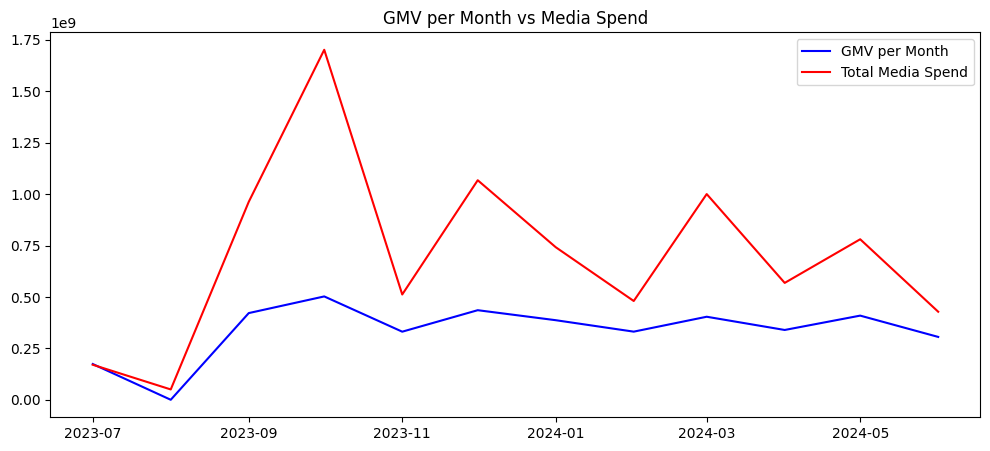

Lagged Correlations:
       Correlation
Lag_0     0.864856
Lag_1     0.218210
Lag_2    -0.195248
Lag_3    -0.098969


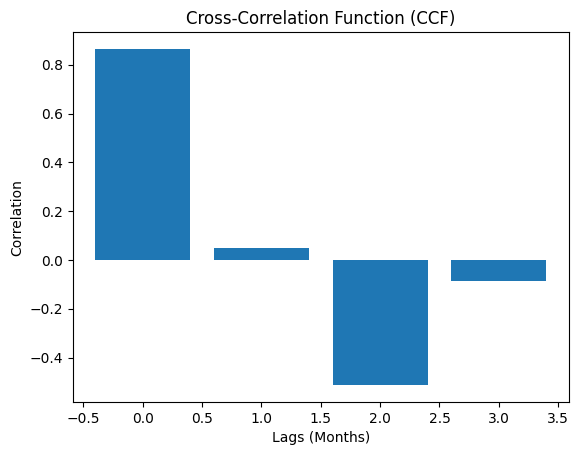

In [211]:

from statsmodels.tsa.stattools import ccf, grangercausalitytests
from statsmodels.api import OLS, add_constant

# Create DataFrame based on the provided data
data = pd.DataFrame({
    "gmv_per_month": [174206832, 416096, 421760671, 502727831, 331386937, 435820199, 387192999, 331567025, 404003023, 339703548, 409453151, 305913306],
    "Year": [2023]*6 + [2024]*6,
    "Month": [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6],
    "Total_Investment": [170617754.43, 50643060.89, 962543798.65, 1701562973.68, 512162204.16, 1067453117.16, 741960000.00, 480520000.00, 1000246214.29, 568482413.79, 780570000.00, 428342164.25]
})

# Convert Year and Month to a Date format
data["Date"] = pd.to_datetime(data[["Year", "Month"]].assign(day=1))
data = data.sort_values("Date").reset_index(drop=True)

# Visualizing trends with updated column name
plt.figure(figsize=(12, 5))
plt.plot(data["Date"], data["gmv_per_month"], label="GMV per Month", color='blue')
plt.plot(data["Date"], data["Total_Investment"], label="Total Media Spend", color='red')
plt.legend()
plt.title("GMV per Month vs Media Spend")
plt.show()

# Lagged Correlation Analysis (updated column name)
max_lag = 3
correlations = {}
for lag in range(max_lag + 1):
    correlations[f"Lag_{lag}"] = data["gmv_per_month"].corr(data["Total_Investment"].shift(lag))

print("Lagged Correlations:")
print(pd.DataFrame.from_dict(correlations, orient='index', columns=["Correlation"]))

# Cross-Correlation Function (updated column name)
lags = np.arange(0, 4)
cc_values = [ccf(data["Total_Investment"].dropna(), data["gmv_per_month"].dropna(), adjusted=False)[lag] for lag in lags]
plt.bar(lags, cc_values)
plt.title("Cross-Correlation Function (CCF)")
plt.xlabel("Lags (Months)")
plt.ylabel("Correlation")
plt.show()


In [212]:
# Define retention criteria
X_months = 6  # Define churn threshold
today = pre_df["order_date"].max()
customer_last_purchase = pre_df.groupby("cust_id")["order_date"].max()

# Determine churned and retained customers
# Handle missing values in customer_last_purchase using .get() with a default value
pre_df["Churned"] = pre_df["cust_id"].map(lambda x: (today - customer_last_purchase.get(x, today)).days > (X_months * 30))

# Calculate Repeat Purchase Rate
repeat_customers = pre_df.groupby("cust_id")["cust_id"].count() > 1
repeat_purchase_rate = (repeat_customers.sum() / pre_df["cust_id"].nunique()) * 100
print(f"Repeat Purchase Rate: {repeat_purchase_rate:.2f}%")

Repeat Purchase Rate: 23.81%


## Clean Weather Data

This cell cleans the weather data by removing flag columns and specific columns related to maximum gust information from both 2023 and 2024 weather datasets.

In [214]:
Weather_Data_2024 = Weather_Data_2024[[col for col in Weather_Data_2024.columns if not col.endswith('Flag')]]
Weather_Data_2023 = Weather_Data_2023[[col for col in Weather_Data_2023.columns if not col.endswith('Flag')]]
cols_to_remove = ['Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag']
Weather_Data_2024 = Weather_Data_2024.drop(columns=[col for col in Weather_Data_2024.columns if col in cols_to_remove])
cols_to_remove = ['Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag']
Weather_Data_2023 = Weather_Data_2023.drop(columns=[col for col in Weather_Data_2023.columns if col in cols_to_remove])

## Combine and Visualize Weather Data

This cell combines weather data from 2023 and 2024, and then visualizes the maximum and minimum temperatures over time.

1.  **Concatenate Data:** Combines the `Weather_Data_2023` and `Weather_Data_2024` DataFrames into a single DataFrame called `combined_weather_data_before_imputation`.
2.  **Display Head:** Displays the first few rows of the combined DataFrame.
3.  **Plot Temperatures:** Creates a line plot showing the maximum and minimum temperatures over time, with markers at each data point.
4.  **Labels and Title:** Adds labels to the x and y axes, and sets a title for the plot.
5.  **Legend, Grid, and Formatting:** Includes a legend, adds a grid for better readability, rotates x-axis labels, and adjusts the layout.
6.  **Display Plot:** Shows the final plot.

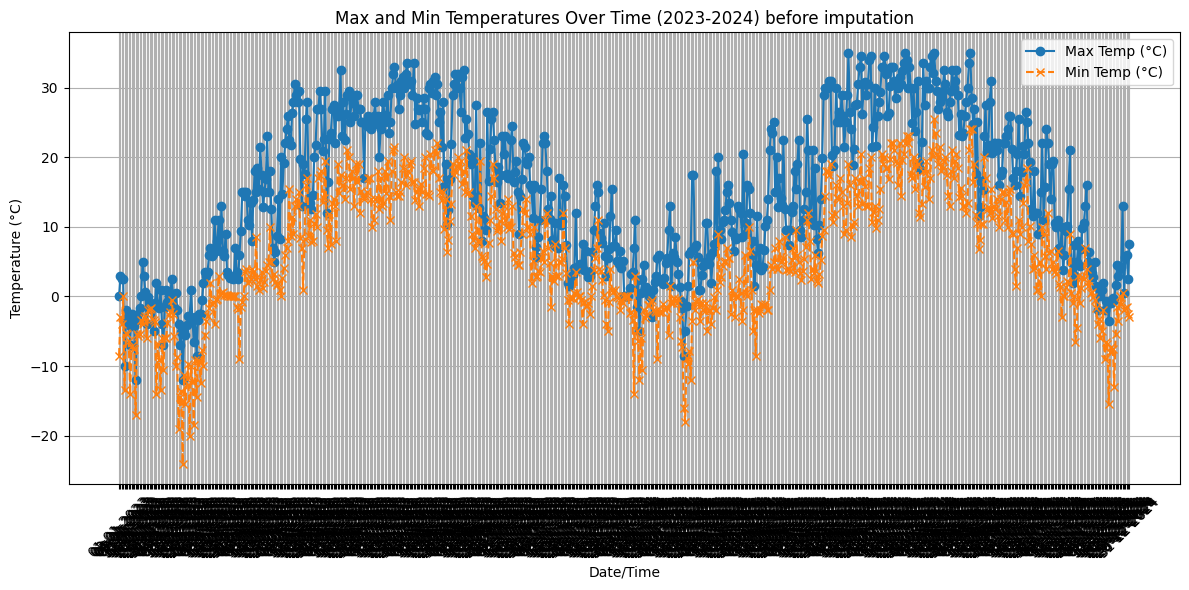

In [215]:
# Concatenating the two DataFrames
combined_weather_data_before_imputation = pd.concat([Weather_Data_2023, Weather_Data_2024], ignore_index=True)
# Displaying the first few rows of the combined dataset
combined_weather_data_before_imputation.head
plt.figure(figsize=(12, 6))
plt.plot(combined_weather_data_before_imputation['Date/Time'], combined_weather_data_before_imputation['Max Temp (°C)'], label='Max Temp (°C)', marker='o', linestyle='-')
plt.plot(combined_weather_data_before_imputation['Date/Time'], combined_weather_data_before_imputation['Min Temp (°C)'], label='Min Temp (°C)', marker='x', linestyle='--')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.title('Max and Min Temperatures Over Time (2023-2024) before imputation')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Impute Missing Values with Rolling Average

This cell defines a function to fill missing values in a specified column of a DataFrame using a rolling average of the surrounding values.

1.  **`fill_missing_with_average` Function:**
    * Takes a DataFrame and a column name as input.
    * Iterates through the values in the specified column.
    * If a value is missing (NaN), it calculates the average of the 3 preceding and 3 following non-missing values.
    * Replaces the missing value with the calculated average.
    * Updates the column in the DataFrame with the imputed values.

In [216]:
def fill_missing_with_average(data, column):
    # Strip any leading/trailing spaces or special characters in column names
    data.columns = data.columns.str.strip()
    values = data[column].to_numpy()
    for i in range(len(values)):
        if pd.isna(values[i]):
            # Get previous 3 and next 3 values
            prev_values = values[max(0, i-3):i]
            next_values = values[i+1:min(len(values), i+4)]

            # Replace NaN with 0 in the slices
            prev_values = np.nan_to_num(prev_values, nan=0)
            next_values = np.nan_to_num(next_values, nan=0)

            # Calculate the average of the previous 3 and next 3 values
            avg = (np.sum(prev_values) + np.sum(next_values)) / (len(prev_values) + len(next_values))
            values[i] = avg
    data[column] = values

In [217]:
columns_to_fill = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)','Heat Deg Days (°C)','Cool Deg Days (°C)','Total Rain (mm)','Total Snow (cm)','Total Precip (mm)','Snow on Grnd (cm)']
for column in columns_to_fill:
    fill_missing_with_average(Weather_Data_2023, column)
    columns_to_fill = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)','Heat Deg Days (°C)','Cool Deg Days (°C)','Total Rain (mm)','Total Snow (cm)','Total Precip (mm)','Snow on Grnd (cm)']
for column in columns_to_fill:
    fill_missing_with_average(Weather_Data_2024, column)

## 2023 Temperature Data After Imputation

This cell generates a plot showing the maximum and minimum temperatures over time for the year 2023, after missing values have been imputed.

1.  **Plot Temperatures:** Creates a line plot of maximum and minimum temperatures against time, using markers.
2.  **Labels and Title:** Adds axis labels and a title to the plot.
3.  **Legend, Grid, and Formatting:** Includes a legend, displays a grid, rotates x-axis labels, and adjusts the layout.
4.  **Display Plot:** Shows the resulting plot.

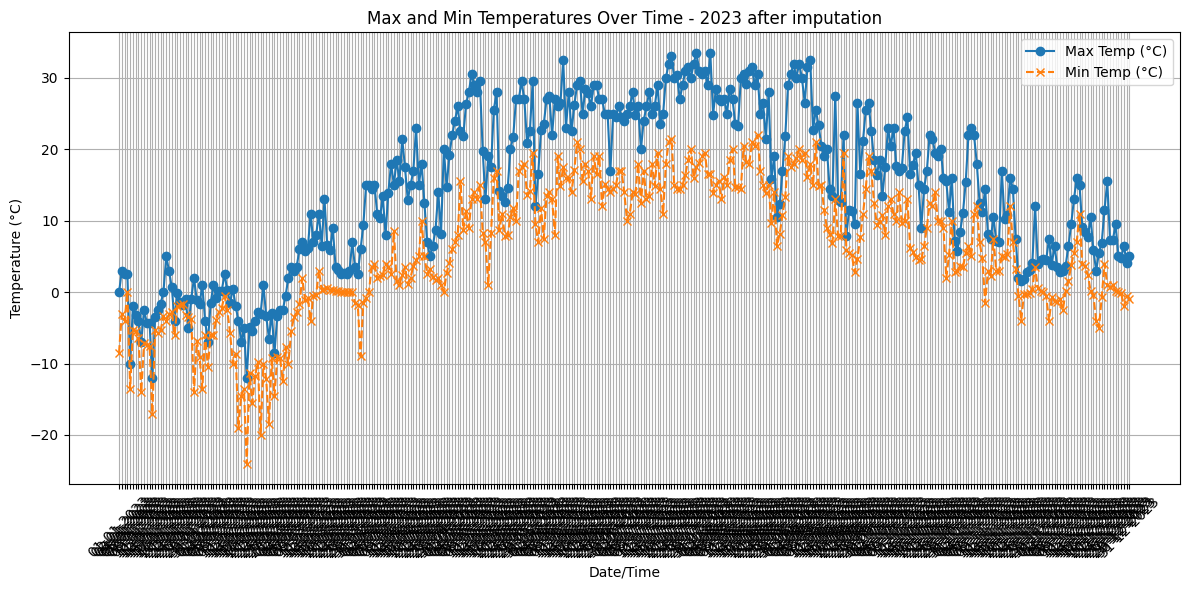

In [218]:
plt.figure(figsize=(12, 6))
plt.plot(Weather_Data_2023['Date/Time'], Weather_Data_2023['Max Temp (°C)'], label='Max Temp (°C)',marker='o', linestyle='-')
plt.plot(Weather_Data_2023['Date/Time'], Weather_Data_2023['Min Temp (°C)'], label='Min Temp (°C)',marker='x', linestyle='--')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.title('Max and Min Temperatures Over Time - 2023 after imputation')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

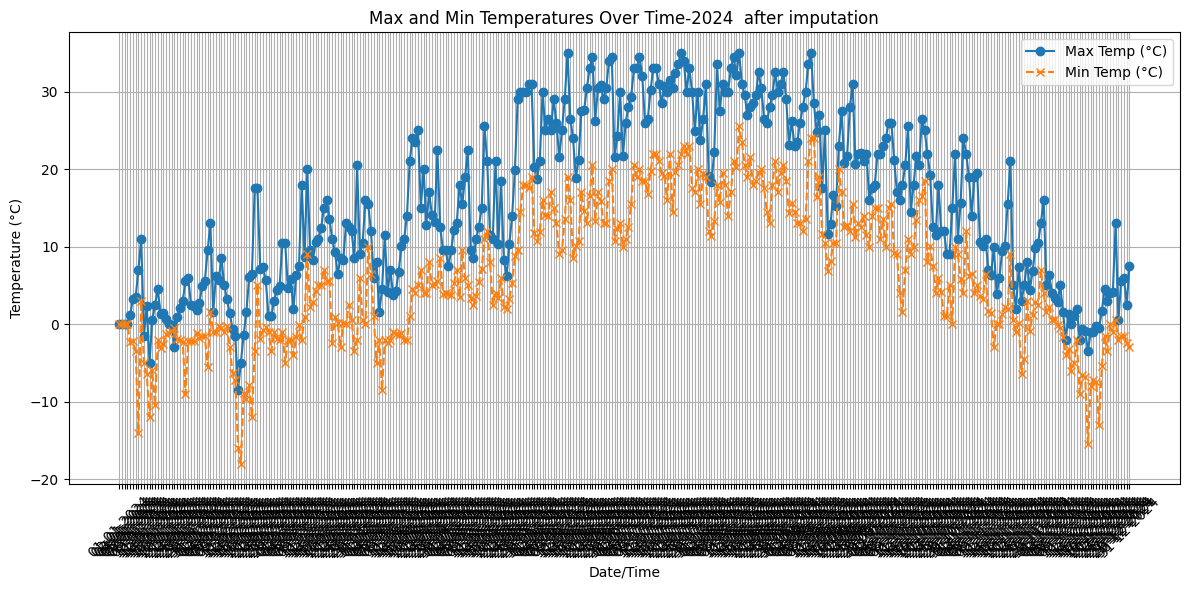

In [219]:
plt.figure(figsize=(12, 6))
plt.plot(Weather_Data_2024['Date/Time'], Weather_Data_2024['Max Temp (°C)'], label='Max Temp (°C)',marker='o', linestyle='-')
plt.plot(Weather_Data_2024['Date/Time'], Weather_Data_2024['Min Temp (°C)'], label='Min Temp (°C)',marker='x', linestyle='--')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.title('Max and Min Temperatures Over Time-2024  after imputation')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

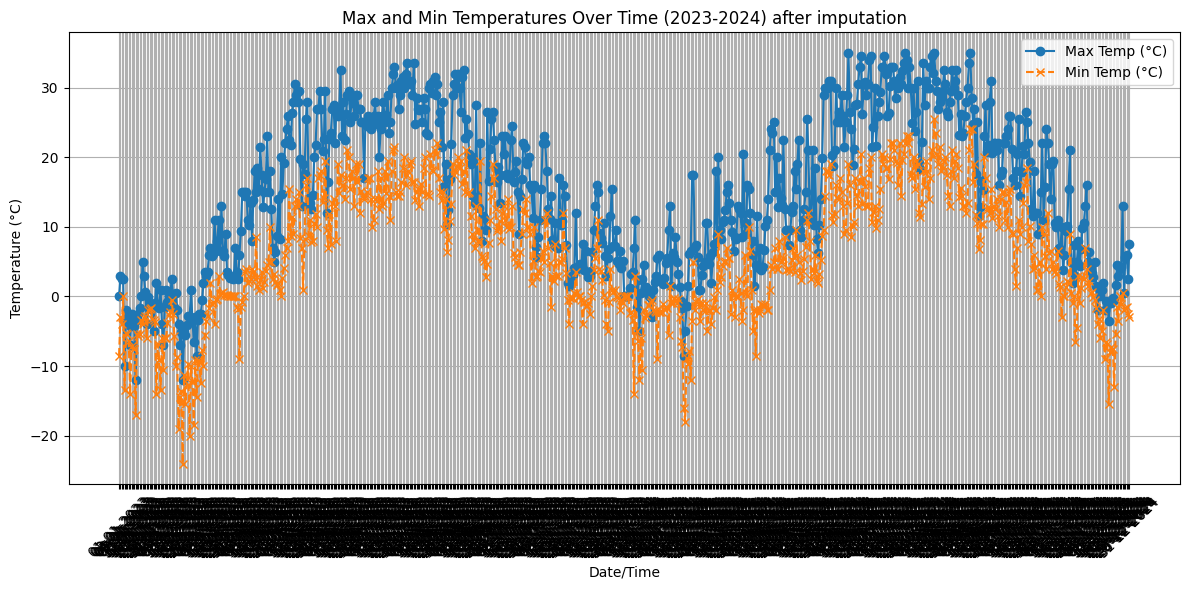

In [220]:
# Concatenate the two DataFrames
combined_weather_data_after_imputation = pd.concat([Weather_Data_2023, Weather_Data_2024], ignore_index=True)

# Display the first few rows of the combined dataset
combined_weather_data_after_imputation.head

plt.figure(figsize=(12, 6))
plt.plot(combined_weather_data_after_imputation['Date/Time'], combined_weather_data_after_imputation['Max Temp (°C)'], label='Max Temp (°C)', marker='o', linestyle='-')
plt.plot(combined_weather_data_after_imputation['Date/Time'], combined_weather_data_after_imputation['Min Temp (°C)'], label='Min Temp (°C)', marker='x', linestyle='--')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.title('Max and Min Temperatures Over Time (2023-2024) after imputation')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
df = pd.read_csv("preprocessed_data.csv")
df.shape

(1648824, 34)

In [5]:
combined_weather_data_after_imputation=pd.read_csv("combined_weather_data_after_imputation (1).csv") 

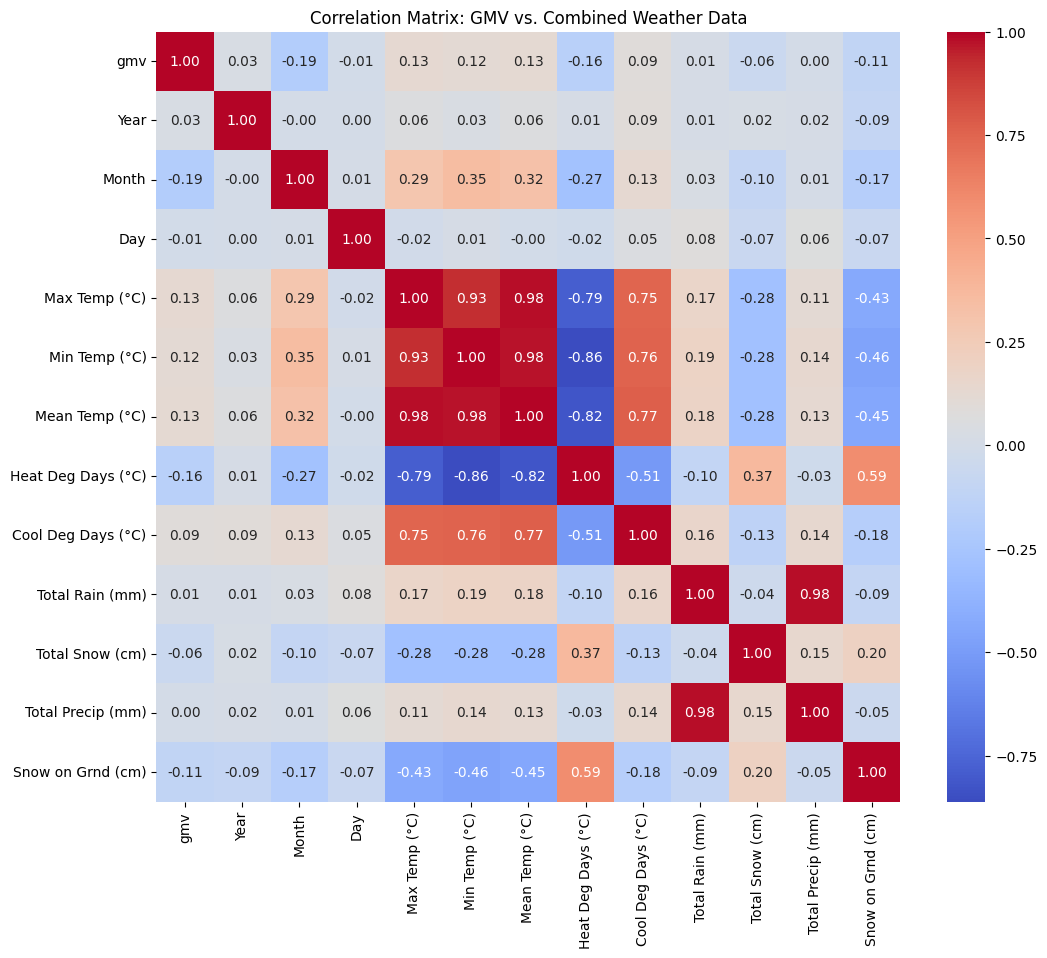

In [10]:
# Select the columns for correlation analysis
correlation_data = pd.concat([df['gmv'], combined_weather_data_after_imputation.drop(columns=['Date/Time','Data Quality'])], axis=1)

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: GMV vs. Combined Weather Data')
plt.show()

## Budget Optimization

In [ ]:

# Load the Excel file
file_path = "Media data-Sale Calendar-NPS Scores_Data.xlsx"
xls = pd.ExcelFile(file_path)

# Display sheet names
xls.sheet_names


['Media Investment', 'Special Sale Calendar', 'Monthly NPS Score']

In [ ]:
media_df = pd.read_excel(xls, sheet_name="Media Investment")

In [ ]:
# # Remove unnecessary rows and rename columns properly
# media_df_cleaned = media_df.iloc[2:].reset_index(drop=True)

# # Rename columns
# media_df_cleaned.columns = [
#     "Drop1", "Year", "Month", "Total Investment", "TV", "Digital", "Sponsorship",
#     "Content Marketing", "Online Marketing", "Affiliates", "SEM", "Radio", "Other"
# ]

# # Drop unnecessary first column
# media_df_cleaned = media_df_cleaned.drop(columns=["Drop1"])

# # Convert all relevant columns to numeric
# cols_to_convert = [
#     "Total Investment", "TV", "Digital", "Sponsorship", "Content Marketing",
#     "Online Marketing", "Affiliates", "SEM", "Radio", "Other"
# ]

# media_df_cleaned[cols_to_convert] = media_df_cleaned[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# # Multiply by 1 crore (10^7)
# media_df_cleaned[cols_to_convert] *= 10**7

# # Fill missing values in "Radio" and "Other" with 1
# media_df_cleaned["Radio"].fillna(1, inplace=True)
# media_df_cleaned["Other"].fillna(1, inplace=True)

C:\Users\ajsal\AppData\Local\Temp\ipykernel_7752\1836338085.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  media_df_cleaned["Radio"].fillna(1, inplace=True)
C:\Users\ajsal\AppData\Local\Temp\ipykernel_7752\1836338085.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [15]:
media_df_cleaned=media_df.copy()

In [16]:
# Create the GMV DataFrame
gmv_list = [
    174206832, 416096, 421760671, 502727831, 331386937,
    435820199, 387192999, 331567025, 404003023, 339703548,
    409453151, 305913306
]
gmv_df = pd.DataFrame({'GMV': gmv_list})

# Reset index of both DataFrames to ensure proper alignment
gmv_df.reset_index(drop=True, inplace=True)
media_df_cleaned.reset_index(drop=True, inplace=True)

# Concatenate the two DataFrames along columns
final_df = pd.concat([gmv_df, media_df_cleaned], axis=1)

In [17]:

# Convert the scientific notation to full float values
pd.options.display.float_format = '{:.2f}'.format
final_df

GMV  Year  Month  Total Investment   TV  Digital  Sponsorship  \
0   174206832  2023      7             17.06 0.22     2.53         7.41   
1      416096  2023      8              5.06 0.01     1.28         1.06   
2   421760671  2023      9             96.25 3.88     1.36        62.79   
3   502727831  2023     10            170.16 6.14    12.62        84.67   
4   331386937  2023     11             51.22 4.22     1.28        14.17   
5   435820199  2023     12            106.75 5.40     3.06        56.71   
6   387192999  2024      1             74.20 4.38     0.46         4.20   
7   331567025  2024      2             48.05 2.59     1.91        11.73   
8   404003023  2024      3            100.02 9.30     2.10        41.59   
9   339703548  2024      4             56.85 5.21     0.87        24.31   
10  409453151  2024      5             78.06 1.37     0.77        31.68   
11  305913306  2024      6             42.83 1.66     1.42        25.05   

    Content Marketing  Online marketing   Affiliates   SEM  Radio  Other  
0                0.00              1.33         0.55  5.02   0.00   0.00  
1                0.00              0.13         0.07  2.51   0.00   0.00  
2                0.61             16.38         5.04  6.20   0.00   0.00  
3                3.44             24.37         6.97 31.93   0.00   0.00  
4                0.17             19.56         6.60  5.22   0.00   0.00  
5                1.07             22.50         6.83 11.18   0.00   0.00  
6                0.90             22.90         7.37  4.20   2.70  27.09  
7                0.60             19.89         6.47  4.87   0.00   0.00  
8                0.37             18.44         6.22  5.19   0.87  15.95  
9                0.03             16.51         5.69  4.22   0.00   0.00  
10               0.79             23.65         6.80  6.91   1.10   4.99  
11               0.05              7.97         2.77  3.74   0.00   0.00

In [23]:
final_df.columns

Index(['GMV', 'Year', 'Month', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates',
       'SEM', 'Radio', 'Other'],
      dtype='object')

In [24]:
# # Prepare the input data (log-transform budgets)
X = np.log(final_df[['TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',' Affiliates','SEM','Radio','Other']])
y = final_df['GMV']


# # Fit regression model
# reg = LinearRegression()
# reg.fit(X, y)

# # Extract parameters
# k = reg.intercept_
# b_coefficients = reg.coef_

# print("Intercept (k):", k)
# for i, b in enumerate(b_coefficients, start=1):
#     print(f"Coefficient b{i}: {b}")
# y_pred = reg.predict(X)


# mse = mean_squared_error(y, y_pred)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(y, y_pred)
# r2 = r2_score(y, y_pred)

# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"R-squared (R²): {r2:.4f}")

c:\Users\ajsal\anaconda3\envs\gcenv\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [26]:
X

TV  Digital  Sponsorship  Content Marketing  Online marketing  \
0  -1.54     0.93         2.00              -6.98              0.28   
1  -5.05     0.25         0.06             -11.97             -2.05   
2   1.36     0.30         4.14              -0.49              2.80   
3   1.82     2.54         4.44               1.24              3.19   
4   1.44     0.24         2.65              -1.78              2.97   
5   1.69     1.12         4.04               0.07              3.11   
6   1.48    -0.79         1.44              -0.11              3.13   
7   0.95     0.65         2.46              -0.52              2.99   
8   2.23     0.74         3.73              -0.99              2.91   
9   1.65    -0.14         3.19              -3.36              2.80   
10  0.31    -0.26         3.46              -0.24              3.16   
11  0.51     0.35         3.22              -3.10              2.08   

     Affiliates  SEM  Radio  Other  
0         -0.60 1.61   -inf   -inf  
1         -2.61 0.92   -inf   -inf  
2          1.62 1.82   -inf   -inf  
3          1.94 3.46   -inf   -inf  
4          1.89 1.65   -inf   -inf  
5          1.92 2.41   -inf   -inf  
6          2.00 1.44   0.99   3.30  
7          1.87 1.58   -inf   -inf  
8          1.83 1.65  -0.14   2.77  
9          1.74 1.44   -inf   -inf  
10         1.92 1.93   0.10   1.61  
11         1.02 1.32   -inf   -inf

In [25]:
# Prepare input features and target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Ridge regression model
ridge_model = Ridge()

# Define hyperparameter grid for alpha
param_grid = {'alpha': [1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0]}

# Set up GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=4)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Evaluate the optimized model on test data
optimized_ridge_model = grid_search.best_estimator_
y_pred = optimized_ridge_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nOptimized Ridge Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")
#The variable 'reg' was not defined. We need to use the defined and fitted 'optimized_ridge_model' instead.
k = optimized_ridge_model.intercept_
b_coefficients = optimized_ridge_model.coef_

print("Intercept (k):", k)
for i, b in enumerate(b_coefficients, start=1):
    print(f"Coefficient b{i}: {b}")

ValueError: 
All the 24 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ajsal\anaconda3\envs\gcenv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ajsal\anaconda3\envs\gcenv\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\ajsal\anaconda3\envs\gcenv\lib\site-packages\sklearn\linear_model\_ridge.py", line 1239, in fit
    X, y = validate_data(
  File "c:\Users\ajsal\anaconda3\envs\gcenv\lib\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\ajsal\anaconda3\envs\gcenv\lib\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
  File "c:\Users\ajsal\anaconda3\envs\gcenv\lib\site-packages\sklearn\utils\validation.py", line 1107, in check_array
    _assert_all_finite(
  File "c:\Users\ajsal\anaconda3\envs\gcenv\lib\site-packages\sklearn\utils\validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "c:\Users\ajsal\anaconda3\envs\gcenv\lib\site-packages\sklearn\utils\validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains infinity or a value too large for dtype('float64').


In [ ]:

# Prepare input features and target variable (Ensure X and y are defined)
# Create an empty list to store error sums for each random state
error_sums = []

# Iterate through random states from 1 to 300
for random_state in range(1, 301):
    # Split data into training and testing sets with the current random state
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    # Define Ridge regression model
    ridge_model = Ridge()

    # Define hyperparameter grid for alpha
    param_grid = {'alpha': [1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0]}

    # Set up GridSearchCV
    grid_search = GridSearchCV(ridge_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=4)

    # Fit the model on training data
    grid_search.fit(X_train, y_train)

    # Best alpha value
    best_alpha = grid_search.best_params_['alpha']
   # print(f"Best alpha: {best_alpha}")

    # Evaluate the optimized model on test data
    optimized_ridge_model = grid_search.best_estimator_
    y_pred = optimized_ridge_model.predict(X_test)

    # Calculate errors for the current random state and append the sum to the list
    errors = y_test - y_pred
    error_sums.append(np.sum(errors))

# Calculate the total sum of errors across all random states (outside the loop)
total_error_sum = np.sum(error_sums)

print(f"Total sum of errors across all random states: {total_error_sum:.2f}")

# # Model coefficients and intercept
# k = optimized_ridge_model.intercept_
# b_coefficients = optimized_ridge_model.coef_

# print("Intercept (k):", k)
# for i, b in enumerate(b_coefficients, start=1):
#     print(f"Coefficient b{i}: {b}")


In [ ]:


# Prepare input features and target variable (Ensure X and y are defined)
# Create an empty list to store error sums for each random state
error_sums = []

# Iterate through random states from 1 to 300
for random_state in range(1, 301):
    # Split data into training and testing sets with the current random state
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    # Define Ridge regression model with constant alpha = 0.01
    ridge_model = Ridge(alpha=0.01)

    # Fit the model on training data
    ridge_model.fit(X_train, y_train)

    # Evaluate the optimized model on test data
    y_pred = ridge_model.predict(X_test)

    # Calculate errors for the current random state and append the sum to the list
    errors = y_test - y_pred

    # The line below was incorrectly indented
    error_sums.append(np.sum(errors))

# Calculate the total sum of errors across all random states (outside the loop)
total_error_sum = np.sum(error_sums)

print(f"Total sum of errors across all random states: {total_error_sum:.2f}")

# Model coefficients and intercept
k = ridge_model.intercept_
b_coefficients = ridge_model.coef_

print("Intercept (k):", k)
for i, b in enumerate(b_coefficients, start=1):
    print(f"Coefficient b{i}: {b}")

In [27]:
def optimal_budget_allocation(b_coefficients, total_budget):
    # Handle negative or zero coefficients by setting them to zero (no allocation)
    positive_b = np.maximum(b_coefficients, 0)

    if positive_b.sum() == 0:
        # If all coefficients are zero or negative, allocate evenly
        return np.full_like(positive_b, total_budget / len(positive_b))

    # Allocate proportionally based on positive coefficients
    optimal_allocations = positive_b / positive_b.sum() * total_budget
    return optimal_allocations


total_budget_next_month = 170617754.43
optimal_allocations = optimal_budget_allocation(b_coefficients, total_budget_next_month)

for idx, alloc in enumerate(optimal_allocations, start=1):
    print(f"Optimal budget for Channel {idx}: ₹{alloc:.2f}")


NameError: name 'b_coefficients' is not defined

## Budget optimization-By  Dharya ##

In [28]:
import numpy as np
n = 9
coefficients = np.array([
    48455469.40939132, -34398380.17599626, 39135513.63621925,
    41416400.6860923, -583731166.315311, 532057168.5703044,
    64632102.44577668, 98549981.72944725, -85375576.55458942
])
intercept = -855592288.9244535
budget = 1e9
epsilon = 1e-6

def objective(w):
    return np.sum(coefficients * np.log(np.maximum(w, epsilon))*budget) + intercept - budget * np.sum(w)

def gradient(w):
    return (coefficients / np.maximum(w, epsilon)) - budget

alpha = 0.001
max_iters = 10000
tolerance = 1e-9

w = np.ones(n) / n

for i in range(max_iters):
    grad = gradient(w)
    w_new = w + alpha * grad
    w_new = np.maximum(w_new, epsilon)
    w_new /= np.sum(w_new)

    if np.linalg.norm(w_new - w) < tolerance:
        print(f"Converged in {i+1} iterations")
        break

    w = w_new

print("Optimal portfolio weights (w):", w)
print("Scaled weights (w * budget):", w * budget)
print("Sum of weights (sum(w)):", np.sum(w))

sum = 0
x = w
temp = coefficients.copy()
for i in range(len(w)):
    if x[i] < 1e-9:
        temp[i] = 0
    sum += temp[i] * np.log(x[i] * budget)
print("Sum with coefficients and weights:", sum + intercept - budget)
print("Budget:", budget)

max_val = 0
roi = 0
for i in range(4):
    budget = 10**(i+7)
    su = 0
    x = w
    temp = coefficients.copy()
    for j in range(len(w)):
        if x[j] < 1e-9:
            temp[j] = 0
        su += temp[j] * np.log(x[j] * budget)
    su = su + intercept - budget
    temp1 = su / budget
    if temp1 > roi:
        roi = temp1

print("Maximum ROI:", roi)

dict1 = {1: 17.06177544,
2: 5.06430608,
3: 96.25437986,
4: 170.1562974,
5: 51.21622042,
6: 106.7453117,
7: 74.196,
8: 48.052,
9: 100.0246214,
10: 56.84824138,
11: 78.057,
12: 42.83421643}

total_profit = 0
total_budget = 0
scaled_dict = {k: v * 1e7 for k, v in dict1.items()}
for j in range(12):
    budget = scaled_dict[j+1]
    val = 0
    temp1 = coefficients
    wt = w
    for k in range(len(wt)):
        if wt[k] < 1e-9:
            temp1[k] = 0
        val += temp1[k] * np.log(wt[k] * budget)
    val = val + intercept - budget
    total_profit += val
    total_budget += budget
print("Total Budget:", total_budget)
print("Total Profit:", total_profit)

dict1 = {
    1: 17.06177544, 2: 5.06430608, 3: 96.25437986, 4: 170.1562974,
    5: 51.21622042, 6: 106.7453117, 7: 74.196, 8: 48.052,
    9: 100.0246214, 10: 56.84824138, 11: 78.057, 12: 42.83421643
}

coefficients = np.array([
    48455469.40939132, -34398380.17599626, 39135513.63621925,
    41416400.6860923, -583731166.315311, 532057168.5703044,
    64632102.44577668, 98549981.72944725, -85375576.55458942
])

intercept = -855592288.9244535
w = np.random.rand(9)

total_profit = 0
total_budget = 0

scaled_dict = {k: v * 1e7 for k, v in dict1.items()}

for j in range(12):
    budget = scaled_dict[j + 1]
    val = 0
    temp1 = coefficients.copy()
    for k in range(len(w)):
        if wt[k] < 1e-9:
            temp1[k] = 0
        val += temp1[k] * np.log(wt[k] * budget)
    val += intercept - budget
    total_profit += val
    total_budget += budget

print("Final Total Budget:", total_budget)
print("Final Total Profit:", total_profit)
print("Final ROI (Total Profit / Total Budget):", total_profit / total_budget)


Optimal portfolio weights (w): [1.65835199e-01 3.42249541e-18 1.33937693e-01 1.41744019e-01
 3.42249541e-18 3.42249541e-18 2.21199651e-01 3.37283438e-01
 3.42249541e-18]
Scaled weights (w * budget): [1.65835199e+08 3.42249541e-09 1.33937693e+08 1.41744019e+08
 3.42249541e-09 3.42249541e-09 2.21199651e+08 3.37283438e+08
 3.42249541e-09]
Sum of weights (sum(w)): 1.0
Sum with coefficients and weights: 3748253979.6292324
Budget: 1000000000.0
Maximum ROI: 339.26717533645296
Total Budget: 8465103701.1
Total Profit: 46306979039.72557
Final Total Budget: 8465103701.1
Final Total Profit: 46306979039.72557
Final ROI (Total Profit / Total Budget): 5.470338069657457


## inventory optimization


df=pd.read_csv("inventory_opt.csv")
print(df.shape)
y=cp.Variable(14)

In [29]:
import numpy as np

# Given weight vector w
w = np.array([
    2.16474775e+07, 5.07873664e+07, 3.74080254e+08, 4.88278039e+09,
    7.41471267e+08, 4.09138762e+07, 9.11533264e+09, 1.65555898e+05,
    4.30179195e+08, 1.33374133e+09, 6.79206812e+08, 5.70419957e+07,
    1.58688910e+09, 4.75520419e+08
])

# Number of elements
n = len(w)

# Learning rate
alpha = 0.001  # Step size

# Maximum iterations
max_iters = 10000

# Tolerance for convergence
tolerance = 1e-9

# Initialize y (starting point: equal distribution)
y = np.ones(n) / n

# Gradient of the objective function: ∇f(y) = w
def gradient(y):
    return w  # Since f(y) = w^T y, the gradient is just w

# Gradient Ascent Loop
for i in range(max_iters):
    grad = gradient(y)
    y_new = y + alpha * grad  # Gradient ascent update
    y_new = np.maximum(y_new, 0)  # Ensure non-negativity
    y_new /= np.sum(y_new)  # Normalize to ensure sum(y) = 1

    # Check for convergence
    if np.linalg.norm(y_new - y) < tolerance:
        print(f"Converged in {i+1} iterations")
        break

    y = y_new

# Display results
print("Optimal y:", y)
print("Optimal objective value:", np.dot(w, y))

Converged in 3 iterations
Optimal y: [1.09387279e-03 2.56634605e-03 1.89027203e-02 2.46732702e-01
 3.74674253e-02 2.06742684e-03 4.60608603e-01 8.36573649e-06
 2.17374665e-02 6.73955362e-02 3.43211283e-02 2.88239991e-03
 8.01873942e-02 2.40286125e-02]
Optimal objective value: 5699822371.11895
